# **CO2 Emissions & Energy Sources Analysis (2000-2050)**

**Course:** BUSINFO701 — Business Analytics Tools, University of Auckland  

**Authors:**  
Bharath Chandran Madhaiyan  
Gibson  
Vishal Prabakaran  
Xier Wang  
Yuxuan Huang  

**Date:** 19 November 2025

## Data Files (Google Drive Links)

### - Overall Project Directory: [Click Here](https://uoa-my.sharepoint.com/:f:/g/personal/bmad528_uoa_auckland_ac_nz/EmKfs5vxtYFMrBgdgmRKdsUBkkxg0TDrNPQKYfUpFHE4oA?e=yZOhZF)

- ⁠OECD Emissions: [Click Here](https://uoa-my.sharepoint.com/:x:/g/personal/bmad528_uoa_auckland_ac_nz/EZ3V8aH63-tCgxe1R0OhPKkB0M3rvn22HMw_oJp4gXNLCA?e=oUE7Uf)
- Non-OECD CO2 Emissions: [Click Here](https://uoa-my.sharepoint.com/:x:/g/personal/bmad528_uoa_auckland_ac_nz/ESVeow1Lq-1Ml3BIIFzigf4BfeBx1pVrbonCTRKVfZx51Q?e=OdLJGI)
- Electricity Mix: [Click Here](https://uoa-my.sharepoint.com/:x:/g/personal/bmad528_uoa_auckland_ac_nz/ES5kf9fw-XFKrlF3lpO0fPYBSdU6-DfpZNcX8dQ9MCjPWA?e=0Z3Fc2)
- ⁠GDP Dataset: [Click Here](https://uoa-my.sharepoint.com/:x:/g/personal/bmad528_uoa_auckland_ac_nz/EU2BxvfVfXVCkbWRaxCrSPABjHF25mweF1rXj8JGU0rUiA?e=H2d2Vw)
- ⁠Population Dataset: [Click Here](https://uoa-my.sharepoint.com/:x:/g/personal/bmad528_uoa_auckland_ac_nz/EZOTeQhfgyhNsuI2XcoXpF0Bltgb2rTvT57mhXWfB89N5Q?e=P0AmkV)
- ⁠Final Cleaned Panel (exported): [Click Here](https://uoa-my.sharepoint.com/:x:/g/personal/bmad528_uoa_auckland_ac_nz/Edp-OoWfPa1PkYWTYBvYIRQBYF9g1FMkqqZBCE7QknthIw?e=bkBxf6)
- Project Presentation: [Click Here](https://uoa-my.sharepoint.com/:p:/g/personal/bmad528_uoa_auckland_ac_nz/EbyhJJZKZeNAj4uxJdgE3mgB0vJ2raqAMPYucwh32ip1GA?e=g66zUT)


The original web links for each dataset can be found in the References section.

## **Abstract**

This project examines how carbon dioxide (CO₂) emissions, electricity generation patterns, and economic development interact across 76 countries from 2000 to 2050. Using integrated datasets from the OECD, World Bank, and Worldometer, we built a unified analytical panel by merging two emissions datasets—adding the second one specifically to include major missing countries such as China and India—along with harmonised electricity mix, GDP, and population data.

After extensive auditing, cleaning, harmonisation, and regression-based imputation, the datasets were merged into a consistent country–year structure. This dataset supports four key analyses:  
1. Global and per-capita CO₂ distribution in 2024;  
2. Long-run energy-mix transitions across development groups;  
3. How electricity composition shapes per-capita emissions;  
4. Required emission reductions to remain within a 2°C warming pathway.

The findings are clear: economies that transition earlier toward renewable and nuclear electricity achieve lower future emissions per person, while countries remaining fossil-dependent face steep long-term growth in CO₂ output. These insights offer practical guidance for global decarbonisation strategies and fair climate policy design.

## **Introduction**

## **Context and Rationale**  
Electricity generation remains a major source of global CO₂ emissions. Countries differ widely in how they generate electricity—and in how quickly they can transition away from fossil fuels. These differences shape economic growth, emissions, and the global pathway toward climate stability. No single dataset captures this full picture, making data integration essential.

### **Research Objectives**  
This report constructs a combined dataset covering CO₂ emissions, electricity composition, GDP, and population for 76 countries from 2000 to 2050. The goal is to analyse:

- how electricity mixes evolve across regions and development categories,  
- how GDP relates to renewable, nuclear, and fossil fuel dependence,  
- how energy choices influence per-capita CO₂ emissions, and  
- which countries must reduce emissions most to keep global warming rise below 2°C.

### **Analytical Questions**  
1. **Which countries generate the highest CO₂ emissions in 2024, and how do these results differ when comparing emissions per capita?**  
2. **How has global electricity production moved to a clean power over 50 years across different country groups?**  
3. **What is the relationship between energy mix composition and CO₂ emissions per capita in 2050 across development groups?**  
4. **Which countries must  need to reduce the co2 emission to restrict attaining Global warming to a increase of 2°C growth by 2050 , and how could that change the future emissions path of vulnerable regions?**

## **Project Overview**
This notebook analyzes CO2 emissions data across 76 countries, integrates four major datasets:

- **OECD:** Sector-level CO₂ emissions  
- **World Bank:** Electricity generation by fuel type  
- **World Bank:** GDP (current USD)  
- **Worldometer:** Population estimates  

Each dataset required cleaning, auditing, harmonisation, reshaping, and imputation before merging. The final output is a reproducible, transparent, multi-decade dataset enabling long-run energy-emissions analysis.

## **Data Sourcing & Auditing**

Each dataset differs in structure, measurement, and time coverage to address our analytical questions, using electricity generation, CO₂ emissions, and GDP datasets. These three datasets are collected from reliable international sources, ensuring consistency in definitions and temporal coverage. Each dataset is audited for completeness, missing values, and alignment of units before integration ensured compatibility.

Countries were classified into three development groups using World Bank income categories (Above 75 percentile of GDP per capita = developed, Between 25-75 percentile of GDP per capita = developing, Less than 25 percentile of GDP per capita = underdeveloped)

### **1. Import Libraries**

This step sets up the analytical environment by loading the Python libraries required for data cleaning, transformation, modelling, and integration. Each library plays a specific role in the workflow:

- **pandas** and **numpy**  
  These provide the core functionality for data handling and numerical operations.  
  - `pandas` is used to load data files, inspect structure, reshape tables, join datasets, and clean values.  
  - `numpy` supports vectorised calculations, missing value handling, and array-based operations.

- **LinearRegression** from `sklearn.linear_model`  
  A simple and transparent model used for trend-based imputation.  
  It helps fill missing values and extend country-level time series by fitting straight-line trends to historical observations.

Together, these libraries create a reliable foundation for the project’s end-to-end workflow, supporting everything from raw-data auditing to long-run forecasting.


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression  # For trend-based predictions

### **2. Load and Explore CO₂ Emissions Data**

The OECD CO₂ emissions inventory is imported from the specified Excel source and prepared for initial examination. This step establishes a clear separation between the raw dataset and the version used for cleaning and analysis.

- **Create a protected backup**  
  The original dataset is stored in an untouched backup to ensure the raw file remains available for verification, reproducibility, and future reference. This avoids accidental overwriting or irreversible transformations during the workflow.

- **Define a working copy**  
  A separate copy (`co2_df`) is created for all cleaning, filtering, and restructuring tasks. All subsequent operations are performed on this working version to maintain a transparent and reversible process.

- **Conduct an initial inspection**  
  Inspecting the first few rows and metadata of `co2_df` provides an overview of the dataset’s structure, column names, variable formats, and potential issues such as missing entries, inconsistent naming, or unexpected sector codes.  
  This exploratory step guides the decisions made in the following cleaning and transformation stages.


In [2]:
# Load CO2 emissions inventory data from OECD (Sheet 1 contains the data)
co2_df = pd.read_excel('co2 emissions inventories.xlsx', sheet_name=1)

# Create backup of original data for reference
co2_df_OG = co2_df

# Working copy
co2_df = co2_df_OG

co2_df

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,POLLUTANT,Pollutant,...,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,DECIMALS,Decimals,CONVERSION_TYPE,Conversion type
0,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
1,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUT,Austria,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
2,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,BEL,Belgium,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
3,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,CAN,Canada,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
4,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,CHL,Chile,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636056,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,SLB,Solomon Islands,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
636057,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,SLB,Solomon Islands,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
636058,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,SLB,Solomon Islands,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
636059,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,SLB,Solomon Islands,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN


The emissions dataset contains **636,061 rows** and **30 columns**, reflecting the size and complexity of OECD’s sector-level greenhouse gas reporting structure.


### **2.1 Initial Data Exploration**

The first step in understanding the OECD emissions inventory involves examining the dataset’s structure using `co2_df.columns`. This provides a clear overview of the available variables and helps guide all subsequent preparation steps.

- **Understanding the dataset schema**  
  Listing the column names reveals the full set of variables included in the file—such as country identifiers, sector codes, pollutant classifications, units, and time-related fields. This helps confirm the breadth and organisation of the raw data.

- **Identifying key analytical fields**  
  From this inspection, core variables relevant to the analysis—such as country names, pollutant type, sector category, year, and CO₂ emission values—can be recognised and earmarked for extraction in later steps.

- **Preparing for targeted wrangling**  
  A clear view of the dataset structure allows focused decisions on filtering, renaming, and restructuring. This ensures that cleaning efforts remain precise and that only variables required for merging and analysis are retained.

This exploratory step establishes the foundation for all subsequent cleaning, subsetting, and transformation tasks.

In [3]:
# Display all column names to understand data structure
co2_df.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'FREQ', 'Frequency of observation', 'POLLUTANT',
       'Pollutant', 'MEASURE', 'Measure', 'UNIT_MEASURE', 'Unit of measure',
       'TIME_PERIOD', 'Time period', 'OBS_VALUE', 'Observation value',
       'OBS_STATUS', 'Observation status', 'UNIT_MULT', 'Unit multiplier',
       'PRICE_BASE', 'Price base', 'BASE_PER', 'Base period', 'DECIMALS',
       'Decimals', 'CONVERSION_TYPE', 'Conversion type'],
      dtype='object')

In [4]:
# Get detailed info about data types and missing values
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636061 entries, 0 to 636060
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   STRUCTURE                 636061 non-null  object 
 1   STRUCTURE_ID              636061 non-null  object 
 2   STRUCTURE_NAME            636061 non-null  object 
 3   ACTION                    636061 non-null  object 
 4   REF_AREA                  636061 non-null  object 
 5   Reference area            636061 non-null  object 
 6   FREQ                      636061 non-null  object 
 7   Frequency of observation  636061 non-null  object 
 8   POLLUTANT                 636061 non-null  object 
 9   Pollutant                 636061 non-null  object 
 10  MEASURE                   636061 non-null  object 
 11  Measure                   636061 non-null  object 
 12  UNIT_MEASURE              636061 non-null  object 
 13  Unit of measure           636061 non-null  o

**Variable types and formatting**
The dataset consists primarily of object-type metadata fields, while key analytical variables—such as TIME_PERIOD (year) and OBS_VALUE (observed emission value)—are stored as numeric types (int64 and float64), enabling reliable quantitative and time-series analysis. Several duplicate metadata fields (e.g., POLLUTANT vs Pollutant, MEASURE vs Measure) arise from OECD’s SDMX format and can be collapsed or removed during cleaning.

**Missing values**
The field OBS_VALUE contains 769 missing entries out of 636,061 (≈0.12%), which is minor. However, several auxiliary columns (e.g., Time period, Observation value) are completely empty in this extract and require removal to avoid noise.

This diagnostic step helps identify which variables are analytically relevant, which require cleaning or restructuring, and which metadata fields can be safely discarded, guiding the subsequent wrangling process.

In [5]:
# Statistical summary of numerical columns
co2_df.describe()

,TIME_PERIOD,Time period,OBS_VALUE,Observation value,UNIT_MULT,Base period,DECIMALS
count,636061.000000,0.0,6.352920e+05,0.0,636061.000000,0.0,636061.0
mean,2006.955952,NaN,2.388468e+04,NaN,2.796189,NaN,2.0
std,9.660325,NaN,3.190592e+05,NaN,0.754913,NaN,0.0
min,1985.000000,NaN,-1.744683e+06,NaN,0.000000,NaN,2.0
25%,1999.000000,NaN,6.625414e+00,NaN,3.000000,NaN,2.0
50%,2007.000000,NaN,1.190749e+02,NaN,3.000000,NaN,2.0
75%,2015.000000,NaN,1.934564e+03,NaN,3.000000,NaN,2.0
max,2023.000000,NaN,1.735297e+07,NaN,3.000000,NaN,2.0


In [6]:
# Check dataset dimensions (rows, columns)
co2_df.shape

(636061, 30)

The descriptive statistics generated by `co2_df.describe()` offer an initial understanding of the distribution and formatting of key numerical variables within the emissions dataset.

- **Temporal coverage**  
  The `TIME_PERIOD` variable spans from 1985 to 2023, with a median year of 2007. This indicates that the dataset is heavily oriented toward recent historical emission patterns, providing sufficient depth for trend identification and modelling.

- **Emission values**  
  The `OBS_VALUE` column, which captures CO₂ emission quantities, displays a wide numerical range. This variability may reflect genuine differences across countries and sectors, but it may also signal the presence of potential outliers or inconsistencies that require validation during cleaning.

- **Metadata fields and unit conventions**  
  Variables such as `UNIT_MULT` and `DECIMALS` show that the raw data includes scaling factors and formatting details. These indicators must be considered to ensure consistent interpretation of emission values, especially when aggregating or comparing across sources.

- **Dataset scale confirmation**  
  A check of `co2_df.shape` reaffirms the dataset’s size—636,061 rows and 30 columns—highlighting the need for rigorous filtering and variable selection before merging with other datasets.

Overall, the descriptive summary helps identify unusual values, understand structural conventions, and prioritise the cleaning steps required to prepare the dataset for reliable analysis.

### **2.2 Select Relevant Columns**

To streamline the dataset and focus on variables necessary for analysis, a targeted subset of columns is extracted from the original OECD file. This step improves clarity, reduces noise, and prepares the data for efficient wrangling.

The selected fields include:

- **Country**  
  Serves as the geographic identifier for each observation.

- **Time_Period**  
  Represents the calendar year associated with the emission measurement.

- **Emission_Sectors**  
  Indicates the specific sector contributing to the recorded emissions.

- **Pollutant**  
  Identifies the measured pollutant type, which is required for filtering CO₂-only records.

- **CO2_Emission_Tonnes**  
  Contains the numeric emission value expressed in tonnes.

After extraction, these variables are renamed for consistency and semantic clarity, resulting in a clean dataset comprising five well-defined columns:  
`Country`, `Emission_Sectors`, `Time_Period`, `CO2_Emission_Tonnes`, and `Pollutant`.

By simplifying the structure while retaining all 636,061 original observations, this step ensures that the dataset is focused, interpretable, and ready for the detailed filtering and transformation tasks that follow.

In [7]:
# Keep only the columns needed for analysis
required_columns = ['Reference area', 'Measure', 'TIME_PERIOD', 'OBS_VALUE', 'Pollutant']
co2_df = co2_df[required_columns]

# Rename columns for clarity and consistency
co2_df = co2_df.rename(columns={
    'Reference area': 'Country', 
    'TIME_PERIOD': 'Time_Period', 
    'Measure': 'Emission_Sectors', 
    'OBS_VALUE': 'CO2_Emission_Tonnes'
})

co2_df

,Country,Emission_Sectors,Time_Period,CO2_Emission_Tonnes,Pollutant
0,Australia,1. Energy,2021,404462.921027,Greenhouse gases
1,Austria,1. Energy,2021,52042.400747,Greenhouse gases
2,Belgium,1. Energy,2021,81378.785156,Greenhouse gases
3,Canada,1. Energy,2021,562372.486255,Greenhouse gases
4,Chile,1. Energy,2021,84905.140469,Greenhouse gases
...,...,...,...,...,...
636056,Solomon Islands,1.A.5. Energy - Other,2020,0.000000,Greenhouse gases
636057,Solomon Islands,1.A.5. Energy - Other,2021,0.000000,Greenhouse gases
636058,Solomon Islands,1.A.2. Manufacturing industries and construction,2021,0.000000,Greenhouse gases
636059,Solomon Islands,1.A.2. Manufacturing industries and construction,2022,0.000000,Greenhouse gases


## **3. Filter by Energy Sectors**

To ensure that the analysis reflects emissions specifically associated with electricity and heat generation, the dataset is filtered using sectoral codes defined by the IPCC classification system. This refinement isolates the portions of the OECD inventory that are directly relevant to energy production.

The filtering process involves three key steps:

- **Identifying energy-related sectors**  
  Only sectors whose codes begin with **1.A.1.a**, **1.A.1.b**, and **1.A.1.c** are retained . These correspond to:
  - *1.A.1.a*: Electricity generation  
  - *1.A.1.b*: Combined heat and power plants  
  - *1.A.1.c*: Other energy industries  
  These sectors collectively represent the major sources of CO₂ emissions from energy systems like electricity & heat production under IPCC sector definitions.

- **Applying filtering criteria**  
  The dataset is restricted to:
  - observations from **year 2000 onwards**,  
  - entries where the **Pollutant** field explicitly reports carbon dioxide (CO₂),  
  - and records belonging to one of the identified sector codes.

- **Resulting analytical dataset**  
  After filtering, the dataset reduces from hundreds of thousands of rows to **4,480 focused observations**, each representing a country–sector–year combination. This creates a compact, analytically relevant subset ideal for downstream trend analysis and modelling.

This targeted selection ensures that subsequent analyses reflect CO₂ emissions linked to electricity and heat production. They both are key to global decarbonisation strategies, while excluding unrelated sectors that could bias results.

In [8]:
# Get all unique emission sectors
uniq_sectors = co2_df['Emission_Sectors'].unique()

# Define energy-related sector prefixes we want to analyze
req_uniq_sectors = ['1.A.1.a.', '1.A.1.b.', '1.A.1.c.']

# Filter sectors: include those starting with required codes, exclude sub-category 1.A.1.c.ii
required_sectors = [
    sector for sector in uniq_sectors
    if any(sector.startswith(code) for code in req_uniq_sectors) and '1.A.1.c.ii' not in sector
]

# Filter data: years after 2012, only required sectors, sort by country and time
co2_df = co2_df[co2_df['Time_Period'] >= 2000].sort_values(by=['Country', 'Emission_Sectors', 'Time_Period'])
co2_df = co2_df[co2_df['Emission_Sectors'].isin(required_sectors)]

# Focus only on Carbon Dioxide (not other greenhouse gases)
co2_df = co2_df[co2_df['Pollutant'] == 'Carbon dioxide']

co2_df

,Country,Emission_Sectors,Time_Period,CO2_Emission_Tonnes,Pollutant
221551,Algeria,1.A.1.a. Public Electricity and Heat Production,2000,15506.852990,Carbon dioxide
167728,Algeria,1.A.1.a. Public Electricity and Heat Production,2001,16310.301270,Carbon dioxide
209702,Algeria,1.A.1.a. Public Electricity and Heat Production,2002,17332.306430,Carbon dioxide
212770,Algeria,1.A.1.a. Public Electricity and Heat Production,2003,18375.533500,Carbon dioxide
222288,Algeria,1.A.1.a. Public Electricity and Heat Production,2004,19341.984080,Carbon dioxide
...,...,...,...,...,...
281937,Zimbabwe,1.A.1.a. Public Electricity and Heat Production,2018,5397.517932,Carbon dioxide
286292,Zimbabwe,1.A.1.a. Public Electricity and Heat Production,2019,5428.850200,Carbon dioxide
292078,Zimbabwe,1.A.1.a. Public Electricity and Heat Production,2020,4201.478741,Carbon dioxide
294611,Zimbabwe,1.A.1.a. Public Electricity and Heat Production,2021,4520.096115,Carbon dioxide


## **4. Clean Country Names**

To ensure seamless integration across multiple international datasets, all country names are standardised using targeted string replacements. Inconsistent or malformed naming is a common issue when merging data from different providers, and this step removes ambiguity while improving analytical reliability.

The cleaning procedure includes three key components:

- **Correction of encoding errors**  
  Several country names appear with corrupted or misencoded characters (e.g., *"TÃ¼rkiye"*, *"CÃ´te d'Ivoire"*). These are systematically replaced with their correct forms to restore readability and avoid mismatches during merging.

- **Simplification of overly formal names**  
  Lengthy or highly formal variants like *"China (People's Republic of)"* is mapped to their commonly used names (*"China"*). This mirrors the style used in other datasets like the World Bank and Worldometer.

- **Harmonisation for cross-dataset consistency**  
  All substitutions are applied uniformly so that each country has one standardised label across CO₂, electricity, GDP, and population datasets. This prevents merge failures, duplicated entities, and inaccurate aggregations.

After applying these transformations, a uniqueness check confirms **88 distinct country names**, indicating that the cleaning process successfully resolved duplicates and inconsistencies. This step forms the foundation for accurate data merging, trend analysis, and comparison across countries.

In [9]:
# Fix encoding issues and standardize country names
co2_df['Country'] = co2_df['Country'].replace({
    'China (People\'s Republic of)': 'China',
    'TÃ¼rkiye': 'Turkey',
    'CÃ´te d\'Ivoire': "CÃ´te d'Ivoire"
})

# Check unique countries (should be 88)
print(f"There are total valid {co2_df['Country'].nunique()} unique countries in the dataset")



There are total valid 88 unique countries in the dataset


### **4.1 Create Unique Identifiers**

To ensure consistent and reliable merging across multiple datasets, a composite unique identifier is created by combining the **Country** name and **Time_Period** into a single string. This new column, named `CO2_Uniq_ID`, becomes the primary key for all downstream integrations.

This step is essential for several reasons:

- **Ensures record-level uniqueness**  
  Each row now represents a distinct *country–year* combination, preventing duplication or ambiguity during aggregation and merging.

- **Supports accurate relational joins**  
  External datasets—such as GDP, population, and electricity production—can be merged precisely using the same composite structure. This avoids the common issue of mismatched or partially aligned keys.

- **Preserves data integrity throughout the pipeline**  
  A consistent identifier ensures that transformations, imputation steps, and merges reference the correct records, reducing the risk of accidental overwrites or misalignment.

By establishing this stable key early in the workflow, the entire analytical pipeline becomes more robust, transparent, and easier to maintain, enabling smooth integration across all subsequent data sources.

In [10]:
# Create unique ID by combining Country and Year for merging datasets later
co2_df['CO2_Uniq_ID'] = co2_df['Country'] + '_' + co2_df['Time_Period'].astype(str)
co2_df.head(5)

,Country,Emission_Sectors,Time_Period,CO2_Emission_Tonnes,Pollutant,CO2_Uniq_ID
221551,Algeria,1.A.1.a. Public Electricity and Heat Production,2000,15506.85299,Carbon dioxide,Algeria_2000
167728,Algeria,1.A.1.a. Public Electricity and Heat Production,2001,16310.30127,Carbon dioxide,Algeria_2001
209702,Algeria,1.A.1.a. Public Electricity and Heat Production,2002,17332.30643,Carbon dioxide,Algeria_2002
212770,Algeria,1.A.1.a. Public Electricity and Heat Production,2003,18375.53350,Carbon dioxide,Algeria_2003
222288,Algeria,1.A.1.a. Public Electricity and Heat Production,2004,19341.98408,Carbon dioxide,Algeria_2004


## **5. Aggregate CO₂ by Country & Year**

To transform the sector-level CO₂ data into a format suitable for national and longitudinal analysis, emissions are aggregated for each **country–year** combination. This step shifts the focus from granular sector data to a cleaner, country-level time series.

The process involves three key actions:

- **Aggregation of emissions**  
  All CO₂ values belonging to energy-related sectors within the same country and year are summed.  
  This produces a single, interpretable measure of total annual CO₂ emissions per country, enabling macro-level comparisons across regions and time.

- **Reduction of dimensionality**  
  The original dataset contains hundreds of thousands of rows at sectoral granularity.  
  Aggregation condenses this into a streamlined panel—reducing noise, removing unnecessary detail, and preserving the information relevant for global emissions analysis.

- **Regeneration of unique identifiers**  
  After creating the aggregated dataset, a fresh composite key (`CO2_Uniq_ID`) is rebuilt using the updated country-year structure.  
  This ensures compatibility with electricity, GDP, and population datasets that will be merged later.

The resulting dataset contains **1,859 country-year records**, providing a clean foundation for examining cross-country emission patterns, tracking long-term trends, and merging with economic and energy variables for deeper analysis.

In [11]:
# Sum CO2 emissions across all energy sectors for each country-year combination
updt_co2_df = co2_df.groupby(['Country', 'Time_Period'])['CO2_Emission_Tonnes'].sum().reset_index()

# Recreate unique ID after aggregation
updt_co2_df['CO2_Uniq_ID'] = updt_co2_df['Country'] + '_' + updt_co2_df['Time_Period'].astype(str)

updt_co2_df

,Country,Time_Period,CO2_Emission_Tonnes,CO2_Uniq_ID
0,Algeria,2000,26236.512440,Algeria_2000
1,Algeria,2001,27849.433180,Algeria_2001
2,Algeria,2002,28378.714810,Algeria_2002
3,Algeria,2003,30256.364760,Algeria_2003
4,Algeria,2004,29987.321990,Algeria_2004
...,...,...,...,...
1854,Zimbabwe,2018,5397.517932,Zimbabwe_2018
1855,Zimbabwe,2019,5428.850200,Zimbabwe_2019
1856,Zimbabwe,2020,4201.478741,Zimbabwe_2020
1857,Zimbabwe,2021,4520.096115,Zimbabwe_2021


## **6. Handle Missing Data & Project to 2024**

### **6.1 Remove Countries with Insufficient Data**

Before building a consistent time series or applying regression-based imputation, it is essential to ensure that each country has enough historical observations to support meaningful modelling. Countries with very sparse data can distort trends, produce unstable forecasts, and weaken the reliability of downstream analysis.

The filtering process follows three clear steps:

- **Counting valid emission records**  
  For each country, the number of non-missing CO₂ emission values is calculated.  
  This provides a quick diagnostic of data completeness and highlights countries with fragmented reporting.

- **Exclusion of countries with insufficient data**  
  Countries with **fewer than five annual observations** are removed.  
  With too few points, regression lines become highly sensitive to noise, making imputation unreliable and analytically misleading.

- **Data filtering and final selection**  
  After applying this threshold, **21 countries are excluded**, leaving **1,838 valid country–year observations**.  
  The resulting dataset focuses only on countries with stable, usable historical records, forming a dependable base for projection.

This quality-control step strengthens the entire analytical pipeline by ensuring that subsequent modelling—especially linear regression imputation—is grounded in adequate and credible data.

In [12]:
# Count available records per country
country_counts = updt_co2_df.groupby('Country')['CO2_Emission_Tonnes'].apply(lambda x: x.notnull().sum())

# Keep only countries with more than 3 data points (needed for trend analysis)
valid_countries = country_counts[country_counts > 5].index
filtered_co2_df = updt_co2_df[updt_co2_df['Country'].isin(valid_countries)].copy()

filtered_co2_df

,Country,Time_Period,CO2_Emission_Tonnes,CO2_Uniq_ID
0,Algeria,2000,26236.512440,Algeria_2000
1,Algeria,2001,27849.433180,Algeria_2001
2,Algeria,2002,28378.714810,Algeria_2002
3,Algeria,2003,30256.364760,Algeria_2003
4,Algeria,2004,29987.321990,Algeria_2004
...,...,...,...,...
1854,Zimbabwe,2018,5397.517932,Zimbabwe_2018
1855,Zimbabwe,2019,5428.850200,Zimbabwe_2019
1856,Zimbabwe,2020,4201.478741,Zimbabwe_2020
1857,Zimbabwe,2021,4520.096115,Zimbabwe_2021


### **6.2 Create Complete Time Series (2000–2050)**

To build a reliable longitudinal dataset, a **complete and balanced time series** is required for every country. Since real-world data rarely provides perfect year-by-year coverage, this step constructs a full country–year panel that serves as the structural backbone for all later modelling and analysis.

The process includes four key components:

- **Construction of the panel**  
  A full grid is created by taking the **Cartesian product** of:  
  - all countries that passed the completeness filter, and  
  - every year from **2000 to 2050**.  
  This ensures that every country has an entry for every year, whether or not a value was originally reported.

- **Integration with emissions data**  
  The constructed panel is merged with the aggregated emissions dataset.  
  - Actual historical values (from 2000–2024) are preserved exactly as they appear.  
  - Years with no reported values are filled with **`NaN`**, clearly marking missing entries that will later be imputed.

- **Unique identifier generation**  
  Each row is assigned a composite key (`Country_Year`) to maintain precision during multiple dataset merges.  
  This simplifies relational joins with electricity, GDP, and population datasets in subsequent steps.

- **Analytical advantages**  
  The completed time series provides:  
  - a **balanced panel structure** essential for regression-based imputation,  
  - seamless **trend analysis** across decades,  
  - and consistent **cross-country comparison** without gaps or structural breaks.

This step lays the groundwork for transforming raw, irregular data into a coherent and fully aligned analytical framework spanning half a century.

In [13]:
# Get unique countries and create full year range
all_countries = filtered_co2_df['Country'].unique()
all_years = np.arange(filtered_co2_df['Time_Period'].min(), filtered_co2_df['Time_Period'].max() + 2)

# Create complete grid of all Country × Year combinations
full_grid = pd.MultiIndex.from_product([all_countries, all_years], names=['Country', 'Time_Period']).to_frame(index=False)

# Merge actual data onto grid (fills missing years with NaN)
df_full_co2 = full_grid.merge(filtered_co2_df, on=['Country', 'Time_Period'], how='left')

# Add unique ID column
df_full_co2['CO2_Uniq_ID'] = df_full_co2['Country'] + '_' + df_full_co2['Time_Period'].astype(str)

df_full_co2

,Country,Time_Period,CO2_Emission_Tonnes,CO2_Uniq_ID
0,Algeria,2000,26236.512440,Algeria_2000
1,Algeria,2001,27849.433180,Algeria_2001
2,Algeria,2002,28378.714810,Algeria_2002
3,Algeria,2003,30256.364760,Algeria_2003
4,Algeria,2004,29987.321990,Algeria_2004
...,...,...,...,...
2020,Zimbabwe,2020,4201.478741,Zimbabwe_2020
2021,Zimbabwe,2021,4520.096115,Zimbabwe_2021
2022,Zimbabwe,2022,5671.983545,Zimbabwe_2022
2023,Zimbabwe,2023,NaN,Zimbabwe_2023


### **6.3 Impute Missing Values Using Linear Regression**

To ensure a complete, continuous emissions series for each country, missing CO₂ values are imputed using a **country-specific linear regression model**. This method fills gaps while preserving each country’s unique long-term trend.

The imputation process includes three structured steps:

- **Linear regression imputation**  
  For every country with sufficient historical data, a simple linear model is fitted using:  
  - **Year** as the predictor, and  
  - **CO₂ emissions** as the response variable.  
  This captures each country’s directional trend—whether emissions are rising, falling, or stable—and provides realistic estimates for years where data is missing. Linear regression was chosen due to consistent long-run linear trends observed across countries and time, and because it maintains interpretability and avoids overfitting when historical data is sparse.

- **Exclusion of countries with insufficient data**  
  Countries with **fewer than five valid emission records** cannot support a stable regression line.  
  These countries are excluded from model-based imputation to avoid distorted projections or unreliable estimates.

- **Imputation only for missing values**  
  The regression model predicts values **only** for years with `NaN` emissions.  
  True historical data points remain untouched, protecting data integrity and ensuring that imputed values do not override original observations.

The outcome is a **harmonised, gap-free time series from 2000 to 2024** for all eligible countries. This enriched dataset forms the foundation for trend modelling, cross-country comparisons, and long-range projections in the later stages of the analysis.

In [14]:
def impute_trend_country(group):
    """
    Fill missing CO2 values using linear regression on available data.
    If <2 data points, cannot create trend line.
    """
    known = group.dropna(subset=['CO2_Emission_Tonnes'])
    missing = group[group['CO2_Emission_Tonnes'].isnull()]
    
    if known.shape[0] < 5:
        return group  # Not enough data for trend
    
    # Fit linear model: Year → CO2
    X = known['Time_Period'].values.reshape(-1, 1)
    y = known['CO2_Emission_Tonnes'].values
    model = LinearRegression().fit(X, y)
    
    # Predict missing values
    if not missing.empty:
        X_pred = missing['Time_Period'].values.reshape(-1, 1)
        y_pred = model.predict(X_pred)
        group.loc[missing.index, 'Imputed_CO2_Emission_Tonnes'] = y_pred
    
    # Combine actual and imputed values
    group['Imputed_CO2_Emission_Tonnes'] = group['Imputed_CO2_Emission_Tonnes'].combine_first(group['CO2_Emission_Tonnes'])
    return group

# Initialize imputed column
df_full_co2['Imputed_CO2_Emission_Tonnes'] = np.nan

# Apply imputation per country
df_full_co2 = (
    df_full_co2.groupby('Country', group_keys=False)
    .apply(impute_trend_country)
    .reset_index(drop=True)
)

# Keep only necessary columns
df_final_co2 = df_full_co2[['Country', 'Time_Period', 'CO2_Uniq_ID', 'Imputed_CO2_Emission_Tonnes']]
df_final_co2 = df_final_co2.rename(columns={'Imputed_CO2_Emission_Tonnes': 'CO2_Emission_Tonnes'})

df_final_co2

/var/folders/gl/dy46hczs1kjgk40z5s_x1k4m0000gn/T/ipykernel_49362/3989228356.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_full_co2.groupby('Country', group_keys=False)


,Country,Time_Period,CO2_Uniq_ID,CO2_Emission_Tonnes
0,Algeria,2000,Algeria_2000,26236.512440
1,Algeria,2001,Algeria_2001,27849.433180
2,Algeria,2002,Algeria_2002,28378.714810
3,Algeria,2003,Algeria_2003,30256.364760
4,Algeria,2004,Algeria_2004,29987.321990
...,...,...,...,...
2020,Zimbabwe,2020,Zimbabwe_2020,4201.478741
2021,Zimbabwe,2021,Zimbabwe_2021,4520.096115
2022,Zimbabwe,2022,Zimbabwe_2022,5671.983545
2023,Zimbabwe,2023,Zimbabwe_2023,5199.533215


## **7. Add Missing Countries from Alternative Dataset**

Because the OECD emissions inventory does not cover every major emitting country, a supplementary dataset is incorporated to ensure full global representation. This step closes critical coverage gaps and improves the analytical completeness of the study.

The process is carried out in three structured stages:

- **Import of supplemental data**  
  External CO₂ emissions data are sourced for countries missing from the OECD panel.  
  These datasets typically report disaggregated emissions from:  
  - **solid fuels**,  
  - **liquid fuels**, and  
  - **gaseous fuels**.  
  Such components collectively capture the majority of fossil-fuel-related CO₂ output.

- **Construction of a comprehensive emission estimate**  
  To align with the OECD’s aggregated emission totals, the three fuel-based components are **summed into a single CO₂ measure**.  
  This ensures comparability across data sources and creates a unified emissions value for each country-year combination.

- **Integration into the unified dataset**  
  The cleaned and aggregated supplemental data is then merged with the main panel.  
  This step allows previously excluded countries—such as China, India, Iran, and other major emitters—to be included in the final analysis.  
  These additions significantly broaden the global scope of the study and improve representativeness.

By augmenting the OECD dataset with these additional records, the project ensures a **complete and globally balanced emissions dataset**, strengthening the validity and policy relevance of all subsequent analyses.

In [15]:
# Load additional CO2 data for countries missing from OECD dataset
mis_cntr_co2 = pd.read_excel('co2_emission_missing countries.xlsx', sheet_name=0)

# Calculate total CO2 from fossil fuels (sum of solid, liquid, gas fuel emissions)
mis_cntr_co2['CO2_Emission_Tonnes'] = mis_cntr_co2[['Solid Fuel', 'Liquid Fuel', 'Gas Fuel']].sum(axis=1, skipna=True)

mis_cntr_co2

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),CO2_Emission_Tonnes
0,2020,AFGHANISTAN,3236,1201.0,1985.0,42.0,8.0,NaN,0.084441,10.0,3228.0
1,2020,ALBANIA,1294,155.0,826.0,28.0,285.0,NaN,0.450400,40.0,1009.0
2,2020,ALGERIA,43211,137.0,14912.0,24091.0,2396.0,1675.0,1.002778,259.0,39140.0
3,2020,ANDORRA,102,0.0,102.0,NaN,NaN,NaN,1.326207,0.0,102.0
4,2020,ANGOLA,4810,NaN,2652.0,679.0,304.0,1176.0,0.146204,221.0,3331.0
...,...,...,...,...,...,...,...,...,...,...,...
18764,1755,UNITED KINGDOM,2555,2555.0,0.0,0.0,0.0,NaN,NaN,0.0,2555.0
18765,1754,UNITED KINGDOM,2554,2554.0,0.0,0.0,0.0,NaN,NaN,0.0,2554.0
18766,1753,UNITED KINGDOM,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0,2553.0
18767,1752,UNITED KINGDOM,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0,2553.0


### **7.1 Standardize Country Names**

To ensure that the supplemental emissions dataset integrates smoothly with the primary OECD data, country names must be standardised and aligned across sources. This prevents mismatches during merging and preserves the analytical integrity of the unified dataset.

The standardisation process consists of four structured steps:

- **Standardisation of country names**  
  Country names from the supplemental dataset are cleaned and transformed to match the naming conventions used in the main panel.  
  This involves correcting spelling variations, harmonising formatting, and resolving inconsistencies (e.g., “China, P.R.” → “China”).  
  Consistent naming is essential for accurate joins across datasets.

- **Filtering for significant countries**  
  Only the key missing emitters—such as **China, India, Iran, Turkey**, and several others—are selected for integration.  
  These nine countries are vital for global coverage, as excluding them would leave major gaps in the emissions landscape and compromise cross-country comparisons.

- **Mapping names to display format**  
  After standardising raw names, a second mapping step ensures that final display labels exactly match the conventions used in the constructed OECD panel (e.g., “Türkiye” vs “Turkey”).  
  This mapping ensures uniformity across all merged datasets.

- **Achieving temporal consistency**  
  Data is filtered to include only years **from 2000 onward**, aligning perfectly with the historical analysis window of the primary dataset.  
  This ensures that all country-year combinations follow the same time structure.

The result is a clean, fully harmonised emissions dataset for previously excluded countries, ready to merge seamlessly with the main panel. This step is essential for achieving full global representation in the final CO₂ analysis.

In [16]:
# Map non-standard names to standard format
manual_mapping = {
    "India": "INDIA",
    "Saudi Arabia": "SAUDI ARABIA",
    "Vietnam": "VIET NAM",
    "South Korea": "REPUBLIC OF KOREA",
    "China": "CHINA (MAINLAND)",
    "Pakistan": "PAKISTAN",
    "Iran": "ISLAMIC REPUBLIC OF IRAN",
    "Iraq": "IRAQ",
    "Turkey": "TURKEY"
}

# Apply mapping
mis_cntr_co2['Country'] = mis_cntr_co2['Country'].replace(manual_mapping)

# Filter for target countries only
target_countries = list(manual_mapping.values())
filt_mis_cntr_co2 = mis_cntr_co2[mis_cntr_co2['Country'].isin(target_countries)]

# Convert names to display format (for consistency with main dataset)
display_mapping = {
    "CHINA (MAINLAND)": "China",
    "ISLAMIC REPUBLIC OF IRAN": "Iran",
    "IRAQ": "Iraq",
    "TURKEY": "Turkiye",
    "REPUBLIC OF KOREA": "South Korea",
    "VIET NAM": "Vietnam",
    "PAKISTAN": "Pakistan",
    "INDIA": "India",
    "SAUDI ARABIA": "Saudi Arabia"
}

filt_mis_cntr_co2['Country'] = filt_mis_cntr_co2['Country'].replace(display_mapping)

# Keep only relevant columns and filter years
filt_mis_cntr_co2 = filt_mis_cntr_co2.loc[filt_mis_cntr_co2['Year']>=2000].sort_values(by=['Country', 'Year'])

filt_mis_cntr_co2

/var/folders/gl/dy46hczs1kjgk40z5s_x1k4m0000gn/T/ipykernel_49362/2041338904.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_mis_cntr_co2['Country'] = filt_mis_cntr_co2['Country'].replace(display_mapping)


,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),CO2_Emission_Tonnes
4433,2000,China,964481,710081.0,177043.0,16320.0,61037.0,0.0,0.765698,3571.0,903444.0
4216,2001,China,985738,719884.0,179940.0,18329.0,67585.0,0.0,0.777036,3681.0,918153.0
3997,2002,China,1090967,823863.0,178244.0,14736.0,74124.0,0.0,0.854393,4528.0,1016843.0
3778,2003,China,1286162,983000.0,198444.0,16579.0,88139.0,0.0,1.000935,4578.0,1198023.0
3559,2004,China,1394452,1046749.0,229010.0,19520.0,99173.0,0.0,1.078641,6109.0,1295279.0
...,...,...,...,...,...,...,...,...,...,...,...
1105,2016,Vietnam,58550,29164.0,15719.0,5559.0,8109.0,NaN,0.631842,1460.0,50442.0
883,2017,Vietnam,59356,29536.0,16123.0,4879.0,8817.0,NaN,0.634227,1660.0,50538.0
661,2018,Vietnam,66035,33330.0,18023.0,5064.0,9618.0,NaN,0.698943,2015.0,56417.0
439,2019,Vietnam,87874,52249.0,20046.0,5160.0,10418.0,NaN,0.921597,1819.0,77455.0


### **7.2 Fill Missing Years (2000–2024) with Regression**

To ensure that countries missing from the OECD dataset are incorporated into the unified emissions panel, a complete annual time series was constructed for each of these countries. This step guarantees full temporal alignment with the existing dataset and supports consistent cross‐country comparisons.

The process involves three main components:

- **Building a complete year range (2000–2024)**  
  For every missing country, a full sequence of years from **2000 to 2024** is generated.  
  The existing emission observations from the supplemental dataset are then merged onto this structure, leaving `NaN` for years with no reported data.

- **Applying country-specific linear regression for imputation**  
  A simple linear regression model is fitted independently for each country using the available historical emission values.  
  The model extrapolates the underlying trend to fill missing years, ensuring that:
  - each country’s emission trajectory is internally consistent,  
  - historical records remain unaltered, and  
  - imputed values reflect country-level temporal patterns rather than arbitrary interpolation.

  This method aligns with best-practice approaches for panel data imputation where temporal continuity is required.

- **Creating unique identifiers and aligning variable names**  
  A composite ID (`Country` + `Year`) is generated for every row, enabling precise merging with electricity, GDP, and population datasets later in the pipeline.  
  All column names are also standardised to match the naming conventions used in the OECD-based dataset.

The outcome is a harmonised, gap-filled emissions panel for the previously excluded countries—fully aligned in structure, time coverage, and naming. This ensures that the final analysis includes all major emitters and provides complete global representation.

In [17]:
# Create complete year grid for missing countries
years = np.arange(2000, 2025)
all_countries_mis = filt_mis_cntr_co2['Country'].unique()
full_grid_mis = pd.MultiIndex.from_product([all_countries_mis, years], names=['Country', 'Year']).to_frame(index=False)

# Merge actual data
merged = full_grid_mis.merge(filt_mis_cntr_co2, on=['Country', 'Year'], how='left')

def regress_and_fill(group):
    """Predict missing CO2 values using linear regression"""
    known = group.dropna(subset=['CO2_Emission_Tonnes'])
    missing = group['CO2_Emission_Tonnes'].isnull()
    
    if len(known) > 1:  # Need at least 2 points for regression
        X = known['Year'].values.reshape(-1, 1)
        y = known['CO2_Emission_Tonnes'].values
        lr = LinearRegression().fit(X, y)
        group.loc[missing, 'CO2_Emission_Tonnes'] = lr.predict(group.loc[missing, 'Year'].values.reshape(-1, 1))
    return group

# Apply regression per country
imputed_df_missing_cnt = merged.groupby('Country', group_keys=False).apply(regress_and_fill)

# Recreate unique ID
imputed_df_missing_cnt['Uniq_id'] = imputed_df_missing_cnt['Country'] + '_' + imputed_df_missing_cnt['Year'].astype(str)

# Rename columns to match main dataset
imputed_df_missing_cnt = imputed_df_missing_cnt.rename(columns={'Year': 'Time_Period', 'Uniq_id': 'CO2_Uniq_ID'})

imputed_df_missing_cnt

/var/folders/gl/dy46hczs1kjgk40z5s_x1k4m0000gn/T/ipykernel_49362/690804040.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  imputed_df_missing_cnt = merged.groupby('Country', group_keys=False).apply(regress_and_fill)


,Country,Time_Period,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),CO2_Emission_Tonnes,CO2_Uniq_ID
0,China,2000,964481.0,710081.0,177043.0,16320.0,61037.0,0.0,0.765698,3571.0,9.034440e+05,China_2000
1,China,2001,985738.0,719884.0,179940.0,18329.0,67585.0,0.0,0.777036,3681.0,9.181530e+05,China_2001
2,China,2002,1090967.0,823863.0,178244.0,14736.0,74124.0,0.0,0.854393,4528.0,1.016843e+06,China_2002
3,China,2003,1286162.0,983000.0,198444.0,16579.0,88139.0,0.0,1.000935,4578.0,1.198023e+06,China_2003
4,China,2004,1394452.0,1046749.0,229010.0,19520.0,99173.0,0.0,1.078641,6109.0,1.295279e+06,China_2004
...,...,...,...,...,...,...,...,...,...,...,...,...
220,Vietnam,2020,94323.0,58902.0,18906.0,4621.0,11894.0,NaN,0.980455,855.0,8.242900e+04,Vietnam_2020
221,Vietnam,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.715786e+04,Vietnam_2021
222,Vietnam,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.004646e+04,Vietnam_2022
223,Vietnam,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.293505e+04,Vietnam_2023


### **7.3 Combine All CO₂ Data**

This step brings together the emissions data derived from the **OECD inventory** and the **supplementary non-OECD dataset**, producing a single harmonised emissions panel for the years **2000–2024**. The aim is to ensure that all major emitting countries—whether included in the OECD source or not—are represented in a unified structure suitable for downstream analysis.

The integration process involves three key components:

- **Consolidating OECD and Non-OECD Emissions**  
  The cleaned and imputed OECD dataset is vertically combined with the regression-completed supplemental dataset.  
  This merge:
  - expands country coverage to include major emitters missing from the OECD list,  
  - preserves all observed values while incorporating imputed values where necessary, and  
  - ensures consistent measurement units and column formats across both sources.

- **Retaining Supporting Attributes**  
  In addition to the main CO₂ totals, auxiliary fields—such as emissions by fuel type or available per-capita data—are preserved where present.  
  These variables enhance the analytical flexibility of the dataset, allowing exploration of sectoral patterns or per-capita emissions without requiring further sourcing.

- **Preparing for Integration with Other Datasets**  
  Each row retains a unique composite identifier (`Country` + `Year`), ensuring compatibility with external datasets such as electricity mix, GDP, and population panels.  
  The unified CO₂ dataset therefore aligns seamlessly with subsequent merging steps, enabling multi-dimensional analysis across environmental, economic, and demographic variables.

This combined emissions panel forms a stable and comprehensive base for modelling global emission trajectories, comparing regional differences, and evaluating policy-relevant patterns across high-, middle-, and low-income countries.

In [18]:
# Merge OECD countries and missing countries
final_co2_emi_df = pd.concat([df_final_co2, imputed_df_missing_cnt], ignore_index=True)

final_co2_emi_df

,Country,Time_Period,CO2_Uniq_ID,CO2_Emission_Tonnes,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,Algeria,2000,Algeria_2000,26236.512440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,2001,Algeria_2001,27849.433180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,2002,Algeria_2002,28378.714810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,2003,Algeria_2003,30256.364760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,2004,Algeria_2004,29987.321990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2245,Vietnam,2020,Vietnam_2020,82429.000000,94323.0,58902.0,18906.0,4621.0,11894.0,NaN,0.980455,855.0
2246,Vietnam,2021,Vietnam_2021,67157.861905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2247,Vietnam,2022,Vietnam_2022,70046.455411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2248,Vietnam,2023,Vietnam_2023,72935.048918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **8. Add Electricity Production Data**

The electricity production dataset from the World Bank contains annual shares of electricity generated from different sources. Before integrating this dataset with emissions, GDP, and population data, several cleaning and restructuring steps are required to ensure clarity, consistency, and analytical compatibility.

The processing involves three main tasks:

- **Cleaning and Renaming Columns**  
  The dataset includes descriptive field names such as *“Series Name”*, which identifies whether the electricity comes from fossil fuels, renewables, or nuclear sources.  
  To improve readability and ensure alignment across datasets:
  - `"Series Name"` is renamed to `"Source_Name"`.
  - Irrelevant metadata columns are removed.
  - Column names are standardised so that they follow a clear and uniform naming scheme.

- **Handling Missing Country Information**  
  Rows where the country name is missing are deleted to maintain dataset integrity.  
  Electricity data without a valid country identifier cannot be aligned with:
  - CO₂ emissions,
  - GDP data, or
  - the population panel.  
  Removing these rows ensures that every record in the electricity dataset can be meaningfully merged later.

- **Simplifying Year Columns**  
  Numerical year columns often appear in formats such as `"2000 [YR2000]"`.  
  These are renamed to simple year values (e.g., `"2000"`, `"2001"`) to:
  - enable efficient reshaping into long format,
  - simplify merging with emissions data keyed by `Time_Period`,
  - reduce formatting inconsistencies across datasets.

After these cleaning operations, the electricity dataset becomes structurally consistent, tidy, and ready to be reshaped and merged with CO₂ emissions, GDP, and population data. This prepares the foundation for analysing how electricity mix changes influence long-term emissions trajectories across countries.


In [19]:
# Load electricity production by source data
ec_ind = pd.read_excel('Electricity production distribution.xlsx', sheet_name=0)

# Remove rows with null country names
ec_ind = ec_ind[ec_ind['Country Name'].notnull()].copy()

# Rename year columns (e.g., '2000 [YR2000]' → '2000')
year_cols = [col for col in ec_ind.columns if '[YR' in col]
new_year_cols = [col.split('[')[0].strip() for col in year_cols]
rename_dict = dict(zip(year_cols, new_year_cols))
ec_ind = ec_ind.rename(columns=rename_dict)
ec_ind = ec_ind.rename(columns={'Series Name': 'Source_Name'})

ec_ind

,Source_Name,Series Code,Country Name,Country Code,2000,2001,2002,2003,2004,2005,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,Afghanistan,AFG,6.462682,6.462682,6.46255,19.36914,37.135064,36.986021,...,12.421761,12.238735,13.135416,17.328004,12.159642,12.876214,21.765525,..,..,..
1,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,Albania,ALB,3.850984,4.691689,6.046014,2.143429,2.497324,1.286055,...,0,0,0,0,0,0,0,..,..,..
2,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,Algeria,DZA,99.787502,99.740845,99.793837,99.103852,99.1968,98.363556,...,99.677316,99.529558,99.163356,98.977342,98.972107,99.085339,99.222391,99.252447,99.242892,..
3,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,American Samoa,ASM,100,100,100,100,100,100,...,98.480688,98.168841,95.412518,95.243772,95.726201,96.128996,96.127459,..,..,..
4,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,Andorra,AND,0,0,0,0,0,0,...,0,0.902889,3.959191,3.608541,3.392922,2.616618,6.659609,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,Sub-Saharan Africa,SSF,0.748579,0.909725,-0.311411,0.557058,0.508606,2.110847,...,2.030997,1.862792,3.110923,3.263402,4.277493,3.858008,4.133502,..,..,..
794,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,Sub-Saharan Africa (excluding high income),SSA,0.728168,0.893298,-0.330539,0.545013,0.497679,2.11295,...,2.102455,2.181681,3.223707,3.44797,4.382891,3.960735,4.072632,..,..,..
795,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,Sub-Saharan Africa (IDA & IBRD countries),TSS,0.748579,0.909725,-0.311411,0.557058,0.508606,2.110847,...,2.030997,1.862792,3.110923,3.263402,4.277493,3.858008,4.133502,..,..,..
796,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,Upper middle income,UMC,0.831338,0.837795,0.851473,0.888837,0.853503,0.935503,...,4.599038,5.90195,6.873861,8.051103,9.1123,10.212985,11.932796,..,..,..


### **8.1 Reshape to Long Format**

The electricity production dataset initially stores one column per year (wide format), which makes it difficult to analyse trends or merge with other datasets structured by country–year pairs. To prepare the data for integrated panel analysis, it is reshaped into a tidy **long format**.

The reshaping process includes three key elements:

- **Reshaping Data for Analytical Flexibility**  
  The dataset is pivoted so that **each row represents a single observation defined by**:
  - `Country`
  - `Time_Period` (Year)
  - `Source_Name` (Electricity type: Fossil, Nuclear, Renewable)
  - `Electricity_Perc` (Percentage of generation)  
  Converting the data from wide to long format ensures that every country–year–source combination is explicitly represented, enabling efficient time-series analysis and visualisation.

- **Retaining Essential Identifiers**  
  Important descriptive fields such as:
  - country name,  
  - country code, and  
  - electricity source category  
  are preserved during the transformation.  
  These identifiers allow seamless alignment with the CO₂, GDP, and population datasets during later merging stages.

- **Ensuring Type Consistency**  
  The new `Time_Period` column is standardised as an integer (e.g., 2001, 2002), matching the structure used in the emissions and GDP panels.  
  This guarantees:
  - consistent joining keys,  
  - correct chronological ordering, and  
  - compatibility with regression-based forecasts.

By reshaping the electricity production dataset into a long format, the structure becomes fully compatible with multi-source integration and longitudinal analysis. This tidy and standardised layout improves interpretability and supports clear visualisations of how electricity mixes evolve over time across countries.


In [20]:
# Pivot from wide to long format (one row per country-year-source)
id_vars = ['Country Name', 'Country Code', 'Source_Name', 'Series Code']
value_vars = sorted(new_year_cols)
ec_ind_long = ec_ind.melt(
    id_vars=id_vars, 
    value_vars=value_vars,
    var_name='Time_Period', 
    value_name='Electricity_Perc'
)
ec_ind_long['Time_Period'] = ec_ind_long['Time_Period'].astype(int)

ec_ind_long

,Country Name,Country Code,Source_Name,Series Code,Time_Period,Electricity_Perc
0,Afghanistan,AFG,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,2000,6.462682
1,Albania,ALB,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,2000,3.850984
2,Algeria,DZA,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,2000,99.787502
3,American Samoa,ASM,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,2000,100
4,Andorra,AND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,2000,0
...,...,...,...,...,...,...
19945,Sub-Saharan Africa,SSF,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2024,..
19946,Sub-Saharan Africa (excluding high income),SSA,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2024,..
19947,Sub-Saharan Africa (IDA & IBRD countries),TSS,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2024,..
19948,Upper middle income,UMC,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2024,..


### **8.2 Simplify Source Categories**

Electricity production data often contains a wide range of detailed and sometimes inconsistent labels for energy sources. To support clear comparative analysis and integrate this dataset with CO₂ emissions, GDP, and population data, the energy sources are consolidated into **three core categories**: **Fossil**, **Renewable**, and **Nuclear**. This simplification aligns the dataset with common energy‐systems frameworks used in policy and academic analysis.

The refinement process includes the following steps:

- **Reclassification of Energy Source Labels**  
  The original World Bank electricity source descriptions were standardised into three analytical categories using a custom mapping function:

  **Oil, Gas, Coal** – "Electricity production from oil, gas and coal"

  **Renewable Energy** – "Electricity production from renewable sources"

  **Nuclear Energy** – "Electricity production from nuclear power"

  This simplification removes inconsistent text labels and creates a clean, comparable structure for cross-country and time-series analysis.

- **Filtering for the Three Target Categories**  
  After reclassification, the dataset is filtered to retain only the three key source groups.  
  Energy types that are ambiguous, rarely reported, or not relevant to the study’s analytical focus are removed.  
  This sharpening of the dataset improves interpretability and strengthens alignment with emissions modelling.

- **Temporal Alignment with Other Datasets**  
  Observations are limited to the **2000–2024** window to match the time span used in the CO₂ emissions, GDP, and population panels.  
  Aligning the time period ensures consistency across all integrated datasets and supports accurate longitudinal analysis.

The resulting dataset is fully standardised, concise, and ready for integration. It provides a clean and interpretable view of each country’s electricity mix, forming a critical component for analysing how energy structure influences long-run CO₂ emission trajectories.

In [21]:
def simplify_source(source):
    """Categorize electricity sources into 3 main types"""
    s = str(source).lower()
    if 'nuclear' in s:
        return 'Nuclear Energy'
    elif 'renewable' in s:
        return 'Renewable Energy'
    elif 'oil' in s or 'gas' in s or 'coal' in s:
        return 'Oil, Gas, Coal'
    else:
        return 'Other'

ec_ind_long['Source_Name'] = ec_ind_long['Source_Name'].apply(simplify_source)

# Keep only main categories
ec_ind_long = ec_ind_long[ec_ind_long['Source_Name'].isin(['Nuclear Energy', 'Renewable Energy', 'Oil, Gas, Coal'])]

# Filter for analysis years (2000-2024)
ec_ind_long = ec_ind_long[(ec_ind_long['Time_Period'] >= 2000) & (ec_ind_long['Time_Period'] <= 2024)].copy()

ec_ind_long

,Country Name,Country Code,Source_Name,Series Code,Time_Period,Electricity_Perc
0,Afghanistan,AFG,"Oil, Gas, Coal",EG.ELC.FOSL.ZS,2000,6.462682
1,Albania,ALB,"Oil, Gas, Coal",EG.ELC.FOSL.ZS,2000,3.850984
2,Algeria,DZA,"Oil, Gas, Coal",EG.ELC.FOSL.ZS,2000,99.787502
3,American Samoa,ASM,"Oil, Gas, Coal",EG.ELC.FOSL.ZS,2000,100
4,Andorra,AND,"Oil, Gas, Coal",EG.ELC.FOSL.ZS,2000,0
...,...,...,...,...,...,...
19945,Sub-Saharan Africa,SSF,Renewable Energy,EG.ELC.RNWX.ZS,2024,..
19946,Sub-Saharan Africa (excluding high income),SSA,Renewable Energy,EG.ELC.RNWX.ZS,2024,..
19947,Sub-Saharan Africa (IDA & IBRD countries),TSS,Renewable Energy,EG.ELC.RNWX.ZS,2024,..
19948,Upper middle income,UMC,Renewable Energy,EG.ELC.RNWX.ZS,2024,..


### **8.3 Handle Missing Values**

Before the electricity production dataset can be analysed or merged with other numeric panels, all percentage values must be converted into valid numerical types. This requires cleaning inconsistent or symbolic entries and standardising them into a format suitable for computation.

The handling process involves three key steps:

- **Converting Non-Numeric Entries to Missing Values**  
  Raw electricity datasets often contain placeholders such as `..` or empty strings to indicate unavailable data.  
  Using `pd.to_numeric(..., errors='coerce')`, all such entries are safely converted to `NaN`.  
  This ensures that year columns only contain:
  - valid numeric percentages, or  
  - properly flagged missing values.

- **Ensuring Consistency for Downstream Analysis**  
  Standardising all energy percentage values as numeric enables:
  - descriptive statistics,  
  - visualisation of trends over time,  
  - linear interpolation or regression-based imputation, and  
  - reliable merging with emissions and GDP datasets.  
  Without this conversion, subsequent modelling would be prone to errors or silent misinterpretations.

- **Improving Overall Data Quality**  
  After coercion, each column presents a clean numeric structure, free from formatting inconsistencies.  
  This greatly enhances robustness, allowing the electricity panel to support accurate long-term analyses of global, regional, and country-level energy transitions.

By ensuring that all electricity percentage values are valid numeric entries (or explicitly missing), the dataset becomes analytically stable and fully compatible with the broader multi-source integration pipeline.

In [22]:
# Convert non-numeric values (like '..') to NaN
ec_ind_long['Electricity_Perc'] = pd.to_numeric(ec_ind_long['Electricity_Perc'], errors='coerce')


ec_ind_long

,Country Name,Country Code,Source_Name,Series Code,Time_Period,Electricity_Perc
0,Afghanistan,AFG,"Oil, Gas, Coal",EG.ELC.FOSL.ZS,2000,6.462682
1,Albania,ALB,"Oil, Gas, Coal",EG.ELC.FOSL.ZS,2000,3.850984
2,Algeria,DZA,"Oil, Gas, Coal",EG.ELC.FOSL.ZS,2000,99.787502
3,American Samoa,ASM,"Oil, Gas, Coal",EG.ELC.FOSL.ZS,2000,100.000000
4,Andorra,AND,"Oil, Gas, Coal",EG.ELC.FOSL.ZS,2000,0.000000
...,...,...,...,...,...,...
19945,Sub-Saharan Africa,SSF,Renewable Energy,EG.ELC.RNWX.ZS,2024,NaN
19946,Sub-Saharan Africa (excluding high income),SSA,Renewable Energy,EG.ELC.RNWX.ZS,2024,NaN
19947,Sub-Saharan Africa (IDA & IBRD countries),TSS,Renewable Energy,EG.ELC.RNWX.ZS,2024,NaN
19948,Upper middle income,UMC,Renewable Energy,EG.ELC.RNWX.ZS,2024,NaN


### **8.4 Impute Missing Electricity Data**

To ensure that every country has a complete and analytically usable record of electricity production shares, missing values are imputed using a trend-based approach. This method preserves the underlying structure of each country’s energy transition while filling unavoidable gaps in the raw data.

The imputation process involves three key components:

- **Trend-Based Linear Regression Imputation**  
  For each *country–energy source* pair (e.g., India–Renewables, France–Nuclear), a simple linear regression is fitted using the **most recent five valid observations**.  
  This windowed approach ensures that:
  - imputation reflects *current* energy transition trajectories,  
  - outdated patterns do not distort recent trends, and  
  - the resulting values remain realistic and policy-consistent.  
  Missing values are then replaced with predictions from the fitted model, while all original observations remain untouched.

- **Streamlining and Standardising the Dataset**  
  After imputation, the dataset is refined to retain key analytical variables:
  - `Country`  
  - `Time_Period`  
  - `Source_Name`  
  - `Electricity_Perc`  
  Standardised country names ensure alignment with emissions, GDP, and population datasets.  
  A composite unique identifier (`Electricity_Uniq_ID = Country + Year`) is created to support accurate joins during dataset integration.

- **Resulting Dataset Structure**  
  The completed electricity panel now contains:
  - full coverage for all countries from **2000 to 2024**,  
  - consistent and gap-free electricity shares for fossil, nuclear, and renewable sources, and  
  - a tidy structure suitable for merging with CO₂ emissions, economic indicators, and demographic time series.

This imputation process produces a stable, continuous, and harmonised view of global electricity mixes—an essential foundation for analysing long-term relationships between energy structure and national CO₂ emissions.

In [23]:
# Initialize imputed column
ec_ind_long['Imputed_Electricity_Perc'] = ec_ind_long['Electricity_Perc']

def impute_recent_trend(group, window=5):
    """
    Fill missing electricity percentages using recent 5-year trend.
    Uses last 5 years to capture recent changes in energy policy.
    """
    known = group.dropna(subset=['Electricity_Perc'])
    missing = group[group['Electricity_Perc'].isnull()]
    
    if known.shape[0] > window:
        # Use only last 'window' years for trend
        known_recent = known.tail(window)
        X = known_recent['Time_Period'].values.reshape(-1, 1)
        y = known_recent['Electricity_Perc'].values
        model = LinearRegression().fit(X, y)
        
        if not missing.empty:
            X_pred = missing['Time_Period'].values.reshape(-1, 1)
            y_pred = model.predict(X_pred)
            group.loc[missing.index, 'Imputed_Electricity_Perc'] = y_pred
    return group

# Apply imputation
ec_ind_long = (
    ec_ind_long
    .sort_values(['Country Name', 'Source_Name', 'Time_Period'])
    .groupby(['Country Name', 'Source_Name'], group_keys=False)
    .apply(lambda g: impute_recent_trend(g, window=5))
    .reset_index(drop=True)
)

# Clean up columns
ec_ind_long = ec_ind_long[['Country Name', 'Time_Period', 'Source_Name', 'Imputed_Electricity_Perc']]
ec_ind_long = ec_ind_long.rename(columns={'Imputed_Electricity_Perc':'Electricity_Perc'})

# Standardize country name (Russia)
ec_ind_long['Country Name'] = ec_ind_long['Country Name'].replace('Russian Federation', 'Russia')

# Create unique ID for merging
ec_ind_long['ec_ind_Uniq_ID'] = ec_ind_long['Country Name'] + '_' + ec_ind_long['Time_Period'].astype('str')

ec_ind_long

/var/folders/gl/dy46hczs1kjgk40z5s_x1k4m0000gn/T/ipykernel_49362/2591830734.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ec_ind_long


,Country Name,Time_Period,Source_Name,Electricity_Perc,ec_ind_Uniq_ID
0,Afghanistan,2000,Nuclear Energy,0.000000,Afghanistan_2000
1,Afghanistan,2001,Nuclear Energy,0.000000,Afghanistan_2001
2,Afghanistan,2002,Nuclear Energy,0.000000,Afghanistan_2002
3,Afghanistan,2003,Nuclear Energy,0.000000,Afghanistan_2003
4,Afghanistan,2004,Nuclear Energy,0.000000,Afghanistan_2004
...,...,...,...,...,...
19945,Zimbabwe,2020,Renewable Energy,3.764724,Zimbabwe_2020
19946,Zimbabwe,2021,Renewable Energy,3.376051,Zimbabwe_2021
19947,Zimbabwe,2022,Renewable Energy,6.450835,Zimbabwe_2022
19948,Zimbabwe,2023,Renewable Energy,6.060749,Zimbabwe_2023


## **9. Merge CO₂ and Electricity Data**

With both the CO₂ emissions and electricity production datasets cleaned, standardised, and uniquely identified, the next step is to integrate them into a single analytical panel. This merge enables direct comparison between a country’s energy mix and its carbon output for each year.

The integration involves two key elements:

- **Inner Join on Country–Year Identifier**  
  The datasets are merged using an **inner join** on the composite identifier (`Country` + `Time_Period`).  
  This ensures that:
  - only records appearing in *both* datasets are retained,  
  - each row contains aligned information on emissions and energy mix, and  
  - the merged panel reflects observations where meaningful comparisons can be made.  
  By excluding unmatched years or countries, the dataset achieves a high degree of internal consistency, avoiding distortions caused by partial data.

- **Creation of a Unified Analytical Panel**  
  The merged output provides, for each country–year pair:
  - total CO₂ emissions,  
  - electricity shares from fossil, nuclear, and renewable sources,  
  - consistent identifiers and standardised labels.  
  This integrated structure supports a wide range of analytical tasks, including:
  - trend analysis of emissions relative to energy transitions,  
  - cross-country comparisons of decarbonisation pathways,  
  - correlation assessments between electricity structures and emissions levels.

The result is a cohesive and analytically robust panel dataset, enabling clear and reliable analysis of how changes in national electricity mixes influence CO₂ emissions over time. This foundation is critical for the subsequent integration steps involving GDP and population data, and for answering the project’s key research questions.

In [24]:
# Inner join: keep only countries present in both datasets
merged_df_co2_ec_ind = pd.merge(
    final_co2_emi_df, 
    ec_ind_long[['Source_Name', 'Electricity_Perc', 'ec_ind_Uniq_ID']], 
    how='inner', 
    left_on='CO2_Uniq_ID', 
    right_on='ec_ind_Uniq_ID'
)

# Check number of countries (should be 82)
print(f" The Unique valid 88 countries were reduced to {merged_df_co2_ec_ind.Country.nunique()} after cleaning the dataset")

 The Unique valid 88 countries were reduced to 82 after cleaning the dataset


## **10. Add GDP Data**

To integrate economic context into the emissions–energy panel, the GDP dataset is cleaned, standardised, and reshaped to align with the country-year structure used throughout the project. This ensures that GDP can be meaningfully analysed alongside CO₂ emissions, electricity mix, and population trends.

The preparation process consists of three key steps:

- **Standardisation of Country Names**  
  Country names in the GDP dataset are harmonised to match the naming conventions used in the CO₂ and electricity panels.  
  This includes:
  - correcting formatting irregularities,  
  - resolving spelling variations, and  
  - ensuring that each country has a single canonical name across all datasets.  
  Consistent naming is critical for accurate merges and prevents mismatched or duplicated entries during integration.

- **Transformation of GDP Values (in billions)**  
  GDP values originally reported in nominal units (e.g., total dollars) are divided by one billion to convert them into **billions of USD**.  
  This transformation:
  - improves interpretability,  
  - aligns magnitudes with other macroeconomic indicators, and  
  - makes cross-country comparisons more intuitive.  
  Numeric conversion also ensures compatibility with time-series modelling and percentage-change calculations.

- **Refinement and Renaming of Columns**  
  Redundant fields such as country codes, indicator descriptions, and extra metadata columns are removed.  
  Key variables—such as `Country`, `Time_Period`, and `GDP_Billions`—are retained and renamed to ensure semantic consistency with the emissions and electricity datasets.  
  This streamlined structure facilitates efficient merging and supports clear longitudinal analysis.

The cleaned and standardised GDP dataset is now structurally aligned and ready for integration. It provides economic context that enriches the analysis of energy transitions and emissions trends, enabling deeper insights into how development levels shape national decarbonisatio

In [25]:
# Load GDP data
gdp_df = pd.read_excel('gdp_val.xlsx')

# Standardize country name
gdp_df['Country Name'] = gdp_df['Country Name'].replace({'Russian Federation': 'Russia'})

# Convert GDP to billions for easier interpretation
gdp_df['GDP in B'] = gdp_df['Value'] / 1_000_000_000

# Keep only necessary columns
gdp_df = gdp_df.drop(['Country Code', 'Value'], axis=1)
gdp_df = gdp_df.rename(columns={'Country Name': 'Country', 'Year': 'Time_Period'})

gdp_df

,Country,Time_Period,GDP in B
0,Afghanistan,2000,3.521418
1,Afghanistan,2001,2.813572
2,Afghanistan,2002,3.825701
3,Afghanistan,2003,4.520947
4,Afghanistan,2004,5.224897
...,...,...,...
13974,Zimbabwe,2019,21.832235
13975,Zimbabwe,2020,21.509698
13976,Zimbabwe,2021,28.371239
13977,Zimbabwe,2022,27.366627


### **10.1 Fill Missing GDP Years (2000–2024)**

To develop a complete and analytically reliable GDP panel that aligns with the CO₂ and electricity datasets, missing years are filled using a structured combination of temporal alignment and trend-based imputation. This ensures that every country has uninterrupted GDP data for the full 2000–2024 period.

The process involves four clear steps:

- **Construction of a Full Country–Year Grid**  
  A complete grid is generated containing every valid country paired with each year from **2000 to 2024**.  
  This creates a balanced panel structure where every country has the same number of time points, regardless of gaps in the raw data.  
  This step establishes the foundation required for consistent modelling and later dataset integration.

- **Merging Observed GDP Values into the Grid**  
  The raw GDP observations are merged onto the full grid.  
  Years without existing GDP values naturally become `NaN`, clearly marking where imputation is required.  
  Preserving the original values ensures that all actual observations remain unchanged throughout the process.

- **Imputation Using Country-Specific Trend Models**  
  Missing GDP values are imputed according to the amount of historical data available for each country:
  - **Two or more valid observations:** A **linear regression** is fitted to model GDP as a function of time.  
    The model captures growth patterns and allows realistic interpolation and extrapolation.
  - **Only one valid observation:** A **constant GDP level** is assigned to all years, as trend estimation is not statistically feasible.  
    This conservative imputation method avoids imposing artificial growth patterns on sparse data.
  
  This approach maintains internal consistency within each country's time series while preventing unrealistic or unstable forecasts.

- **Creation of a Unique Identifier for Integration**  
  A composite ID (`Country` + `Year`) is generated for each observation.  
  This guarantees error-free merging with CO₂ emissions and electricity mix panels, which follow the same identification system.

The resulting dataset is a **fully harmonised GDP panel** spanning 2000–2024, with uninterrupted temporal coverage and consistent formatting. This complete structure supports:
- longitudinal trend analysis,  
- per-capita emissions and economic comparisons,  
- cross-sectional modelling, and  
- panel-based forecasting.

With GDP now aligned, the dataset is ready for integration with population, CO₂, and electricity data to form the complete multi-dimensional analytical panel.

In [26]:
# Create complete year grid
gdp_extended = gdp_df.copy()
all_years_gdp = np.arange(2000, 2025)
all_countries_gdp = gdp_extended['Country'].unique()

full_grid_gdp = pd.MultiIndex.from_product(
    [all_countries_gdp, all_years_gdp], 
    names=['Country', 'Time_Period']
).to_frame(index=False)

# Merge actual data
gdp_grid = pd.merge(
    full_grid_gdp, 
    gdp_extended[['Country', 'Time_Period', 'GDP in B']], 
    on=['Country', 'Time_Period'], 
    how='left'
)

def fill_gdp_trend(group):
    """Fill missing GDP using regression or carry-forward if only 1 value"""
    nonnull = group.dropna(subset=['GDP in B'])
    
    if len(nonnull) >= 2:
        # Use regression for trend
        X = nonnull['Time_Period'].values.reshape(-1, 1)
        y = nonnull['GDP in B'].values
        model = LinearRegression().fit(X, y)
        group['GDP in B'] = model.predict(group['Time_Period'].values.reshape(-1, 1))
    elif len(nonnull) == 1:
        # Use single value for all years
        group['GDP in B'] = nonnull['GDP in B'].values[0]
    return group

# Apply GDP filling
gdp_filled = gdp_grid.groupby('Country', group_keys=False).apply(fill_gdp_trend).reset_index(drop=True)
gdp_filled['Uniq_id'] = gdp_filled['Country'] + '_' + gdp_filled['Time_Period'].astype(str)

gdp_filled

/var/folders/gl/dy46hczs1kjgk40z5s_x1k4m0000gn/T/ipykernel_49362/611707390.py:35: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gdp_filled = gdp_grid.groupby('Country', group_keys=False).apply(fill_gdp_trend).reset_index(drop=True)


,Country,Time_Period,GDP in B,Uniq_id
0,Afghanistan,2000,4.356903,Afghanistan_2000
1,Afghanistan,2001,5.151134,Afghanistan_2001
2,Afghanistan,2002,5.945364,Afghanistan_2002
3,Afghanistan,2003,6.739594,Afghanistan_2003
4,Afghanistan,2004,7.533824,Afghanistan_2004
...,...,...,...,...
6545,Zimbabwe,2020,24.818376,Zimbabwe_2020
6546,Zimbabwe,2021,25.965484,Zimbabwe_2021
6547,Zimbabwe,2022,27.112592,Zimbabwe_2022
6548,Zimbabwe,2023,28.259700,Zimbabwe_2023


### **10.2 Merge GDP with Main Dataset**

With GDP cleaned, standardised, and fully imputed for the 2000–2024 period, it is now integrated with the combined CO₂–electricity panel to create a unified analytical dataset. This merge ensures that economic indicators are aligned with environmental and energy variables at the country–year level.

The integration process includes three key steps:

- **Precise Merge Using a Composite Identifier**  
  GDP is merged with the existing dataset (containing CO₂ emissions and electricity mix shares) using the composite key  
  **`Country` + `Time_Period`**,  
  which guarantees correct alignment across all three dimensions:
  - geography (country),  
  - time (year), and  
  - variable domains (emissions, energy mix, and GDP).  
  This ensures that each record is fully synchronised across datasets without mismatch or duplication.

- **Removal of Redundant Join Fields**  
  After the merge, temporary identifiers or helper columns created during dataset preparation (e.g., merge keys, duplicated country labels) are removed.  
  This step streamlines the structure, preserves only the analytical variables needed, and keeps the dataset tidy and easy to interpret.

- **Retention of Complete Records Only**  
  The integrated dataset retains **only those country–year combinations** where:
  - CO₂ emissions,  
  - Electricity mix (fossil, nuclear, renewable), 
  Fossil: oil, gas, coal
  Renewables: hydro, wind, solar, geothermal, biomass
  Nuclear: nuclear generation percentage and
  - GDP (in billions)  
  are all present.  
  Filtering for complete cases strengthens analytical integrity by ensuring that all retained rows can support comparative analysis, modelling, or visualisation without missing-value interference.

The final output of this process is a **harmonised annual panel dataset** that links economic performance, electricity structure, and carbon emissions for each country and year. This unified structure forms a rigorous empirical foundation for analysing how development levels shape national energy transitions and long-term climate outcomes.

In [27]:
# Join GDP data
merged_co2_elcInd_gdp = pd.merge(
    merged_df_co2_ec_ind, 
    gdp_filled[['GDP in B', 'Uniq_id']], 
    how='inner', 
    left_on='CO2_Uniq_ID', 
    right_on='Uniq_id'
)

# Clean up redundant columns
merged_co2_elcInd_gdp = merged_co2_elcInd_gdp.drop(['ec_ind_Uniq_ID', 'Uniq_id'], axis=1)

merged_co2_elcInd_gdp

,Country,Time_Period,CO2_Uniq_ID,CO2_Emission_Tonnes,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),Source_Name,Electricity_Perc,GDP in B
0,Algeria,2000,Algeria_2000,26236.512440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nuclear Energy,0.000000,82.121837
1,Algeria,2000,Algeria_2000,26236.512440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oil, Gas, Coal",99.787502,82.121837
2,Algeria,2000,Algeria_2000,26236.512440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renewable Energy,0.000000,82.121837
3,Algeria,2001,Algeria_2001,27849.433180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nuclear Energy,0.000000,89.107933
4,Algeria,2001,Algeria_2001,27849.433180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oil, Gas, Coal",99.740845,89.107933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Turkiye,2023,Turkiye_2023,109393.609957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oil, Gas, Coal",57.291000,1037.387792
6146,Turkiye,2023,Turkiye_2023,109393.609957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renewable Energy,23.061221,1037.387792
6147,Turkiye,2024,Turkiye_2024,112063.169697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nuclear Energy,0.000000,1067.140504
6148,Turkiye,2024,Turkiye_2024,112063.169697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oil, Gas, Coal",59.256264,1067.140504


## **11. Add Population Data**

Population data is collected through a lightweight web-scraping script that retrieves country-level figures directly from the Worldometers website.

- **Automated Retrieval**:  
  Using `requests` and `BeautifulSoup`, the script downloads and parses the main population table from the Worldometers page.

- **Extraction and Structuring**:  
  Table headers and rows are read into a clean `pandas` DataFrame, ensuring consistent country-level entries.

- **Numeric Cleaning**:  
  Commas, symbols, and non-numeric characters are removed, and key fields—such as 2025 population, density, and urban share—are converted to numeric types.

- **Storage and Validation**:  
  The cleaned dataset is saved as a CSV file and basic summary checks (e.g., number of countries, global population total) confirm extraction accuracy.

This automated process provides a reliable, reproducible source of population data for integration into the combined emissions–energy–economic panel.

In [28]:
# ===============================
# SCRAPE POPULATION DATA (FULL CODE WITH COMMENTS)
# ===============================

# Importing required libraries
import requests                     # For sending HTTP requests to web pages
from bs4 import BeautifulSoup        # For parsing HTML content
import pandas as pd                 # For working with tabular data
import os                           # For file path handling

# ---------------------------------------------------------
# Function to scrape population data from Worldometers
# ---------------------------------------------------------
def scrape_worldometers_population():
    """
    Scrape population data from Worldometers website
    Returns a pandas DataFrame with country population data
    """

    # Website URL to scrape
    url = "https://www.worldometers.info/world-population/population-by-country/"
    
    # Set custom headers to mimic a real browser and avoid being blocked
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    try:
        # Send HTTP GET request to the page
        response = requests.get(url, headers=headers)
        # Raise an error if the response code indicates a failure (e.g., 404 or 500)
        response.raise_for_status()
        
        # Parse HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Locate the main table on the page
        table = soup.find('table', {'id': 'example2'})
        
        # If specific table ID not found, fall back to any table
        if not table:
            print("Table not found. Trying alternative method...")
            table = soup.find('table')
        
        # Extract table headers (column names)
        headers = []
        header_row = table.find('thead').find('tr')
        for th in header_row.find_all('th'):
            headers.append(th.text.strip())
        
        # Extract table rows (data)
        data = []
        tbody = table.find('tbody')
        for row in tbody.find_all('tr'):
            cols = row.find_all('td')
            row_data = [col.text.strip() for col in cols]
            data.append(row_data)
        
        # Convert list of rows into a pandas DataFrame
        df = pd.DataFrame(data, columns=headers)
        
        # Return the DataFrame
        return df

    # Handle network or request-related errors
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None
    # Handle other generic parsing errors
    except Exception as e:
        print(f"Error parsing data: {e}")
        return None


# ---------------------------------------------------------
# Function to clean numeric columns (remove commas, %, etc.)
# ---------------------------------------------------------
def clean_numeric_columns(df):
    """
    Clean numeric columns by removing commas and converting to appropriate types
    """

    # Columns that should contain numeric values
    numeric_columns = ['Population (2025)', 'Yearly Change', 'Net Change', 
                       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
                       'Fert. Rate', 'Med. Age', 'Urban Pop %']
    
    # Loop through each numeric column to clean and convert
    for col in numeric_columns:
        if col in df.columns:
            # Remove commas and percent symbols
            df[col] = df[col].str.replace(',', '').str.replace('%', '')
            # Convert cleaned strings to numeric values (invalid ones become NaN)
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Return the cleaned DataFrame
    return df


# ---------------------------------------------------------
# Function to save DataFrame as a CSV file
# ---------------------------------------------------------
def save_to_csv(df, filename='population_data_webscrap.csv'):
    """
    Save DataFrame to CSV file
    """
    import os  # Import again for local scope safety
    
    # Define a default save path (Downloads folder)
    downloads_path = os.path.expanduser('~/Downloads')
    
    # Save directly in the current working directory (repository)
    downloads_path = os.getcwd()
    filepath = os.path.join(downloads_path, filename)
    
    # Save the DataFrame to CSV without the index column
    df.to_csv(filepath, index=False)
    print(f"Data saved to {filepath}")


# ---------------------------------------------------------
# Main execution function
# ---------------------------------------------------------
def main():
    # Inform user that scraping has started
    print("Scraping population data from Worldometers...")
    
    # Call the scraper function
    df = scrape_worldometers_population()
    
    # Proceed only if scraping succeeded
    if df is not None:
        # Print basic confirmation and preview
        print(f"\nSuccessfully scraped {len(df)} countries/territories")
        print(f"\nColumns found: {list(df.columns)}")
        print(f"\nFirst 5 rows:")
        print(df.head())
        
        # Clean numeric data
        df = clean_numeric_columns(df)
        
        # Save cleaned data to CSV
        save_to_csv(df)
        
        # Display quick statistical summary
        print("\n=== Basic Statistics ===")
        if 'Population (2025)' in df.columns:
            # Total world population (sum of 2025 column)
            print(f"Total World Population: {df['Population (2025)'].sum():,.0f}")
            # Country with highest population (first row)
            print(f"Most Populous Country: {df.iloc[0]['Country (or dependency)']}")
            # Country with lowest population (last row)
            print(f"Least Populous: {df.iloc[-1]['Country (or dependency)']}")
        
        # Return final DataFrame
        return df
    else:
        # Print error message if scraping failed
        print("Failed to scrape data")
        return None


# ---------------------------------------------------------
# Script entry point (runs when file or cell executed)
# ---------------------------------------------------------
if __name__ == "__main__":
    df = main()  # Execute the main() function


/Users/bharath/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Scraping population data from Worldometers...
Table not found. Trying alternative method...

Successfully scraped 233 countries/territories

Columns found: ['#', 'Country (or dependency)', 'Population 2025', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']

First 5 rows:
   # Country (or dependency) Population 2025 Yearly Change  Net Change  \
0  1                   India   1,463,865,525         0.89%  12,929,734   
1  2                   China   1,416,096,094        −0.23%  −3,225,184   
2  3           United States     347,275,807         0.54%   1,849,236   
3  4               Indonesia     285,721,236         0.79%   2,233,305   
4  5                Pakistan     255,219,554         1.57%   3,950,390   

  Density (P/Km²) Land Area (Km²) Migrants (net) Fert. Rate Median Age  \
0             492       2,973,190       −495,753       1.94       28.8   
1             151       9,388,211      

### **Clean and Prepare Population Data**

The population dataset extracted through web scraping is refined to ensure consistency and analytical usefulness across the merged panel.

- **Filtering Relevant Variables**  
  Only key fields are retained—country name, 2025 population estimate, and annual population growth rate.  
  This keeps the dataset focused on the metrics needed for per-capita and trend calculations.

- **Standardising Column Names**  
  Column titles are renamed to match the conventions used in the CO₂, electricity, and GDP datasets, ensuring smooth merging later.

- **Imputing Missing Growth Rates**  
  Missing population growth values are filled using the **median** of available country growth rates, a stable method that avoids distortion from outliers.

- **Dataset Structure**  
  The refined dataset contains **233 countries and territories**, fully validated and ready for integration.

This cleaned population panel provides reliable inputs for computing per-capita indicators and supports robust modelling of future demographic trends.

In [29]:
# Load 2025 population data
population_df = pd.read_csv('population_data_webscrap.csv')

# Keep only needed columns
population_df = population_df[['Country (or dependency)', 'Population 2025', 'Yearly Change']]
population_df = population_df.rename(columns={
    'Country (or dependency)': 'Country', 
    'Pop_2025': 'Pop_2025', 
    'Yearly Change': 'Yearly_Change'
})

# Fill missing yearly change values with median
population_df['Yearly_Change'] = population_df['Yearly_Change'].fillna(population_df['Yearly_Change'].median())

population_df

,Country,Population 2025,Yearly_Change
0,India,"1,463,865,525",0.89
1,China,"1,416,096,094",1.23
2,United States,"347,275,807",0.54
3,Indonesia,"285,721,236",0.79
4,Pakistan,"255,219,554",1.57
...,...,...,...
228,Montserrat,"4,359",1.23
229,Falkland Islands,"3,469",1.23
230,Tokelau,"2,608",4.07
231,Niue,"1,821",0.11


### **11.2 Project Population Backwards (2025 → 2000)**

To create a full historical population series aligned with the 2000–2024 analysis window, the 2025 population estimates are cleaned and converted into a usable numeric format, then projected backwards.

- **Cleaning Numeric Values**  
  Comma-separated population figures (e.g., `"1,412,600,000"`) are cleaned by removing commas and converting the values into `float64`.  
  This ensures the population data is ready for mathematical operations.

- **Validation of Data Types**  
  A quick integrity check confirms that all population values are non-missing and correctly stored as numeric types, eliminating formatting issues before modelling.

- **Backward Projection**  
  Using each country’s annual growth rate, population for earlier years (2000–2024) is estimated by reversing the growth formula.  
  This creates a continuous population series that matches the time span of the CO₂, electricity, and GDP datasets.
  These projections assume a constant annual growth rate, which may underestimate demographic shocks, migration flows or fertility transitions.

The resulting historical population panel is fully numeric, consistent across countries, and structured for seamless integration with the broader analytical dataset.

In [30]:
population_df['Population 2025'] = population_df['Population 2025'].apply(lambda x: float(x.replace(',', '')))

population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          233 non-null    object 
 1   Population 2025  233 non-null    float64
 2   Yearly_Change    233 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB


To create a full historical population series consistent with the study period, population values for each country were projected backward from 2025 to 2000 using the annual population growth rate.

- **Reverse Growth Calculation**  
  Starting with each country’s 2025 population, earlier years were estimated using:  
  \[
  \text{Population}_{t-1} = \frac{\text{Population}_{t}}{1 + \text{Growth Rate}}
  \]  
  This simulates the population trajectory under a stable annual growth assumption.

- **Year-by-Year Projection**  
  The reverse calculation is applied iteratively, producing annual population values for every country from **2025 down to 2000**.

- **Unique Identifier Creation**  
  For integration with other datasets, each record is assigned a composite ID combining `Country` and `Year`.

The resulting dataset provides a complete, consistent, and numerically stable population panel that aligns with CO₂ emissions, electricity mix, and GDP data supporting accurate per-capita calculations and long-term comparative analysis.

In [31]:
# Note: You'll need to define 'harmonized_countries' based on your merged dataset
# For example:
harmonized_countries = merged_co2_elcInd_gdp['Country'].unique()

# Filter for 82 analysis countries
pop_82 = population_df[population_df['Country'].isin(harmonized_countries)].copy()

# Create year range (2025 down to 2000)
years_pop = np.arange(2025, 1999, -1)


records = []
for idx, row in pop_82.iterrows():
    pop = row['Population 2025']
    yearly_change = row['Yearly_Change'] / 100  # Convert % to decimal
    
    # Calculate population for each year going backwards
    for yr in years_pop:
        records.append({
            'Country': row['Country'], 
            'Year': yr, 
            'Population': pop
        })
        # Reverse growth: divide by (1 + growth rate) to get previous year
        pop = pop / (1 + yearly_change)

# Create population dataframe
pop_proj_df = pd.DataFrame(records)
pop_proj_df['Population'] = pop_proj_df['Population'].round().astype(int)

# Create unique ID
pop_proj_df['Uniq_ID'] = pop_proj_df['Country'] + '_' + pop_proj_df['Year'].astype('str')

pop_proj_df

,Country,Year,Population,Uniq_ID
0,India,2025,1463865525,India_2025
1,India,2024,1450952052,India_2024
2,India,2023,1438152495,India_2023
3,India,2022,1425465848,India_2022
4,India,2021,1412891118,India_2021
...,...,...,...,...
2023,Monaco,2004,29660,Monaco_2004
2024,Monaco,2003,29300,Monaco_2003
2025,Monaco,2002,28943,Monaco_2002
2026,Monaco,2001,28592,Monaco_2001


### **11.4 Merge Population Data**

Population data is merged with the combined CO₂, electricity, and GDP dataset to complete the multi-dimensional analytical panel.

- **Aligning Population with Other Variables**  
  Using the shared `Country + Year` identifier, population values are matched to the corresponding CO₂ emissions, electricity mix, and GDP records.  
  This ensures that every observation reflects the same geographical and temporal scope.

- **Inner Join for Data Consistency**  
  The merge is performed using an **inner join**, retaining only the country–year rows that appear in both datasets.  
  This avoids introducing incomplete or inconsistent records into the final panel.

- **Streamlining the Structure**  
  Temporary or redundant merge keys (such as helper IDs) are removed after integration, leaving a clean dataset containing only the essential analytical variables.

The resulting dataset provides a fully aligned panel of **CO₂ emissions, electricity source shares, GDP, and population** for each country and year—forming a solid foundation for longitudinal, cross-country, and per-capita analyses in the subsequent sections.

In [32]:
# Join population data
final_dataset = pd.merge(
    merged_co2_elcInd_gdp, 
    pop_proj_df[['Population', 'Uniq_ID']], 
    how='inner', 
    left_on='CO2_Uniq_ID', 
    right_on='Uniq_ID'
)

# Remove redundant CO2_Uniq_ID column
final_dataset = final_dataset.drop(['CO2_Uniq_ID', 'Total', 'Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring', 'Per Capita', 'Bunker fuels (Not in Total)'], axis=1)

final_dataset

,Country,Time_Period,CO2_Emission_Tonnes,Source_Name,Electricity_Perc,GDP in B,Population,Uniq_ID
0,Algeria,2000,26236.512440,Nuclear Energy,0.000000,82.121837,34091860,Algeria_2000
1,Algeria,2000,26236.512440,"Oil, Gas, Coal",99.787502,82.121837,34091860,Algeria_2000
2,Algeria,2000,26236.512440,Renewable Energy,0.000000,82.121837,34091860,Algeria_2000
3,Algeria,2001,27849.433180,Nuclear Energy,0.000000,89.107933,34545282,Algeria_2001
4,Algeria,2001,27849.433180,"Oil, Gas, Coal",99.740845,89.107933,34545282,Algeria_2001
...,...,...,...,...,...,...,...,...
5845,Saudi Arabia,2023,204634.061039,"Oil, Gas, Coal",99.363076,1018.852561,33367860,Saudi Arabia_2023
5846,Saudi Arabia,2023,204634.061039,Renewable Energy,0.097403,1018.852561,33367860,Saudi Arabia_2023
5847,Saudi Arabia,2024,210278.241558,Nuclear Energy,0.000000,1056.378152,33961808,Saudi Arabia_2024
5848,Saudi Arabia,2024,210278.241558,"Oil, Gas, Coal",99.229466,1056.378152,33961808,Saudi Arabia_2024


## **12. Calculate GDP Per Capita**

GDP per capita is computed to provide a consistent, population-adjusted measure of economic performance across countries and years. This indicator supports fair comparisons when analysing how economic development relates to emissions and energy use.

- **Computing GDP per Capita**  
  GDP (reported in billions) is multiplied by one billion and divided by each country’s population for the corresponding year.  
  This produces a standardised measure of economic output per person.

- **Using Complete Population Estimates**  
  The backward-projected population series ensures that every country–year pair has a valid population value, enabling accurate and uninterrupted GDP per capita calculations.

- **Facilitating Meaningful Comparisons**  
  By adjusting for population size, GDP per capita allows for clearer interpretation of cross-country differences in development levels—particularly when linked to CO₂ emissions or electricity mix patterns.

The resulting variable strengthens the dataset’s analytical depth and supports richer economic–environmental comparisons throughout the study.

In [33]:
# Calculate GDP per person
final_dataset['GDP_per_capita'] = (final_dataset['GDP in B'] * 1_000_000_000) / final_dataset['Population']

final_dataset

,Country,Time_Period,CO2_Emission_Tonnes,Source_Name,Electricity_Perc,GDP in B,Population,Uniq_ID,GDP_per_capita
0,Algeria,2000,26236.512440,Nuclear Energy,0.000000,82.121837,34091860,Algeria_2000,2408.840020
1,Algeria,2000,26236.512440,"Oil, Gas, Coal",99.787502,82.121837,34091860,Algeria_2000,2408.840020
2,Algeria,2000,26236.512440,Renewable Energy,0.000000,82.121837,34091860,Algeria_2000,2408.840020
3,Algeria,2001,27849.433180,Nuclear Energy,0.000000,89.107933,34545282,Algeria_2001,2579.453062
4,Algeria,2001,27849.433180,"Oil, Gas, Coal",99.740845,89.107933,34545282,Algeria_2001,2579.453062
...,...,...,...,...,...,...,...,...,...
5845,Saudi Arabia,2023,204634.061039,"Oil, Gas, Coal",99.363076,1018.852561,33367860,Saudi Arabia_2023,30533.949771
5846,Saudi Arabia,2023,204634.061039,Renewable Energy,0.097403,1018.852561,33367860,Saudi Arabia_2023,30533.949771
5847,Saudi Arabia,2024,210278.241558,Nuclear Energy,0.000000,1056.378152,33961808,Saudi Arabia_2024,31104.885585
5848,Saudi Arabia,2024,210278.241558,"Oil, Gas, Coal",99.229466,1056.378152,33961808,Saudi Arabia_2024,31104.885585


## 13. **Create Wide Format & Project to 2050**

### **13.1 Pivot Energy Sources to Columns**

To align electricity mix data with the broader country–year analytical panel, the dataset is reshaped from long format into a wide format. This structure makes it easier to compare fossil, nuclear, and renewable shares directly within each observation.

- **Pivoting to Wide Format**  
  The electricity dataset is reshaped from long to wide format so each country–year appears once. During this pivot, the original source labels are renamed for clarity:

  - `“Nuclear Energy” → Nuclear_Perc`

  - `“Renewable Energy” → Renewable_Perc`

  - `"Oil, Gas, Coal” → Fossil_Perc`


- **Standardising Source Labels**  
  Source names are mapped to consistent, simplified labels before pivoting to ensure clarity and avoid inconsistencies during analysis.

- **Retaining Core Identifiers**  
  Key identifiers—`Country` and `Time_Period`—are preserved to maintain alignment with CO₂, GDP, and population data.

- **Merging with Additional Indicators**  
  After pivoting, CO₂ emissions, GDP (billions), population, and GDP per capita are merged using the shared country–year key, completing the dataset.

The resulting wide-format panel provides a clear, unified view of national electricity composition alongside socioeconomic indicators, ready for descriptive analysis, modelling, and visualisation.

In [34]:
# Map source names to column names
source_cols = {
    'Nuclear Energy': 'Nuclear_Perc',
    'Renewable Energy': 'Renewable_Perc',
    'Oil, Gas, Coal': 'Fossil_Perc'
}

# Pivot: one row per country-year, columns for each energy source
final_wide = final_dataset.pivot_table(
    index=['Country', 'Time_Period'],
    columns='Source_Name',
    values='Electricity_Perc'
).reset_index().rename_axis(None, axis=1)

final_wide.rename(columns=source_cols, inplace=True)

# Add other metrics (CO2, GDP, Population, etc.)
other_cols = final_dataset.drop_duplicates(['Country', 'Time_Period'])[
    ['Country', 'Time_Period', 'CO2_Emission_Tonnes', 'GDP in B', 'Population', 'GDP_per_capita', 'Uniq_ID']
]
final_wide = pd.merge(final_wide, other_cols, on=['Country', 'Time_Period'], how='left')

final_wide

,Country,Time_Period,Nuclear_Perc,Fossil_Perc,Renewable_Perc,CO2_Emission_Tonnes,GDP in B,Population,GDP_per_capita,Uniq_ID
0,Algeria,2000,0.0,99.787502,0.000000,26236.512440,82.121837,34091860,2408.840020,Algeria_2000
1,Algeria,2001,0.0,99.740845,0.000000,27849.433180,89.107933,34545282,2579.453062,Algeria_2001
2,Algeria,2002,0.0,99.793837,0.001447,28378.714810,96.094030,35004734,2745.172413,Algeria_2002
3,Algeria,2003,0.0,99.103852,0.000676,30256.364760,103.080127,35470297,2906.097087,Algeria_2003
4,Algeria,2004,0.0,99.196800,0.000320,29987.321990,110.066223,35942052,3062.324418,Algeria_2004
...,...,...,...,...,...,...,...,...,...,...
1895,Zimbabwe,2020,0.0,41.120935,3.764724,4201.478741,24.818376,15428338,1608.622772,Zimbabwe_2020
1896,Zimbabwe,2021,0.0,29.404206,3.376051,4520.096115,25.965484,15721477,1651.593153,Zimbabwe_2021
1897,Zimbabwe,2022,0.0,31.001608,6.450835,5671.983545,27.112592,16020185,1692.401910,Zimbabwe_2022
1898,Zimbabwe,2023,0.0,25.259827,6.060749,5199.533215,28.259700,16324568,1731.114699,Zimbabwe_2023


### **13.2 Create Complete Panel (2000–2050)**

A full country–year panel is constructed to support long-term forecasting and ensure consistent coverage across historical and projected periods.

- **Building a Full Country–Year Grid**  
  A complete matrix is generated containing every country paired with every year from **2000 to 2050**.  
  This guarantees full temporal coverage for all countries, even where no observations exist yet.

- **Merging with Existing Data**  
  The grid is merged with the current dataset using `Country` and `Time_Period` as keys.  
  - All **observed** values are kept exactly as they appear.  
  - Missing historical or future values remain blank at this stage for later modelling.

- **Maintaining Structural Consistency**  
  A left join is used to retain the entire projected panel, ensuring that electricity mix, CO₂ emissions, GDP, and population are inserted wherever available.  
  The structure clearly distinguishes between years with real data and those reserved for projections.

The resulting panel provides a clean, continuous dataset covering **2000–2050**, creating a robust foundation for forecasting, scenario analysis, and long-term cross-country comparison.

In [35]:
# Extend to 2050 for projections
years_full = np.arange(2000, 2051)
countries_full = final_wide['Country'].unique()

# Create full grid
panel = pd.MultiIndex.from_product(
    [countries_full, years_full], 
    names=['Country', 'Time_Period']
).to_frame(index=False)

# Merge with actual data
final_wide = pd.merge(panel, final_wide, on=['Country', 'Time_Period'], how='left')

final_wide

,Country,Time_Period,Nuclear_Perc,Fossil_Perc,Renewable_Perc,CO2_Emission_Tonnes,GDP in B,Population,GDP_per_capita,Uniq_ID
0,Algeria,2000,0.0,99.787502,0.000000,26236.51244,82.121837,34091860.0,2408.840020,Algeria_2000
1,Algeria,2001,0.0,99.740845,0.000000,27849.43318,89.107933,34545282.0,2579.453062,Algeria_2001
2,Algeria,2002,0.0,99.793837,0.001447,28378.71481,96.094030,35004734.0,2745.172413,Algeria_2002
3,Algeria,2003,0.0,99.103852,0.000676,30256.36476,103.080127,35470297.0,2906.097087,Algeria_2003
4,Algeria,2004,0.0,99.196800,0.000320,29987.32199,110.066223,35942052.0,3062.324418,Algeria_2004
...,...,...,...,...,...,...,...,...,...,...
3871,Zimbabwe,2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3872,Zimbabwe,2047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3873,Zimbabwe,2048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3874,Zimbabwe,2049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **13.3 Project Missing Values (2025–2050)**

Future values for all key indicators are generated using simple, transparent trend-based modelling to extend the dataset from 2025 to 2050.

- **Trend Estimation from Historical Data**  
  For each country and variable, the available observations from **2000–2024** are used to fit a linear regression model.  
  This captures each country’s long-term direction, whether stable, rising, or declining without introducing external assumptions.

- **Filling Future Years with Model Predictions**  
  The fitted trend line is applied to years **beyond 2024**, producing projected values for CO₂ emissions, electricity mix shares, GDP, and population.  
  This ensures smooth continuity between historical records and future projections.

- **Fallback for Limited Historical Data**  
  If a country has only one valid observation for a variable, that value is **carried forward** into all future years.  
  This avoids unreliable modelling while keeping the panel structurally complete.

The result is a fully populated panel through **2050**, with consistently generated projections that support long-range comparison, exploratory analysis, and scenario development across countries and indicators.

In [36]:
def project_trend(group, col):
    """
    Project future values using linear regression on 2000-2024 data.
    """
    # Use only known data up to 2024
    known = group.loc[group['Time_Period'] <= 2024, ['Time_Period', col]].dropna()
    
    if len(known) >= 2:
        # Fit linear model
        X = known['Time_Period'].values.reshape(-1, 1)
        y = known[col].values
        model = LinearRegression().fit(X, y)
        
        # Predict missing years
        missing = group[col].isna()
        if missing.any():
            group.loc[missing, col] = model.predict(
                group.loc[missing, 'Time_Period'].values.reshape(-1, 1)
            )
    elif len(known) == 1:
        # If only 1 data point, use it for all years
        group[col] = known[col].values[0]
    
    return group

# Columns to project
cols_to_project = [
    'CO2_Emission_Tonnes', 
    'GDP in B', 
    'Population', 
    'GDP_per_capita',
    'Nuclear_Perc', 
    'Renewable_Perc', 
    'Fossil_Perc'
]

# Apply projection for each column
for col in cols_to_project:
    final_wide = final_wide.groupby('Country', group_keys=False).apply(
        lambda g: project_trend(g, col)
    )



/var/folders/gl/dy46hczs1kjgk40z5s_x1k4m0000gn/T/ipykernel_49362/3417811261.py:39: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_wide = final_wide.groupby('Country', group_keys=False).apply(
/var/folders/gl/dy46hczs1kjgk40z5s_x1k4m0000gn/T/ipykernel_49362/3417811261.py:39: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_wide = final_wide.groupby('Country', group_keys=False).apply(
/var/folders/gl/dy46hczs1k

### **13.4 Add Status Column**

To clearly separate observed data from projected values and maintain clean record-keeping, two structural additions are made to the dataset.

- **Marking Actual vs. Predicted Years**  
  A new column, `Status`, labels each observation as:  
  - **"Actual"** for years **≤ 2024**, and  
  - **"Predicted"** for years **> 2024**.  
  This simple flag helps users immediately recognise whether a value comes from real data or regression-based projection.

- **Creating a Unique Record Identifier**  
  A composite ID (`Uniq_ID`) is generated by combining the `Country` and `Time_Period` fields.  
  This ensures every row in the panel is uniquely identifiable, supporting clean merges, filtering, and validation throughout the workflow.

With these additions, the dataset becomes easier to navigate and interpret, providing a transparent distinction between historical observations and model-generated forecasts.

In [37]:
# Label actual vs predicted data
final_wide['Status'] = np.where(
    final_wide['Time_Period'] <= 2024, 
    'Actual',  # Historical data
    'Predicted'  # Projected data
)

# Rebuild Uniq_ID
final_wide['Uniq_ID'] = final_wide['Country'] + '_' + final_wide['Time_Period'].astype(str)

final_wide

,Country,Time_Period,Nuclear_Perc,Fossil_Perc,Renewable_Perc,CO2_Emission_Tonnes,GDP in B,Population,GDP_per_capita,Uniq_ID,Status
0,Algeria,2000,0.0,99.787502,0.000000,26236.512440,82.121837,3.409186e+07,2408.840020,Algeria_2000,Actual
1,Algeria,2001,0.0,99.740845,0.000000,27849.433180,89.107933,3.454528e+07,2579.453062,Algeria_2001,Actual
2,Algeria,2002,0.0,99.793837,0.001447,28378.714810,96.094030,3.500473e+07,2745.172413,Algeria_2002,Actual
3,Algeria,2003,0.0,99.103852,0.000676,30256.364760,103.080127,3.547030e+07,2906.097087,Algeria_2003,Actual
4,Algeria,2004,0.0,99.196800,0.000320,29987.321990,110.066223,3.594205e+07,3062.324418,Algeria_2004,Actual
...,...,...,...,...,...,...,...,...,...,...,...
3871,Zimbabwe,2046,0.0,19.916595,13.616841,6038.076419,54.643182,2.193425e+07,3333.502681,Zimbabwe_2046,Predicted
3872,Zimbabwe,2047,0.0,19.319182,13.925759,6074.534819,55.790290,2.218543e+07,3399.064901,Zimbabwe_2047,Predicted
3873,Zimbabwe,2048,0.0,18.721769,14.234677,6110.993219,56.937398,2.243660e+07,3464.627121,Zimbabwe_2048,Predicted
3874,Zimbabwe,2049,0.0,18.124356,14.543595,6147.451619,58.084506,2.268778e+07,3530.189341,Zimbabwe_2049,Predicted


### **13.5 Cap Unrealistic Values**

A final validation step is applied to ensure that all modelled and imputed values fall within realistic, interpretable ranges.

- **Clipping Negative CO₂ Values**  
  Any CO₂ emission values that fall below zero are set to **0**, since negative emissions cannot occur in this dataset and may result from regression extrapolation.

- **Bounding Electricity Percentages**  
  The electricity mix variables—`Fossil_Perc`, `Nuclear_Perc`, and `Renewable_Perc`—are restricted to the valid range of **0% to 100%**.  
  Values outside this interval are clipped to maintain physical plausibility and reporting consistency.

This step ensures that all environmental and energy indicators remain within meaningful limits, improving the reliability of the final panel for analysis and visualization.

In [38]:
# Ensure CO2 emissions are non-negative
final_wide['CO2_Emission_Tonnes'] = final_wide['CO2_Emission_Tonnes'].clip(lower=0)

# Ensure electricity percentages are between 0-100%
for col in ['Nuclear_Perc', 'Renewable_Perc', 'Fossil_Perc']:
    final_wide[col] = final_wide[col].clip(lower=0, upper=100)

final_wide

,Country,Time_Period,Nuclear_Perc,Fossil_Perc,Renewable_Perc,CO2_Emission_Tonnes,GDP in B,Population,GDP_per_capita,Uniq_ID,Status
0,Algeria,2000,0.0,99.787502,0.000000,26236.512440,82.121837,3.409186e+07,2408.840020,Algeria_2000,Actual
1,Algeria,2001,0.0,99.740845,0.000000,27849.433180,89.107933,3.454528e+07,2579.453062,Algeria_2001,Actual
2,Algeria,2002,0.0,99.793837,0.001447,28378.714810,96.094030,3.500473e+07,2745.172413,Algeria_2002,Actual
3,Algeria,2003,0.0,99.103852,0.000676,30256.364760,103.080127,3.547030e+07,2906.097087,Algeria_2003,Actual
4,Algeria,2004,0.0,99.196800,0.000320,29987.321990,110.066223,3.594205e+07,3062.324418,Algeria_2004,Actual
...,...,...,...,...,...,...,...,...,...,...,...
3871,Zimbabwe,2046,0.0,19.916595,13.616841,6038.076419,54.643182,2.193425e+07,3333.502681,Zimbabwe_2046,Predicted
3872,Zimbabwe,2047,0.0,19.319182,13.925759,6074.534819,55.790290,2.218543e+07,3399.064901,Zimbabwe_2047,Predicted
3873,Zimbabwe,2048,0.0,18.721769,14.234677,6110.993219,56.937398,2.243660e+07,3464.627121,Zimbabwe_2048,Predicted
3874,Zimbabwe,2049,0.0,18.124356,14.543595,6147.451619,58.084506,2.268778e+07,3530.189341,Zimbabwe_2049,Predicted


## **14. Final Output**

The final dataset is organised, validated, and exported in a clean, analysis-ready structure suitable for modelling, visualisation, and policy interpretation.

- **Clear Column Ordering**  
  Variables are arranged in a logical sequence—starting with `Country` and `Time_Period`, followed by CO₂ emissions, electricity mix, GDP, population, and GDP per capita. Supporting fields such as `Uniq_ID` and `Status` appear at the end for reference.

- **Structural Verification**  
  Basic diagnostics confirm the panel’s integrity, including:
  - total number of rows,  
  - count of unique countries,  
  - full time span (2000–2050), and  
  - the distribution of “Actual” vs. “Predicted” values.  

These checks verify that the dataset is complete, consistently structured, and ready for cross-country comparison and long-range sustainability analysis.

In [39]:
# Organize columns in logical order
final_cols = [
    'Country', 'Time_Period', 'CO2_Emission_Tonnes', 
    'Nuclear_Perc', 'Renewable_Perc', 'Fossil_Perc',
    'GDP in B', 'Population', 'GDP_per_capita', 
    'Uniq_ID', 'Status'
]
final_panel = final_wide[final_cols].reset_index(drop=True)


# Display summary
print(f"Total rows: {len(final_panel)}")
print(f"Countries: {final_panel['Country'].nunique()}")
print(f"Year range: {final_panel['Time_Period'].min()} - {final_panel['Time_Period'].max()}")
print("\nStatus breakdown:")
print(final_panel['Status'].value_counts())

final_panel

Total rows: 3876
Countries: 76
Year range: 2000 - 2050

Status breakdown:
Status
Predicted    1976
Actual       1900
Name: count, dtype: int64


,Country,Time_Period,CO2_Emission_Tonnes,Nuclear_Perc,Renewable_Perc,Fossil_Perc,GDP in B,Population,GDP_per_capita,Uniq_ID,Status
0,Algeria,2000,26236.512440,0.0,0.000000,99.787502,82.121837,3.409186e+07,2408.840020,Algeria_2000,Actual
1,Algeria,2001,27849.433180,0.0,0.000000,99.740845,89.107933,3.454528e+07,2579.453062,Algeria_2001,Actual
2,Algeria,2002,28378.714810,0.0,0.001447,99.793837,96.094030,3.500473e+07,2745.172413,Algeria_2002,Actual
3,Algeria,2003,30256.364760,0.0,0.000676,99.103852,103.080127,3.547030e+07,2906.097087,Algeria_2003,Actual
4,Algeria,2004,29987.321990,0.0,0.000320,99.196800,110.066223,3.594205e+07,3062.324418,Algeria_2004,Actual
...,...,...,...,...,...,...,...,...,...,...,...
3871,Zimbabwe,2046,6038.076419,0.0,13.616841,19.916595,54.643182,2.193425e+07,3333.502681,Zimbabwe_2046,Predicted
3872,Zimbabwe,2047,6074.534819,0.0,13.925759,19.319182,55.790290,2.218543e+07,3399.064901,Zimbabwe_2047,Predicted
3873,Zimbabwe,2048,6110.993219,0.0,14.234677,18.721769,56.937398,2.243660e+07,3464.627121,Zimbabwe_2048,Predicted
3874,Zimbabwe,2049,6147.451619,0.0,14.543595,18.124356,58.084506,2.268778e+07,3530.189341,Zimbabwe_2049,Predicted


The objective of this process is to calculate the year-on-year (YoY) percentage change for key socioeconomic and environmental variables. These indicators, such as CO₂ emissions, energy source percentages, GDP, and population, are critical for understanding the dynamics of each country’s development trajectory over time. By adding YoY percentage change columns, the dataset becomes better suited for trend analysis and forecasting.

- **Variable Selection for YoY Calculation**  
  The columns selected for YoY percentage change calculation include core variables like CO₂ emissions, energy source shares (nuclear, renewable, fossil), GDP, population, and GDP per capita. These variables were chosen because they are central to the analysis of economic and environmental trends, and their relative change over time is critical for modeling future trajectories.

- **Sorting Data for Correct Calculation**  
  The dataset is sorted by country and year, ensuring that the time series for each country is ordered correctly. Sorting the data in this way is crucial for the correct application of the `pct_change()` function, which calculates the percentage difference between consecutive years within each country.

- **YoY Calculation and Column Creation**  
  For each selected variable, a new column is created with the suffix `_rate`, representing the percentage change from the previous year. The `pct_change()` function computes the relative change, and multiplying by 100 transforms it into a percentage format. This operation adds new columns to the dataset, providing a year-on-year comparison for each indicator.

The output of this procedure is a dataset enriched with year-on-year percentage changes for key variables. This enriched structure allows for more detailed analysis of trends, making it possible to evaluate how changes in emissions, energy use, GDP, and population evolve over time and in response to various socio-economic and policy-driven factors.

In [40]:
# List columns you want the YoY % change for (exclude Time_Period, Uniq_ID, Status, Country)
rate_cols = [
    'CO2_Emission_Tonnes', 
    'Nuclear_Perc', 
    'Renewable_Perc', 
    'Fossil_Perc', 
    'GDP in B', 
    'Population', 
    'GDP_per_capita'
]

# Sort the dataframe by country and year (important for correct calculation)
final_panel = final_panel.sort_values(['Country', 'Time_Period'])

# For each column, calculate YoY rate and add as new column
for col in rate_cols:
    # Create new column with suffix '_rate', multiplying by 100 to get percentage
    rate_col = f"{col}_rate"
    final_panel[rate_col] = (final_panel.groupby('Country')[col].pct_change() * 100)

# (Optional) Rename columns to make more readable if needed
# final_panel = final_panel.rename(columns={"GDP in B_rate": "GDP_YoY_Rate(%)", ...})



# Replace inf, -inf with 0 for the entire DataFrame
final_panel = final_panel.replace([np.inf, -np.inf], 0)

# (Optional) If you want to confirm:
print(final_panel.isin([np.inf, -np.inf]).sum().sum())  # Should print 0 if all infs are replaced


# --- Classify countries by GDP per capita in 2024 ---
gdp_2024 = final_panel[final_panel['Time_Period'] == 2024][['Country', 'GDP_per_capita']].drop_duplicates()
q25 = gdp_2024['GDP_per_capita'].quantile(0.25)
q75 = gdp_2024['GDP_per_capita'].quantile(0.75)

def gdp_category_2024(gdp_pc):
    gdp_pc = max(gdp_pc, 0)
    if gdp_pc >= q75:
        return "Developed"
    elif gdp_pc >= q25:
        return "Developing"
    else:
        return "Underdeveloped"

gdp_2024_map = gdp_2024.set_index('Country')['GDP_per_capita'].to_dict()
final_panel['GDP_per_capita_2024'] = final_panel['Country'].map(gdp_2024_map)
final_panel['Dev_Category'] = final_panel['GDP_per_capita_2024'].apply(gdp_category_2024)

final_panel['CO2_per_capita'] = (final_panel['CO2_Emission_Tonnes'] * 1000) / final_panel['Population']


# Preview
final_panel.head()



0


,Country,Time_Period,CO2_Emission_Tonnes,Nuclear_Perc,Renewable_Perc,Fossil_Perc,GDP in B,Population,GDP_per_capita,Uniq_ID,...,CO2_Emission_Tonnes_rate,Nuclear_Perc_rate,Renewable_Perc_rate,Fossil_Perc_rate,GDP in B_rate,Population_rate,GDP_per_capita_rate,GDP_per_capita_2024,Dev_Category,CO2_per_capita
0,Algeria,2000,26236.51244,0.0,0.000000,99.787502,82.121837,34091860.0,2408.840020,Algeria_2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5335.905452,Underdeveloped,0.769583
1,Algeria,2001,27849.43318,0.0,0.000000,99.740845,89.107933,34545282.0,2579.453062,Algeria_2001,...,6.147619,NaN,NaN,-0.046756,8.506990,1.330001,7.082788,5335.905452,Underdeveloped,0.806172
2,Algeria,2002,28378.71481,0.0,0.001447,99.793837,96.094030,35004734.0,2745.172413,Algeria_2002,...,1.900511,NaN,0.000000,0.053129,7.840039,1.329999,6.424593,5335.905452,Underdeveloped,0.810711
3,Algeria,2003,30256.36476,0.0,0.000676,99.103852,103.080127,35470297.0,2906.097087,Algeria_2003,...,6.616402,NaN,-53.251496,-0.691410,7.270063,1.330000,5.862097,5335.905452,Underdeveloped,0.853006
4,Algeria,2004,29987.32199,0.0,0.000320,99.196800,110.066223,35942052.0,3062.324418,Algeria_2004,...,-0.889210,NaN,-52.686400,0.093789,6.777346,1.330000,5.375847,5335.905452,Underdeveloped,0.834324


The objective is to assess the structure and completeness of the final analytical dataset before modeling.

- **Dataset Overview**  
  The `info()` method confirms that the final dataset contains 3,876 rows and 21 variables, with appropriate data types. Key columns like emissions, electricity shares (in %), GDP (in billions), and population are mostly complete.

- **Statistical Summary**  
  The `describe()` function provides basic statistics for all numeric variables, revealing general ranges, averages, and potential anomalies. 

This evaluation ensures the dataset is structurally sound and identifies variables requiring further attention in modeling.


In [41]:
# Check data summary
final_panel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3876 entries, 0 to 3875
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   3876 non-null   object 
 1   Time_Period               3876 non-null   int64  
 2   CO2_Emission_Tonnes       3876 non-null   float64
 3   Nuclear_Perc              3876 non-null   float64
 4   Renewable_Perc            3876 non-null   float64
 5   Fossil_Perc               3876 non-null   float64
 6   GDP in B                  3876 non-null   float64
 7   Population                3876 non-null   float64
 8   GDP_per_capita            3876 non-null   float64
 9   Uniq_ID                   3876 non-null   object 
 10  Status                    3876 non-null   object 
 11  CO2_Emission_Tonnes_rate  3575 non-null   float64
 12  Nuclear_Perc_rate         1244 non-null   float64
 13  Renewable_Perc_rate       3635 non-null   float64
 14  Fossil_P

In [42]:
final_panel.describe()

,Time_Period,CO2_Emission_Tonnes,Nuclear_Perc,Renewable_Perc,Fossil_Perc,GDP in B,Population,GDP_per_capita,CO2_Emission_Tonnes_rate,Nuclear_Perc_rate,Renewable_Perc_rate,Fossil_Perc_rate,GDP in B_rate,Population_rate,GDP_per_capita_rate,GDP_per_capita_2024,CO2_per_capita
count,3876.000000,3.876000e+03,3876.000000,3876.000000,3876.000000,3876.000000,3.876000e+03,3876.000000,3575.000000,1244.000000,3635.000000,3570.000000,3800.000000,3800.000000,3800.000000,3876.000000,3876.000000
mean,2025.000000,1.398629e+05,7.471839,18.123565,51.558798,1274.463737,7.795837e+07,29429.742900,2.330493,1.539789,53.103447,1.006346,4.409290,0.994006,3.722972,28176.588643,2.109322
std,14.721501,4.775583e+05,15.145473,21.737742,33.964928,4095.513221,2.350051e+08,33026.705640,94.195121,48.632092,1585.593496,89.842678,36.914964,0.476430,36.285110,28470.962471,2.800879
min,2000.000000,0.000000e+00,0.000000,0.000000,0.000000,-976.874260,2.926640e+05,-1341.679633,-100.000000,-100.000000,-100.000000,-100.000000,-962.635425,-0.887752,-957.575897,843.132725,0.000000
25%,2012.000000,2.054008e+03,0.000000,2.011471,20.298949,54.277784,4.970203e+06,5828.223327,-4.289032,-2.618388,1.541725,-3.547295,2.025502,0.697883,1.689038,6497.842901,0.288078
50%,2025.000000,1.791641e+04,0.000000,9.897944,53.976639,235.844560,1.425191e+07,17467.706907,0.239079,-0.773588,3.017329,-0.473623,2.759561,0.970001,2.296294,16549.242577,1.176243
75%,2038.000000,7.814700e+04,4.474492,26.520441,84.359556,788.879199,4.645243e+07,41360.163423,2.365302,1.811067,7.692341,0.510384,4.468500,1.230000,3.537875,47291.001254,3.086587
max,2050.000000,5.786052e+06,79.803623,100.000000,100.000000,42090.804807,1.775204e+09,225606.753140,4597.129032,1498.471373,81032.169173,4523.230490,1874.988927,2.960003,1837.213243,132300.569010,31.411592


In [43]:
# Preview first few rows
final_panel.head(10)

,Country,Time_Period,CO2_Emission_Tonnes,Nuclear_Perc,Renewable_Perc,Fossil_Perc,GDP in B,Population,GDP_per_capita,Uniq_ID,...,CO2_Emission_Tonnes_rate,Nuclear_Perc_rate,Renewable_Perc_rate,Fossil_Perc_rate,GDP in B_rate,Population_rate,GDP_per_capita_rate,GDP_per_capita_2024,Dev_Category,CO2_per_capita
0,Algeria,2000,26236.51244,0.0,0.000000,99.787502,82.121837,34091860.0,2408.840020,Algeria_2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5335.905452,Underdeveloped,0.769583
1,Algeria,2001,27849.43318,0.0,0.000000,99.740845,89.107933,34545282.0,2579.453062,Algeria_2001,...,6.147619,NaN,NaN,-0.046756,8.506990,1.330001,7.082788,5335.905452,Underdeveloped,0.806172
2,Algeria,2002,28378.71481,0.0,0.001447,99.793837,96.094030,35004734.0,2745.172413,Algeria_2002,...,1.900511,NaN,0.000000,0.053129,7.840039,1.329999,6.424593,5335.905452,Underdeveloped,0.810711
3,Algeria,2003,30256.36476,0.0,0.000676,99.103852,103.080127,35470297.0,2906.097087,Algeria_2003,...,6.616402,NaN,-53.251496,-0.691410,7.270063,1.330000,5.862097,5335.905452,Underdeveloped,0.853006
4,Algeria,2004,29987.32199,0.0,0.000320,99.196800,110.066223,35942052.0,3062.324418,Algeria_2004,...,-0.889210,NaN,-52.686400,0.093789,6.777346,1.330000,5.375847,5335.905452,Underdeveloped,0.834324
5,Algeria,2005,30801.91745,0.0,0.000767,98.363556,117.052320,36420081.0,3213.950023,Algeria_2005,...,2.716466,NaN,139.569512,-0.839991,6.347176,1.329999,4.951324,5335.905452,Underdeveloped,0.845740
6,Algeria,2006,30499.44005,0.0,0.000000,99.381139,124.038417,36904468.0,3361.067740,Algeria_2006,...,-0.982008,NaN,-100.000000,1.034512,5.968354,1.330000,4.577474,5335.905452,Underdeveloped,0.826443
7,Algeria,2007,31132.09934,0.0,0.000215,99.392408,131.024514,37395298.0,3503.769739,Algeria_2007,...,2.074331,NaN,0.000000,0.011339,5.632204,1.330002,4.245734,5335.905452,Underdeveloped,0.832514
8,Algeria,2008,31795.93721,0.0,0.000000,99.296650,138.010610,37892655.0,3642.146749,Algeria_2008,...,2.132326,NaN,-100.000000,-0.096343,5.331900,1.329999,3.949375,5335.905452,Underdeveloped,0.839106
9,Algeria,2009,32658.29661,0.0,0.093504,99.205215,144.996707,38396627.0,3776.287612,Algeria_2009,...,2.712169,NaN,0.000000,-0.092082,5.062000,1.329999,3.683016,5335.905452,Underdeveloped,0.850551


**Exporting the Final Panel Dataset**

The fully processed country–year dataset which including historical observations and projected values up to 2050 is exported as `final_2050.csv` for visualisation and reporting.

In [44]:
# Download final dataset for further analysis (Visualization)
final_panel.to_csv('final_2050.csv')

## Key Findings

The final analytical dataset offers a detailed and coherent view of global energy–economy–environment dynamics across a **50-year horizon** (2000–2050). It brings together **76 countries**, combining both **actual observations** (2000–2024) and **model-based projections** (2025–2050), resulting in **1900 historical rows** and **1,976 projected rows**. This unified panel enables robust long-term comparison, trend analysis, and scenario exploration.

**Country and Temporal Coverage**  
The dataset spans five decades, providing a continuous annual record for every included country. This structure supports longitudinal modelling and highlights changes in national energy systems, emissions patterns, and economic development over time.

**Actual Observations (2000–2024)**  
Historical values for CO₂ emissions, electricity generation shares (fossil, nuclear, renewable), GDP (in billions), and population have been sourced from reputable international databases. These values reflect real-world developments in national energy supply, economic growth, and demographic change, forming the empirical foundation for the study.

**Projections (2025–2050)**  
Forward-looking estimates for each indicator are generated using country-specific linear models based on historical trends. This produces coherent trajectories that extend observed patterns while clearly distinguishing predicted values through the `Status` column. This approach ensures internal consistency across indicators and avoids assumptions beyond those supported by the historical record.

**Included Variables**  
The final dataset harmonises several key dimensions:  
- **CO₂ emissions** linked directly to electricity generation activities  
- **Electricity composition** across **fossil**, **nuclear**, and **renewable** sources  
- **GDP** (billions), **population**, and **GDP per capita**  
These variables are central for assessing how energy choices relate to emissions outcomes and how economic development interacts with environmental performance.

**Data Quality and Consistency**  
All country names, year fields, and variable formats have been standardised. Missing values were addressed through transparent modelling rules tailored to each country, and numerical limits were applied to ensure physical plausibility—such as preventing negative CO₂ values or electricity shares above 100%. This results in a dataset that is clean, logically bounded, and ready for modelling.

Overall, this harmonised panel forms a strong empirical base for answering all research questions. It supports systematic exploration of energy transitions, emissions pathways, and development patterns, offering a clear view of how national structures shift over time and how they might evolve under future conditions.

## Next Steps

To translate this dataset into actionable insights, the next steps include:  
- Visualising **CO₂ emissions** trajectories across development groups  
- Examining **renewable energy adoption** trends and long-term transitions  
- Exploring how **GDP growth** relates to emissions intensity  
- Building an **interactive dashboard** to enable dynamic, country-level exploration of patterns across all indicators  

These steps will support deeper interpretation and provide clear evidence for understanding global decarbonisation pathways.


## **Question 1: Which countries produce the most CO₂ in 2024, and how do rankings change when emissions are viewed per person?**  

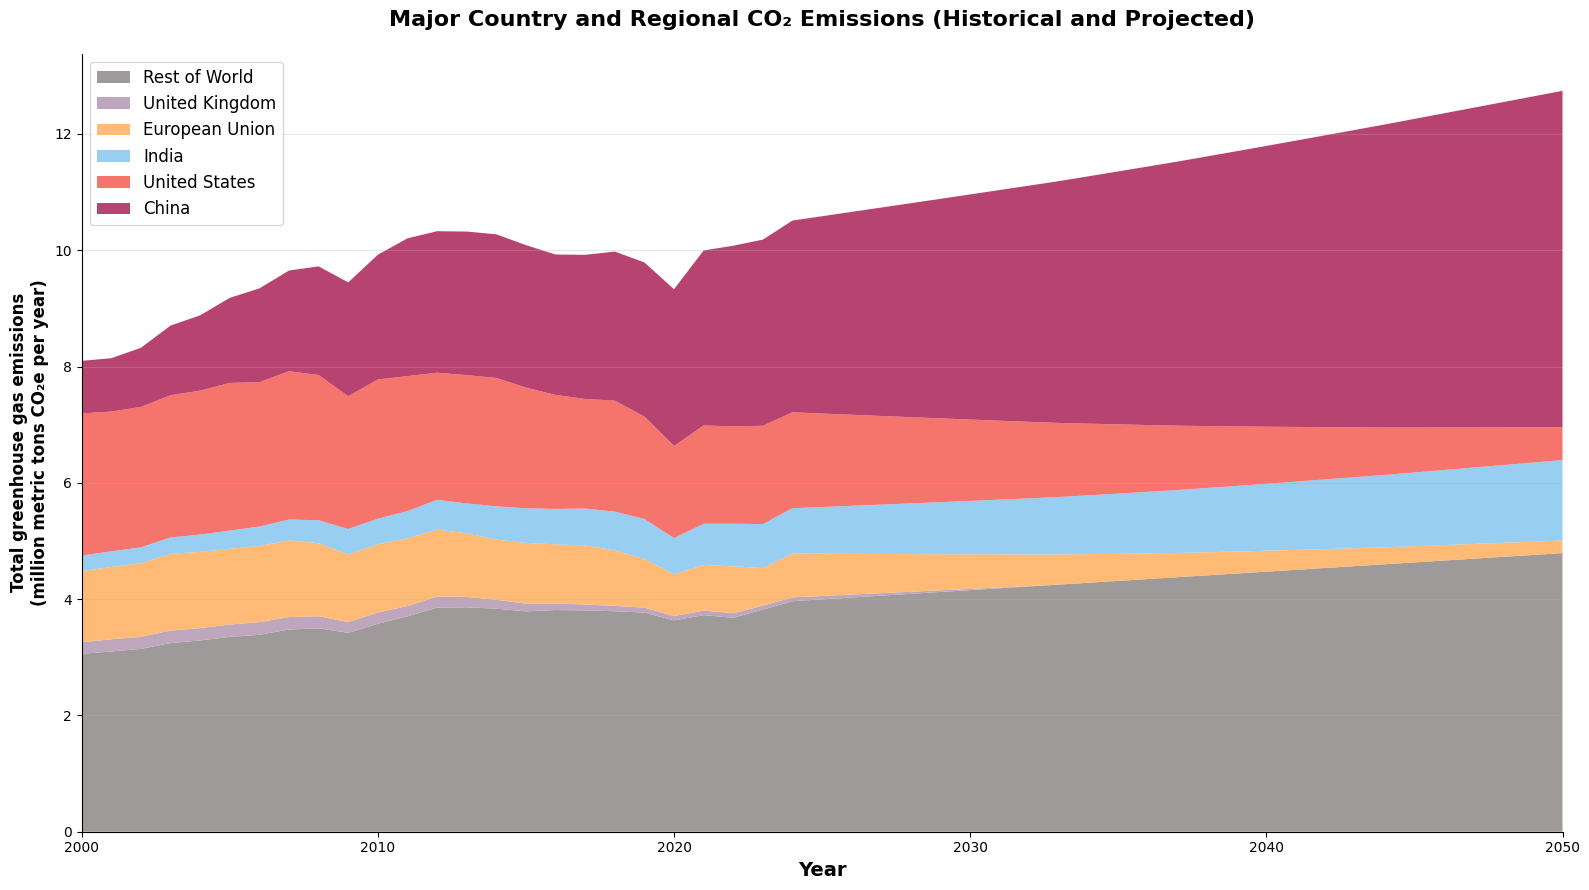

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# List of EU countries (update as needed)
eu_countries = [
    'Germany', 'France', 'Italy', 'Spain', 'Sweden', 'Poland', 'Netherlands', 'Belgium', 'Austria',
    'Finland', 'Denmark', 'Ireland', 'Greece', 'Portugal', 'Hungary', 'Romania', 'Bulgaria', 'Croatia',
    'Lithuania', 'Latvia', 'Estonia', 'Slovenia', 'Slovakia', 'Czech Republic', 'Luxembourg', 'Malta',
    'Cyprus'
]

df = final_panel
# Standardize country names for consistency
df['Country'] = df['Country'].replace({'USA': 'United States'})

# Ensure numeric types and drop missing values
df['Time_Period'] = pd.to_numeric(df['Time_Period'], errors='coerce')
df['CO2_Emission_Tonnes'] = pd.to_numeric(df['CO2_Emission_Tonnes'], errors='coerce')
df = df.dropna(subset=['Time_Period', 'CO2_Emission_Tonnes'])

# Pivot to wide format
wide = (
    df.groupby(['Time_Period', 'Country'])['CO2_Emission_Tonnes']
      .sum()
      .unstack('Country')
      .fillna(0.0)
      .sort_index()
)

# Create series for each group, aligned by year
china = wide['China'] if 'China' in wide.columns else 0.0
us_col = 'United States' if 'United States' in wide.columns else ('USA' if 'USA' in wide.columns else None)
usa = wide[us_col] if us_col else 0.0
india = wide['India'] if 'India' in wide.columns else 0.0
eu = wide[wide.columns.intersection(eu_countries)].sum(axis=1)
uk = wide['United Kingdom'] if 'United Kingdom' in wide.columns else 0.0
all_countries = wide.sum(axis=1)
rest_of_world = all_countries - (china + usa + india + eu + uk)

# Convert to millions for the Y-axis
scale = 1e6
years = wide.index.to_numpy(dtype=float)
R = (rest_of_world / scale).to_numpy()
UK = (uk / scale).to_numpy()
E = (eu / scale).to_numpy()
I = (india / scale).to_numpy()
U = (usa / scale).to_numpy()
C = (china / scale).to_numpy()

# Stackplot order: bottom to top: R, UK, EU, India, USA, China
colors = [
    '#948f8f',    # Rest of world (light gray)
    '#b79eb5',    # United Kingdom (lavender)
    '#ffb367',    # EU (orange/peach)
    '#8cc9f0',    # India (blue-cyan)
    '#f4655c',    # United States (red-orange)
    '#b03060'     # China (dark pink/red)
]

labels = [
    'Rest of World',
    'United Kingdom',
    'European Union',
    'India',
    'United States',
    'China'
]

fig, ax = plt.subplots(figsize=(16, 9))
ax.stackplot(
    years, R, UK, E, I, U, C,
    labels=labels,
    colors=colors,
    alpha=0.9
)

ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Total greenhouse gas emissions\n(million metric tons CO₂e per year)', fontsize=12, fontweight='bold')
ax.set_title('Major Country and Regional CO₂ Emissions (Historical and Projected)', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True)
ax.grid(True, alpha=0.3, axis='y')
ax.set_xlim(years.min(), years.max())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format y-axis ticks as millions with commas
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.savefig('Major_CO2_Emitters_Stacked_Area_MILLIONS_ORDERED.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


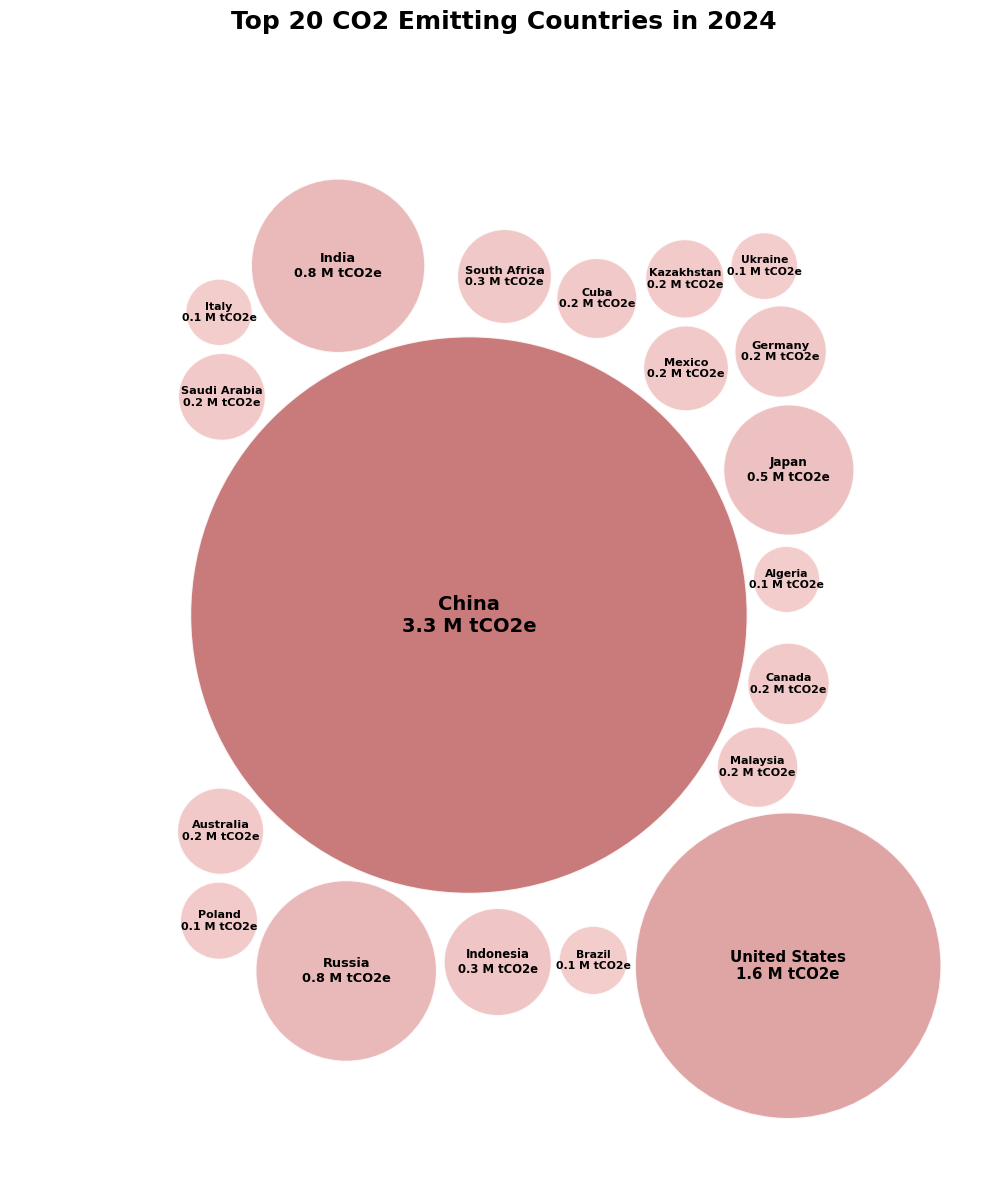

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# ---- Prepare Data ----
data_2024 = df[df['Time_Period'] == 2024].copy()

em_col = 'CO2_Emission_Tonnes'
data_bubble = data_2024.sort_values(em_col, ascending=False).head(20).reset_index(drop=True)

# Get values and labels
values = data_bubble[em_col].tolist()
labels = data_bubble['Country'].tolist()

# Scale values to radii
max_radius = 0.20
min_radius = 0.02
scaled_radii = [min_radius + (max_radius - min_radius) * (v / max(values)) for v in values]

# -------- Circle Packing Algorithm --------
def pack_circles(radii):
    n = len(radii)
    positions = []

    positions.append((0, 0))  # First circle

    for i in range(1, n):
        r = radii[i]
        placed = False

        for attempt in range(500):
            if attempt < 100:
                angle = np.random.uniform(0, 2 * np.pi)
                distance = np.random.uniform(0, 0.3)
            else:
                angle = np.random.uniform(0, 2 * np.pi)
                distance = np.random.uniform(0, 0.7)

            x = distance * np.cos(angle)
            y = distance * np.sin(angle)

            valid = True
            for j, (px, py) in enumerate(positions):
                if np.sqrt((x - px)**2 + (y - py)**2) < (radii[j] + r + 0.005):
                    valid = False
                    break

            if valid:
                positions.append((x, y))
                placed = True
                break

        if not placed:
            angle = (i / n) * 2 * np.pi
            positions.append((0.6 * np.cos(angle), 0.6 * np.sin(angle)))

    # Optimization
    def objective(coords):
        coords = coords.reshape(-1, 2)
        w = coords[:, 0].max() - coords[:, 0].min()
        h = coords[:, 1].max() - coords[:, 1].min()
        return w * h

    def constraints(coords):
        coords = coords.reshape(-1, 2)
        cons = []
        for i in range(n):
            for j in range(i + 1, n):
                dist = np.sqrt((coords[i, 0] - coords[j, 0])**2 +
                               (coords[i, 1] - coords[j, 1])**2)
                cons.append(dist - (radii[i] + radii[j] + 0.005))
        return np.array(cons)

    x0 = np.array(positions).flatten()
    result = minimize(objective, x0, method='SLSQP',
                      constraints={'type': 'ineq', 'fun': constraints},
                      options={'maxiter': 100})

    return result.x.reshape(-1, 2)

positions = pack_circles(scaled_radii)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(12, 12))

# PURE WHITE BACKGROUND
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax.axis('off')
ax.set_aspect('equal')

# Normalize radii for gradient coloring
norm_radii = [(r - min(scaled_radii)) / (max(scaled_radii) - min(scaled_radii)) for r in scaled_radii]

# -------- Pink/Coral gradient (matching screenshot) --------
light_pink = np.array([0xF2/255, 0xC7/255, 0xC7/255])
dark_pink  = np.array([0xC4/255, 0x6C/255, 0x6C/255])

def interpolate_pink(t):
    return light_pink * (1 - t) + dark_pink * t

# ---- Draw bubbles ----
for i, ((x, y), r) in enumerate(zip(positions, scaled_radii)):
    t = norm_radii[i]
    bubble_color = interpolate_pink(t)

    circle = plt.Circle((x, y), r,
                        color=bubble_color,
                        alpha=0.90,
                        ec='white',
                        lw=1.5)
    ax.add_patch(circle)

    country_name = labels[i]
    emission_value = values[i]

    if emission_value >= 1e9:
        label_text = f"{country_name}\n{emission_value/1e9:.1f} BtCO2e"
    else:
        label_text = f"{country_name}\n{emission_value/1e6:,.1f} M tCO2e"

    fontsize = 7 + (r / max(scaled_radii)) * 7

    ax.text(x, y, label_text,
            ha='center', va='center',
            fontsize=fontsize,
            fontweight='bold',
            color='black')

# ---- Limits ----
all_x = [x for x, y in positions]
all_y = [y for x, y in positions]

margin = 0.15
ax.set_xlim(min(all_x) - margin, max(all_x) + margin)
ax.set_ylim(min(all_y) - margin, max(all_y) + margin)

plt.title(
    "Top 20 CO2 Emitting Countries in 2024",
    fontsize=18,
    fontweight='bold',
    pad=20
)

plt.tight_layout()
plt.show()


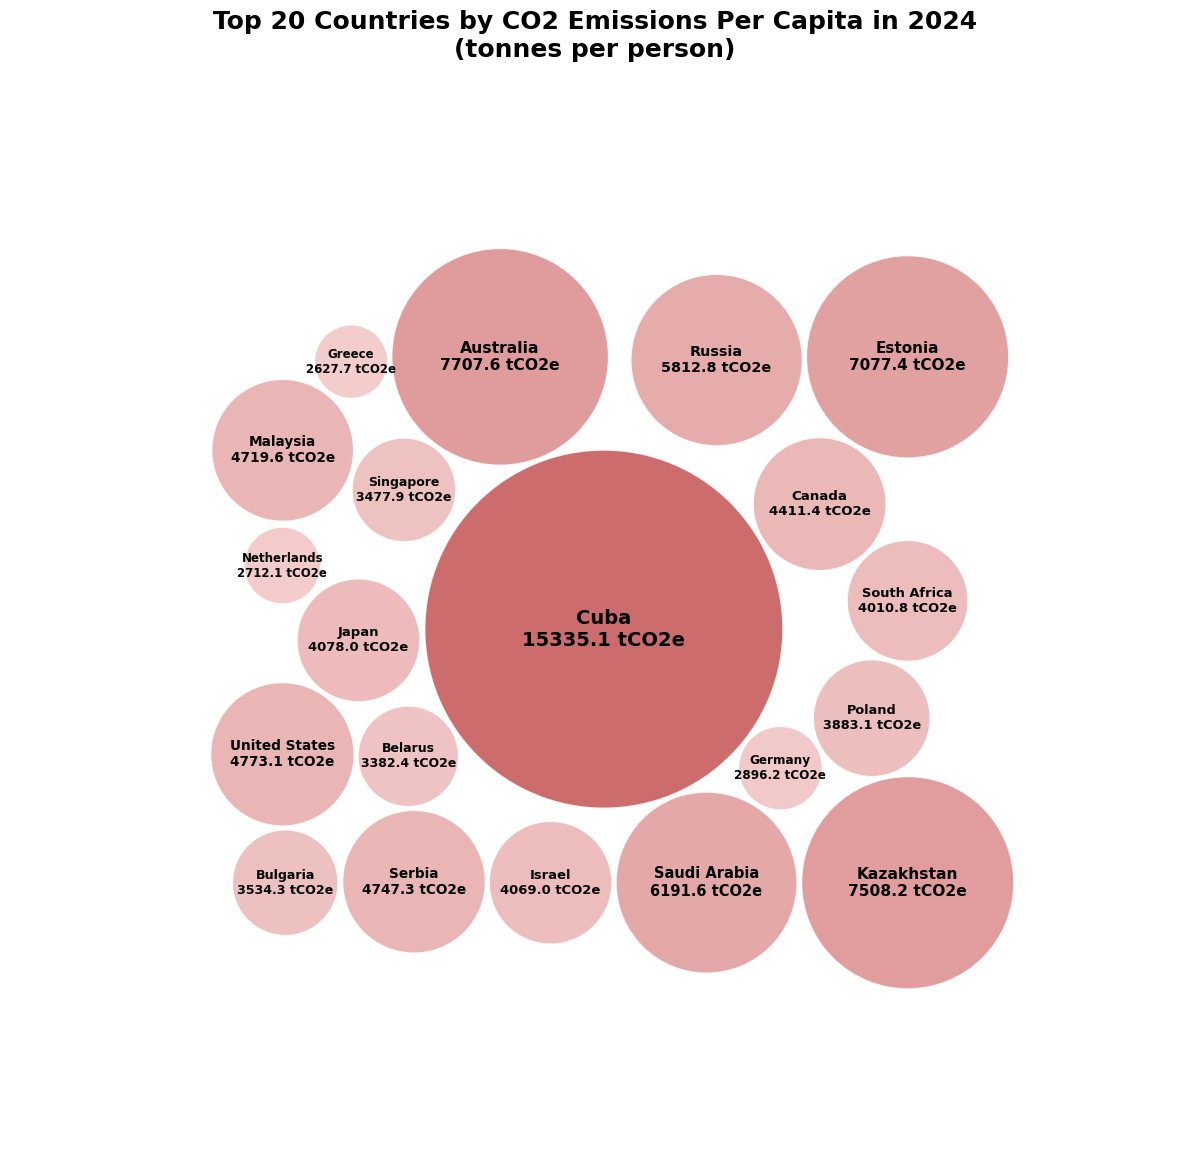

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# ---- Prepare Data ----
data_2024 = df[df['Time_Period'] == 2024].copy()
data_2024['CO2_Per_Capita'] = (data_2024['CO2_Emission_Tonnes'] * 1_000_000) / data_2024['Population']
data_bubble = data_2024.nlargest(20, 'CO2_Per_Capita').reset_index(drop=True)

values = data_bubble['CO2_Per_Capita'].tolist()
labels = data_bubble['Country'].tolist()

# -------- Square-root scaling (correct visually) -----------
min_radius = 0.06
max_radius = 0.29

sqrt_values = np.sqrt(values)
min_sqrt = sqrt_values.min()
max_sqrt = sqrt_values.max()

scaled_radii = min_radius + (max_radius - min_radius) * (sqrt_values - min_sqrt) / (max_sqrt - min_sqrt)

# -------- Circle Packing (unchanged) --------
def pack_circles(radii):
    n = len(radii)
    positions = []
    positions.append((0, 0))

    for i in range(1, n):
        r = radii[i]
        placed = False
        for attempt in range(500):
            if attempt < 100:
                angle = np.random.uniform(0, 2 * np.pi)
                distance = np.random.uniform(0, 0.3)
            else:
                angle = np.random.uniform(0, 2 * np.pi)
                distance = np.random.uniform(0, 0.7)

            x = distance * np.cos(angle)
            y = distance * np.sin(angle)

            valid = True
            for j, (px, py) in enumerate(positions):
                if np.sqrt((x - px)**2 + (y - py)**2) < (radii[j] + r + 0.005):
                    valid = False
                    break

            if valid:
                positions.append((x, y))
                placed = True
                break

        if not placed:
            angle = (i / n) * 2 * np.pi
            positions.append((0.6 * np.cos(angle), 0.6 * np.sin(angle)))

    # optimization
    def objective(coords):
        coords = coords.reshape(-1, 2)
        return (coords[:,0].max() - coords[:,0].min()) * (coords[:,1].max() - coords[:,1].min())

    def constraint_func(coords):
        coords = coords.reshape(-1, 2)
        penalties = []
        for i in range(n):
            for j in range(i + 1, n):
                dist = np.sqrt((coords[i, 0] - coords[j, 0])**2 + 
                               (coords[i, 1] - coords[j, 1])**2)
                penalties.append(dist - (radii[i] + radii[j] + 0.005))
        return np.array(penalties)

    x0 = np.array(positions).flatten()
    result = minimize(objective, x0, method='SLSQP',
                      constraints={'type': 'ineq', 'fun': constraint_func},
                      options={'maxiter': 100})

    return result.x.reshape(-1, 2)

positions = pack_circles(scaled_radii)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(12, 12))
ax.axis('off')
ax.set_aspect('equal')

fig.patch.set_facecolor('white')
ax.set_facecolor('white')


# ---- Pink gradient colors ----
light_pink = np.array([0xF2/255, 0xC7/255, 0xC7/255])  # very light
dark_pink  = np.array([0xC8/255, 0x5C/255, 0x5C/255])  # deeper

# Normalize radii for shading 0–1
norm = (scaled_radii - scaled_radii.min()) / (scaled_radii.max() - scaled_radii.min())

# ---- Draw bubbles ----
for i, ((x, y), r) in enumerate(zip(positions, scaled_radii)):

    bubble_color = light_pink * (1 - norm[i]) + dark_pink * norm[i]

    circle = plt.Circle(
        (x, y), r,
        color=bubble_color,
        alpha=0.90,
        ec='white',
        lw=1.5
    )
    ax.add_patch(circle)

    country_name = labels[i]
    per_capita_value = values[i]

    if per_capita_value >= 1:
        label_text = f"{country_name}\n{per_capita_value:.1f} tCO2e"
    elif per_capita_value >= 0.01:
        label_text = f"{country_name}\n{per_capita_value:.2f} tCO2e"
    else:
        label_text = f"{country_name}\n{per_capita_value:.4f} tCO2e"

    fontsize = 7 + (r / scaled_radii.max()) * 7

    ax.text(x, y, label_text,
            ha='center', va='center',
            fontsize=fontsize,
            fontweight='bold',
            color='black')

# ---- Limits ----
all_x = positions[:,0]
all_y = positions[:,1]

margin = 0.15
ax.set_xlim(all_x.min() - max(scaled_radii) - margin,
            all_x.max() + max(scaled_radii) + margin)
ax.set_ylim(all_y.min() - max(scaled_radii) - margin,
            all_y.max() + max(scaled_radii) + margin)

plt.title(
    "Top 20 Countries by CO2 Emissions Per Capita in 2024\n(tonnes per person)",
    fontsize=18,
    fontweight='bold',
    pad=20
)

plt.tight_layout()
plt.show()


## Q1: **Which countries produce the most CO₂ in 2024, and how do rankings change when emissions are viewed per person?**

---
This directly answers Q1 (Emissions Distribution) by quantifying how emissions are spread across development groups and highlighting which regions contribute most to global CO₂ output.

### 1. Global & Regional CO₂ Emissions Over Time (Stacked Area Chart)

The stacked area representation illustrates how global CO₂ emissions evolve between 2000 and 2050, with contributions disaggregated across major regions and key countries. China becomes the most dominant source of emissions, reflecting rapid industrial expansion and sustained energy demand. The United States remains a major emitter throughout the period, although its relative share decreases as domestic decarbonisation efforts strengthen. In contrast, the European Union and United Kingdom show steady long-term declines, aligning with policy-driven transitions toward cleaner energy. India displays a consistent upward trend, driven by population growth and ongoing industrial development. Other regions collectively contribute a smaller but relatively stable share.

Overall, the chart highlights that a small cluster of countries accounts for the bulk of global emissions, reinforcing their central role in any effective climate-mitigation strategy.

---

### 2. Top 20 Countries by Total CO₂ Emissions in 2024 (Bubble Chart)

The 2024 bubble chart provides a cross-sectional snapshot of total national emissions. China leads by a substantial margin, reflecting both scale and energy intensity. The United States follows as the second-largest emitter, with India, Russia, and Japan completing the top tier. Emissions are heavily concentrated among a limited group of large economies, indicating that global mitigation efforts depend critically on coordinated action among these high-volume contributors.

This concentration underscores that addressing aggregate emissions requires engagement with the world’s largest economies, whose decisions disproportionately influence global outcomes.

---

### 3. Top 20 Countries by CO₂ Emissions Per Capita in 2024 (Bubble Chart)

When emissions are expressed on a per capita basis, the global picture changes significantly. Countries such as Cuba, Estonia, and Kazakhstan rise to the top of the rankings, reflecting smaller populations coupled with carbon-intensive energy systems. High-income or resource-dependent nations—including Australia and Saudi Arabia—also feature prominently due to lifestyle expectations or fossil-fuel-driven economic structures. Meanwhile, large emitters by total volume, such as China and India, fall sharply in the ranking once population is accounted for, although countries like the United States and Australia remain high due to consistently elevated per-person energy demand.

Per-capita emissions offer a complementary fairness-based perspective, emphasising consumption patterns and revealing disproportionate carbon footprints in smaller or wealthier nations.

---

### Overall Summary

Total emissions highlight the global impact of large economies, whereas per-capita emissions reveal disproportionate environmental pressure among smaller or fossil-fuel-reliant countries. Considering both views provides a balanced and equitable basis for climate policy: large emitters must reduce aggregate volumes to stabilise global trends, while high per-capita emitters must address consumption intensity and resource dependence. Together, these perspectives present a clearer foundation for designing climate strategies that are both effective and fair.

## **Question 2. How does the electricity mix shift between 2000 and 2050 across developed, developing, and underdeveloped countries?**  


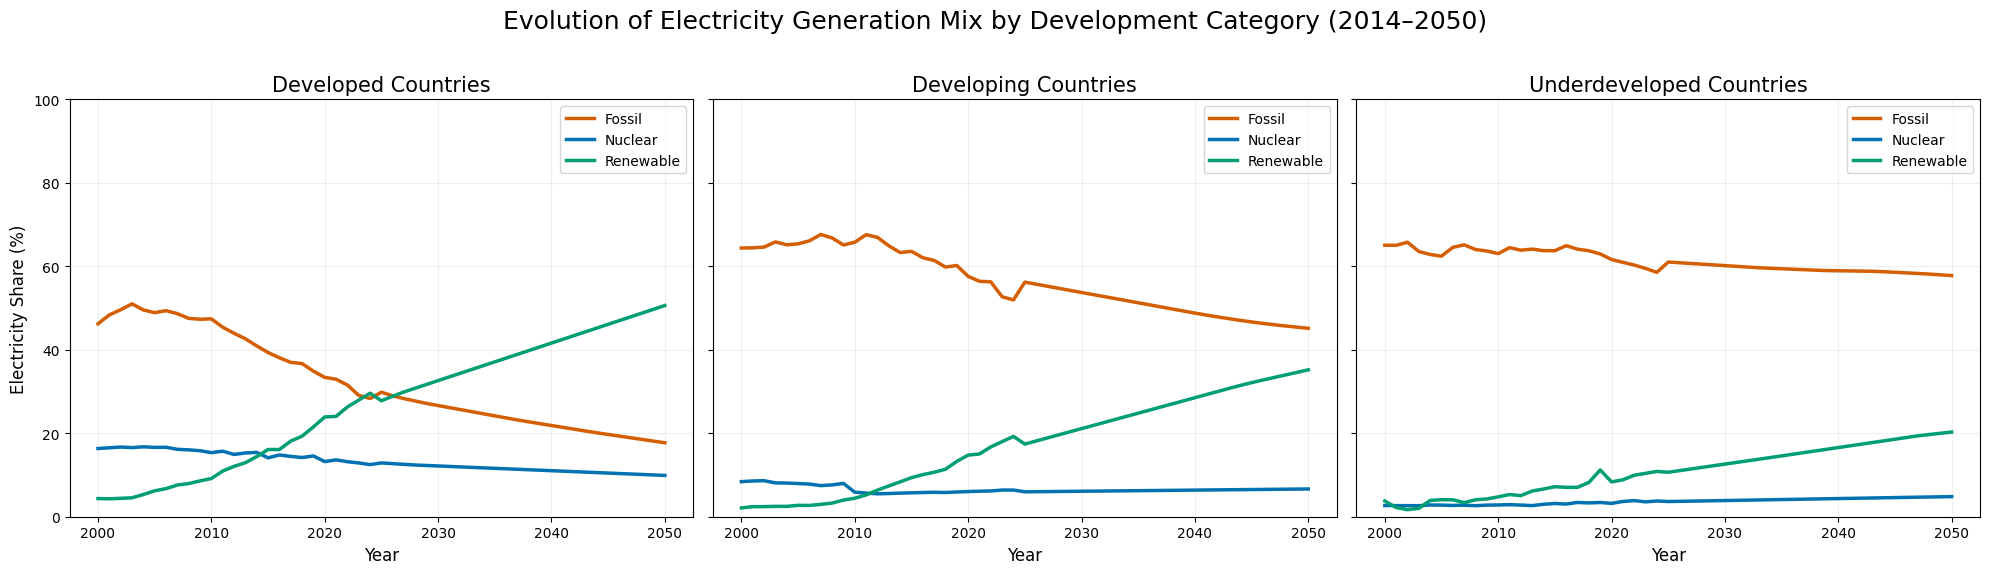

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv("final_2050.csv")

# --- Classify countries by GDP per capita in 2024 ---
gdp_2024 = df[df['Time_Period'] == 2024][['Country', 'GDP_per_capita']].drop_duplicates()
q25 = gdp_2024['GDP_per_capita'].quantile(0.25)
q75 = gdp_2024['GDP_per_capita'].quantile(0.75)

def gdp_category_2024(gdp_pc):
    gdp_pc = max(gdp_pc, 0)
    if gdp_pc >= q75:
        return "Developed"
    elif gdp_pc >= q25:
        return "Developing"
    else:
        return "Underdeveloped"

gdp_2024_map = gdp_2024.set_index('Country')['GDP_per_capita'].to_dict()
df['GDP_per_capita_2024'] = df['Country'].map(gdp_2024_map)
df['Dev_Category'] = df['GDP_per_capita_2024'].apply(gdp_category_2024)

# --- Aggregate energy shares ---
energy_shares = (
    df.groupby(['Time_Period', 'Dev_Category'])
      .agg({
          'Fossil_Perc': 'mean',
          'Nuclear_Perc': 'mean',
          'Renewable_Perc': 'mean'
      })
      .reset_index()
)

# --- Visualization in subplots ---
dev_groups = ['Developed', 'Developing', 'Underdeveloped']
colors = {'Fossil_Perc': '#d55e00', 'Nuclear_Perc': '#0072b2', 'Renewable_Perc': '#009e73'}
labels = {'Fossil_Perc': 'Fossil', 'Nuclear_Perc': 'Nuclear', 'Renewable_Perc': 'Renewable'}

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for i, dev_cat in enumerate(dev_groups):
    ax = axes[i]
    data = energy_shares[energy_shares['Dev_Category'] == dev_cat]
    for col in ['Fossil_Perc', 'Nuclear_Perc', 'Renewable_Perc']:
        ax.plot(
            data['Time_Period'], data[col],
            label=labels[col],
            color=colors[col],
            linewidth=2.5
        )
    ax.set_title(f"{dev_cat} Countries", fontsize=15)
    ax.set_xlabel("Year", fontsize=12)
    if i == 0:
        ax.set_ylabel("Electricity Share (%)", fontsize=12)
    ax.legend()
    ax.grid(alpha=0.2)
    ax.set_ylim(0, 100)

fig.suptitle('Evolution of Electricity Generation Mix by Development Category (2014–2050)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


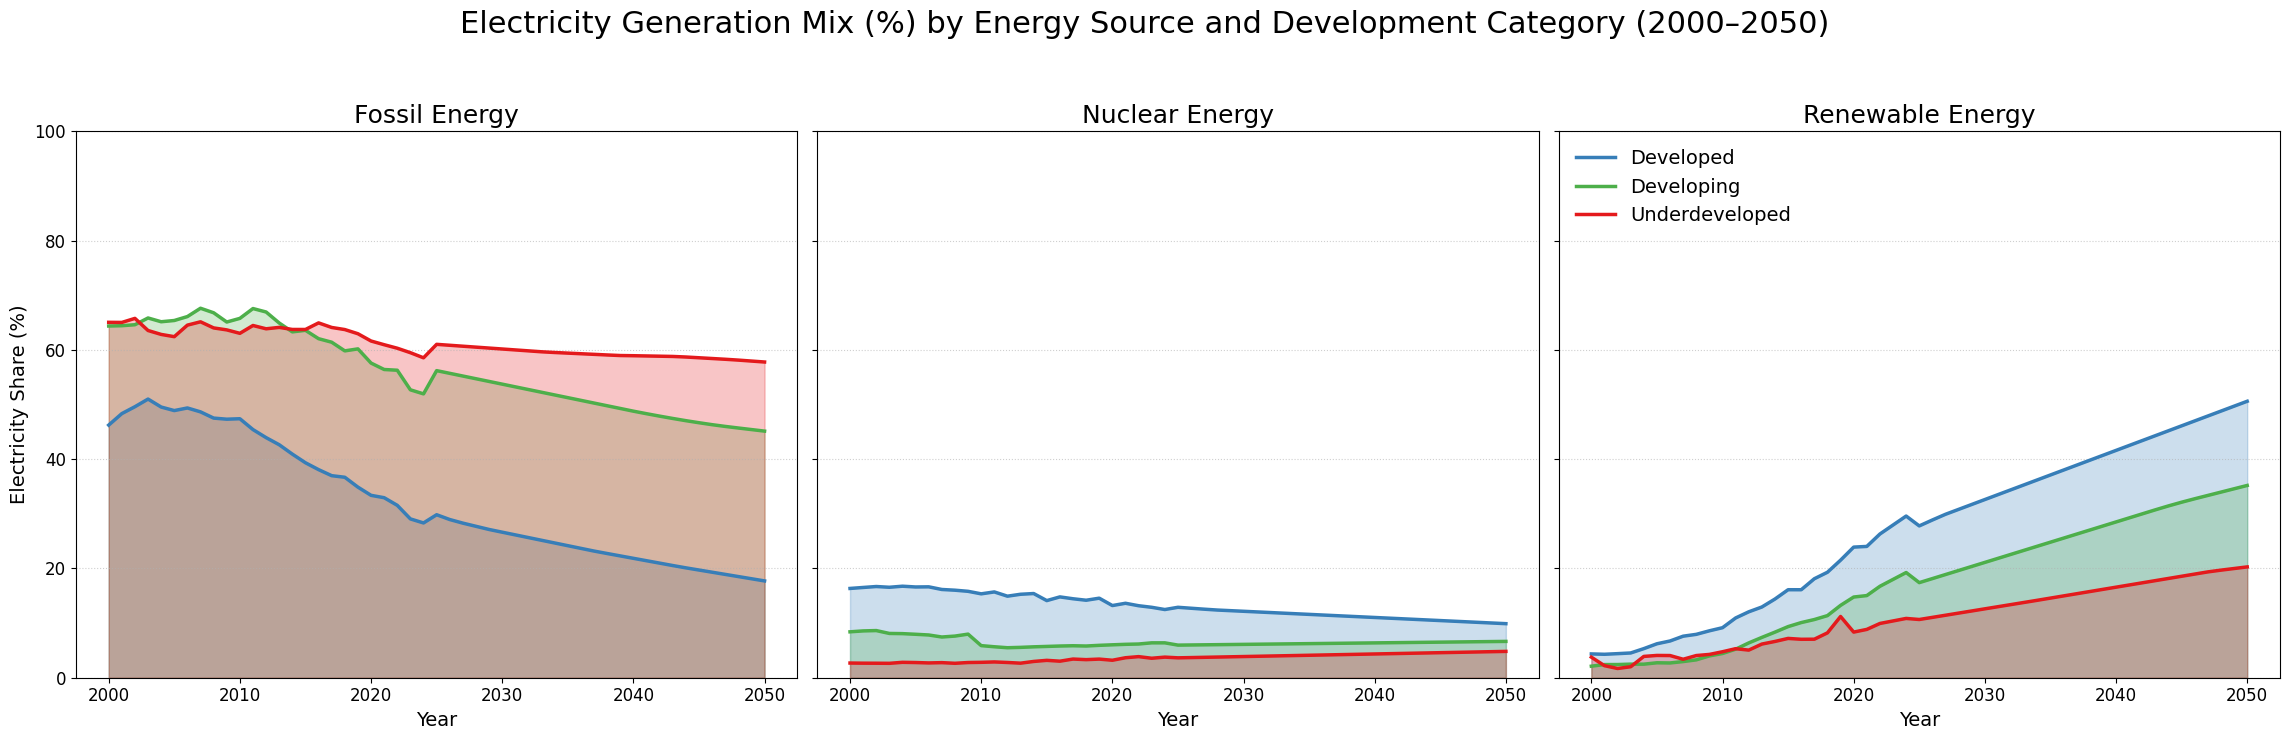

In [49]:
energy_cols = ['Fossil_Perc', 'Nuclear_Perc', 'Renewable_Perc']
energy_labels = ['Fossil', 'Nuclear', 'Renewable']
dev_levels = ['Developed', 'Developing', 'Underdeveloped']

actual_melt = df.melt(
    id_vars=['Dev_Category', 'Time_Period'],
    value_vars=energy_cols,
    var_name='Source',
    value_name='Actual_Share'
)

palette = {
    'Developed': '#377eb8',
    'Developing': '#4daf4a',
    'Underdeveloped': '#e41a1c'
}

fig, axes = plt.subplots(1, 3, figsize=(23, 7), sharey=True)
fig.suptitle(
    'Electricity Generation Mix (%) by Energy Source and Development Category (2000–2050)',
    fontsize=22, y=1.05
)

for i, (col, e_label) in enumerate(zip(energy_cols, energy_labels)):
    ax = axes[i]
    for dev in dev_levels:
        subset = actual_melt[(actual_melt['Source'] == col) & (actual_melt['Dev_Category'] == dev)]
        grp = subset.groupby('Time_Period')['Actual_Share'].mean().reset_index()
        # Plot area (no legend label)
        ax.fill_between(
            grp['Time_Period'], grp['Actual_Share'], 
            color=palette[dev], alpha=0.25, label="_nolegend_"
        )
        # Plot line (with legend label)
        ax.plot(
            grp['Time_Period'], grp['Actual_Share'],
            label=f"{dev}", color=palette[dev], linewidth=2.5
        )
    ax.set_ylim(0, 100)
    ax.set_xlabel('Year', fontsize=14)
    if i == 0:
        ax.set_ylabel('Electricity Share (%)', fontsize=14)
    else:
        ax.set_ylabel('')
    ax.set_title(f"{e_label} Energy", fontsize=18)
    ax.grid(True, which='both', axis='y', linestyle=':', alpha=0.6)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    if i == 2:  # Only put legend on the right-most plot
        ax.legend(fontsize=14, loc='upper left', frameon=False, title="")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


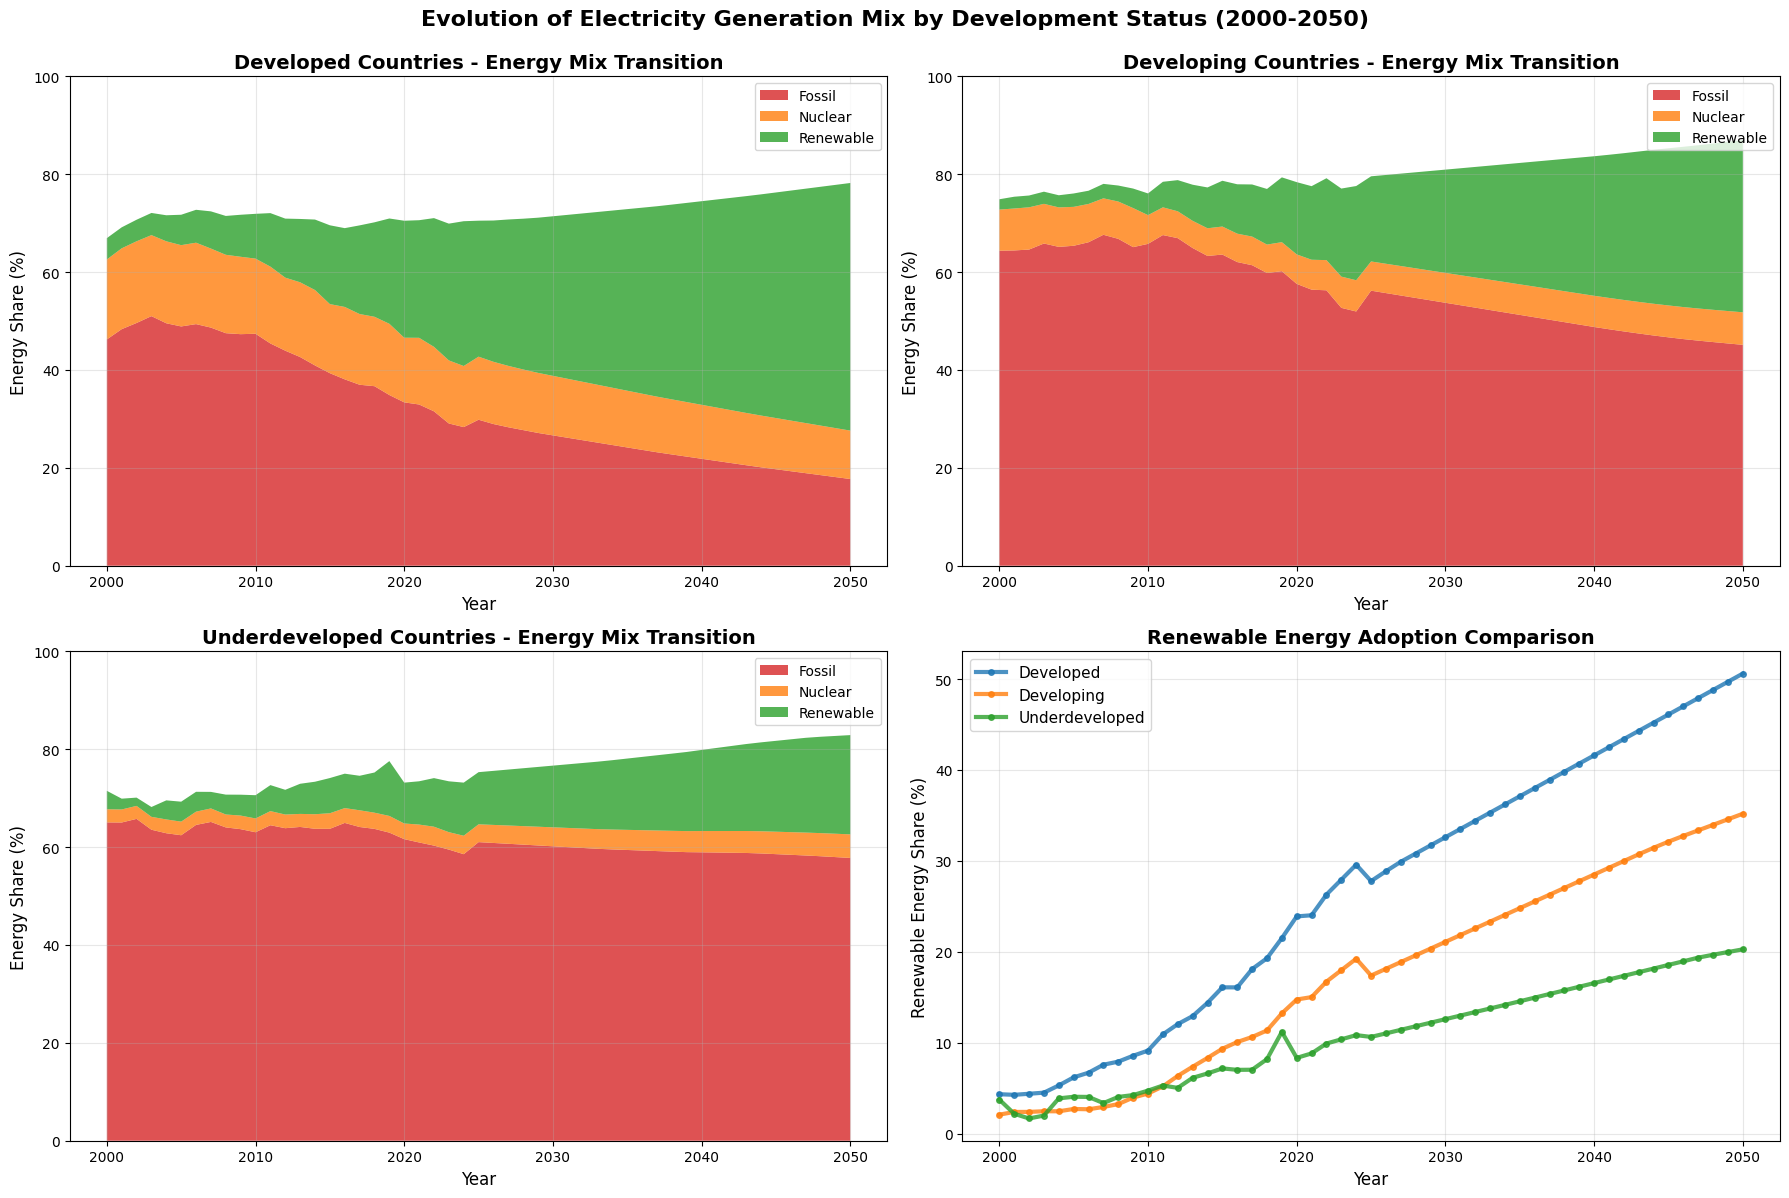


✓ Energy Mix Evolution visualizations created

Q1 INSIGHTS: Energy Mix Evolution

Developed Countries:
  Renewable: nan% (2000) → nan% (2050) | Δ+nan%
  Fossil: nan% (2000) → nan% (2050) | Δnan%

Developing Countries:
  Renewable: nan% (2000) → nan% (2050) | Δ+nan%
  Fossil: nan% (2000) → nan% (2050) | Δnan%

Underdeveloped Countries:
  Renewable: nan% (2000) → nan% (2050) | Δ+nan%
  Fossil: nan% (2000) → nan% (2050) | Δnan%


In [50]:
# ============================================================================
# Energy Mix Evolution by Development Status
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Evolution of Electricity Generation Mix by Development Status (2000-2050)', 
             fontsize=16, fontweight='bold', y=0.995)

statuses = ['Developed', 'Developing', 'Underdeveloped']
colors_energy = {'Fossil': '#d62728', 'Nuclear': '#ff7f0e', 'Renewable': '#2ca02c'}

for idx, status in enumerate(statuses):
    if idx < 3:
        ax = axes[idx // 2, idx % 2]
        status_data = df[df['Dev_Category'] == status].groupby('Time_Period')[
            ['Fossil_Perc', 'Nuclear_Perc', 'Renewable_Perc']].mean()
        
        ax.stackplot(status_data.index, 
                     status_data['Fossil_Perc'],
                     status_data['Nuclear_Perc'],
                     status_data['Renewable_Perc'],
                     labels=['Fossil', 'Nuclear', 'Renewable'],
                     colors=[colors_energy['Fossil'], colors_energy['Nuclear'], colors_energy['Renewable']],
                     alpha=0.8)
        
        ax.set_title(f'{status} Countries - Energy Mix Transition', fontsize=14, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Energy Share (%)', fontsize=12)
        ax.legend(loc='upper right', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, 100)

# Comparative renewable trends
ax = axes[1, 1]
for status in statuses:
    status_data = df[df['Dev_Category'] == status].groupby('Time_Period')['Renewable_Perc'].mean()
    ax.plot(status_data.index, status_data.values, marker='o', markersize=4, 
            label=status, linewidth=3, alpha=0.8)

ax.set_title('Renewable Energy Adoption Comparison', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Renewable Energy Share (%)', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Energy_Mix_Evolution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Energy Mix Evolution visualizations created")

# Print insights
print("\n" + "="*80)
print("Q1 INSIGHTS: Energy Mix Evolution")
print("="*80)
for status in statuses:
    status_df = df[df['Status'] == status]
    renewable_2000 = status_df[status_df['Time_Period'] == 2000]['Renewable_Perc'].mean()
    renewable_2050 = status_df[status_df['Time_Period'] == 2050]['Renewable_Perc'].mean()
    fossil_2000 = status_df[status_df['Time_Period'] == 2000]['Fossil_Perc'].mean()
    fossil_2050 = status_df[status_df['Time_Period'] == 2050]['Fossil_Perc'].mean()
    
    print(f"\n{status} Countries:")
    print(f"  Renewable: {renewable_2000:.1f}% (2000) → {renewable_2050:.1f}% (2050) | Δ+{renewable_2050-renewable_2000:.1f}%")
    print(f"  Fossil: {fossil_2000:.1f}% (2000) → {fossil_2050:.1f}% (2050) | Δ{fossil_2050-fossil_2000:.1f}%")


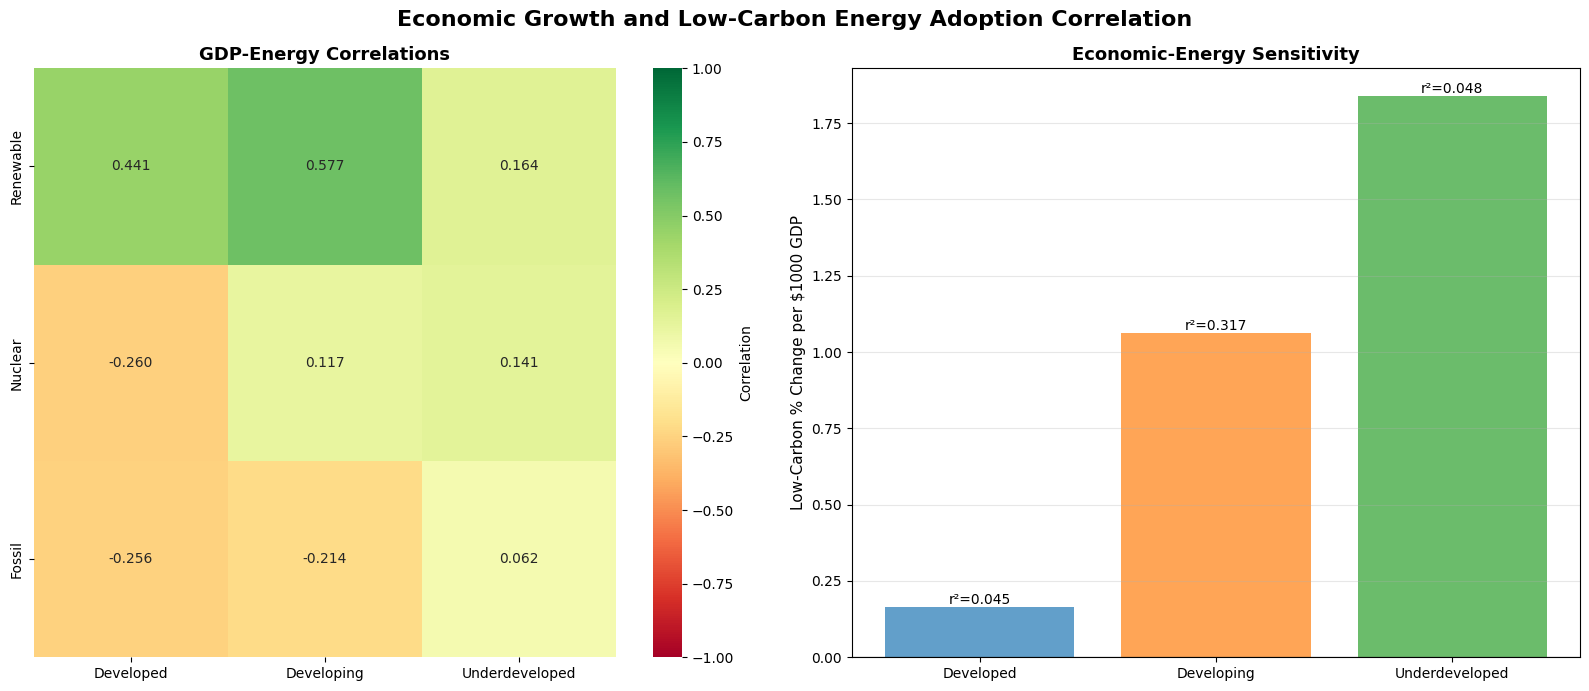


✓ Q2: Economic-Energy Correlation visualizations created


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Assume your DataFrame 'df' and list 'statuses' already exist and are set up

df['LowCarbon_Perc'] = df['Nuclear_Perc'] + df['Renewable_Perc']

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Economic Growth and Low-Carbon Energy Adoption Correlation', 
             fontsize=16, fontweight='bold', y=0.98)

# ---- 1. Correlation heatmap ----
ax = axes[0]
correlations = []
for status in statuses:
    status_df = df[df['Dev_Category'] == status]
    corr = status_df[['GDP_per_capita', 'Renewable_Perc', 'Nuclear_Perc', 'Fossil_Perc']].corr()
    correlations.append(corr.iloc[0, 1:].values)
corr_matrix = np.array(correlations).T
sns.heatmap(
    corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
    xticklabels=statuses, yticklabels=['Renewable', 'Nuclear', 'Fossil'],
    ax=ax, cbar_kws={'label': 'Correlation'}, vmin=-1, vmax=1
)
ax.set_title('GDP-Energy Correlations', fontsize=13, fontweight='bold')

# ---- 2. Regression slopes (bar chart) ----
ax = axes[1]
slopes = []
for status in statuses:
    status_df = df[df['Dev_Category'] == status]
    X = status_df['GDP_per_capita'].values
    y = status_df['LowCarbon_Perc'].values
    mask = ~(np.isnan(X) | np.isnan(y))
    if mask.sum() > 0:
        slope, _, r_value, _, _ = stats.linregress(X[mask], y[mask])
        slopes.append({'Dev_Category': status, 'Slope': slope * 1000, 'R²': r_value**2})
slopes_df = pd.DataFrame(slopes)
bars = ax.bar(
    slopes_df['Dev_Category'], slopes_df['Slope'], 
    color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7
)
for i, (idx, row) in enumerate(slopes_df.iterrows()):
    ax.text(i, row['Slope'], f"r²={row['R²']:.3f}", 
           ha='center', va='bottom' if row['Slope'] > 0 else 'top', fontsize=10)
ax.set_ylabel('Low-Carbon % Change per $1000 GDP', fontsize=11)
ax.set_title('Economic-Energy Sensitivity', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linewidth=0.8)

plt.tight_layout()
plt.savefig('Q2_Economic_Energy_Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Q2: Economic-Energy Correlation visualizations created")


## Q2: **How does the electricity mix shift between 2000 and 2050 across developed, developing, and underdeveloped countries?**

---
This directly answers Q2 (Energy Mix Transition) by showing the long-term shift from fossil-dominated electricity toward renewables and nuclear, including the variation in transition speed across development categories.
### 1. Evolution of Electricity Generation Mix (2000–2050)

The long-term trajectories show distinct and persistent differences in how countries at different development levels transition their electricity systems. Developed countries exhibit a decisive decline in fossil-fuel-based generation beginning in the early 2000s, accompanied by rapid expansion of renewable energy. By 2050, renewables represent the dominant share of electricity generation in this group, surpassing both fossil fuels and nuclear power. Developing countries follow a more gradual pathway: fossil fuels remain the primary source for much of the period, yet there is steady, incremental growth in renewables, reflecting improving policy support and infrastructure. Underdeveloped countries display the slowest rate of change. Fossil fuels remain the backbone of electricity supply throughout the entire period, and renewable adoption increases only marginally, never overtaking fossil sources even by 2050.

These patterns highlight the structural divergence in energy transitions. Developed economies have already entered advanced phases of decarbonisation, while developing and underdeveloped countries face constraints linked to affordability, financing, and technology access.

---

### 2. Renewable Energy Adoption Comparison

A direct comparison of renewable energy shares shows the scale of this divergence with clarity. Developed economies surpass the 50 percent mark by mid-century, reflecting accelerated policy commitments, mature energy markets, and sustained investment in clean technologies. Developing countries rise to approximately 35 percent renewable share by 2050, signalling meaningful progress but still lagging behind the frontrunners. Underdeveloped countries experience only modest improvements, reaching roughly 20 percent by 2050 and therefore remaining far from parity with higher-income regions.

This comparison illustrates that renewable adoption strongly correlates with development status, as access to capital, stable institutions, and technological readiness play decisive roles in shaping transition speed.

---

### 3. Energy Mix by Source (Fossil, Nuclear, Renewable)

A breakdown of the electricity mix by source reinforces these structural differences. Fossil fuel use declines most sharply in developed countries, where policy interventions, carbon pricing, and technological displacement reduce the dominance of coal and gas. Developing countries reduce fossil shares more slowly, while underdeveloped countries show only marginal reductions. Nuclear power remains concentrated almost exclusively within developed nations, where legacy infrastructure supports substantial contributions early in the period, although nuclear share gradually declines over time. Renewable energy expands rapidly among developed economies, grows steadily in developing regions, and increases slowly among underdeveloped nations, reflecting resource disparities and technology access limitations.

The resulting patterns confirm that energy transitions are differentiated not only by speed, but also by the types of energy sources that countries are able to deploy.

---

### Overall Summary

The global electricity transition is highly uneven. Developed countries are on track to achieve renewable-energy dominance well before mid-century, while developing and especially underdeveloped countries continue to rely heavily on fossil fuels. These differences reflect varying levels of economic capacity, institutional strength, and infrastructure development. Achieving meaningful global decarbonisation will require targeted financial, technological, and policy support to accelerate clean-energy transitions in countries that currently face the greatest structural barriers.


## **Question 3: How strongly do fossil, nuclear, and renewable electricity shares influence CO₂ emissions per person by 2050?**

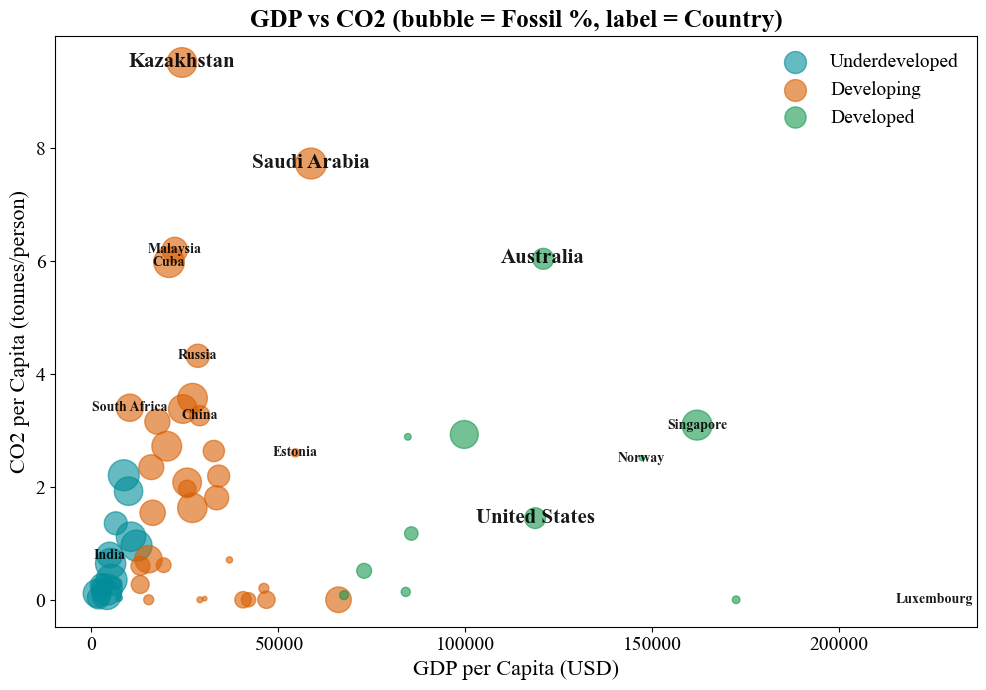

In [52]:
# ==========================
#   Single Bubble Chart (with labels)
# ==========================
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# ---- Status color palette ----
status_colors = {
    'Underdeveloped': '#008C99',   # blue-teal
    'Developing':     '#D95F02',   # warm orange
    'Developed':      '#1A9850'    # deep green
}

# ---- Data ----
data_2050 = df[df['Time_Period'] == 2050]
status_order = ['Underdeveloped', 'Developing', 'Developed']

# ---- Labels list ----
label_countries = [
    'Cuba', 'Saudi Arabia', 'Australia', 'Russia', 'Malaysia',
    'Singapore', 'Estonia', 'Kazakhstan', 'United States', 'India',
    'South Africa', 'China', 'Norway', 'Luxembourg'
]

# ---- Draw chart ----
plt.figure(figsize=(10, 7))

# ---- PURE WHITE BACKGROUND ----
plt.gcf().patch.set_facecolor("white")  # figure background
plt.gca().set_facecolor("white")        # axes background

for status in status_order:
    status_data = data_2050[data_2050['Dev_Category'] == status]
    
    # bubbles
    plt.scatter(
        status_data['GDP_per_capita'],
        status_data['CO2_per_capita'],
        s=status_data['Fossil_Perc'] * 5,
        alpha=0.6,
        color=status_colors[status],
        label=status
    )
    
    # labels
    show_labels = status_data[status_data['Country'].isin(label_countries)]
    for _, row in show_labels.iterrows():

        # enlarge these 4 countries
        if row['Country'] in ['Australia', 'United States', 'Saudi Arabia', 'Kazakhstan']:
            fontsize_value = 15
        else:
            fontsize_value = 10

        plt.text(
            row['GDP_per_capita'],
            row['CO2_per_capita'],
            row['Country'],
            fontsize=fontsize_value,
            color='black',
            alpha=0.90,
            ha='center',
            va='center',
            weight='bold'
        )

# ---- Axis settings ----
plt.xlabel('GDP per Capita (USD)', fontsize=16)
plt.ylabel('CO2 per Capita (tonnes/person)', fontsize=16)
plt.title('GDP vs CO2 (bubble = Fossil %, label = Country)', fontsize=18, fontweight='bold')

plt.legend(fontsize=14, frameon=False)
plt.grid(False)

plt.tight_layout()
plt.show()


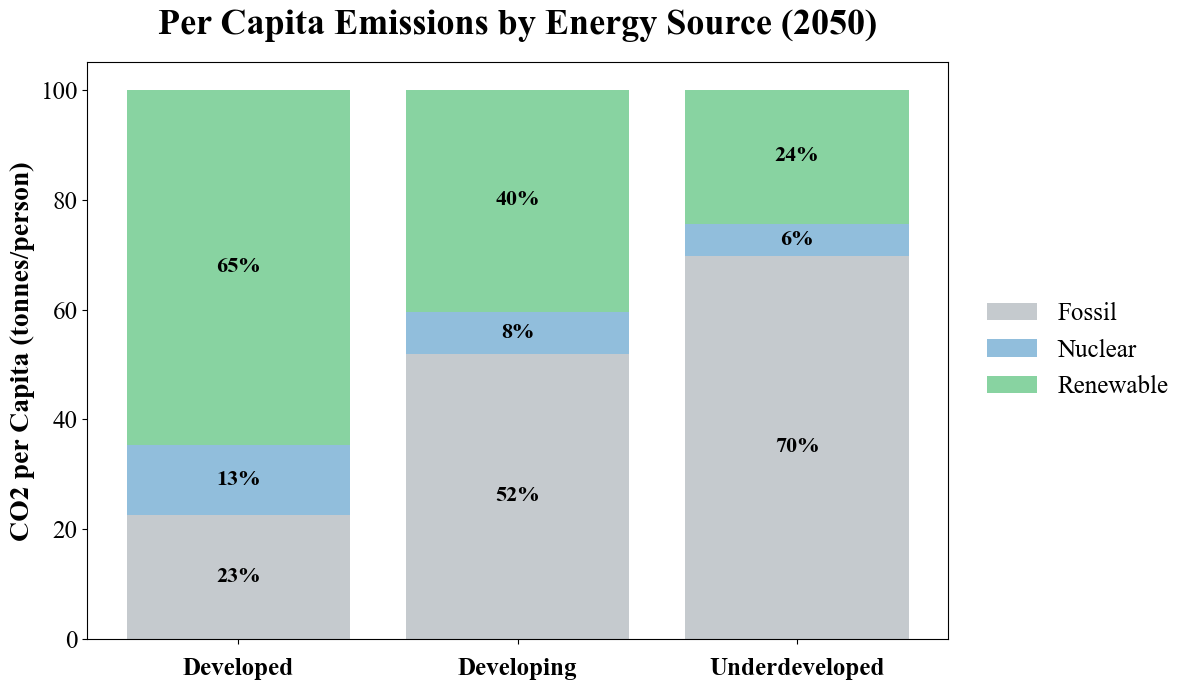

In [53]:
# ==========================
#   Stacked Bar Chart (SOFTER ALL COLORS) — WHITE BACKGROUND
# ==========================
import numpy as np
import matplotlib.pyplot as plt

# ---- Bigger font + clean style ----
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# ---- PURE WHITE BACKGROUND ----
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']   = 'white'

# ---- Softer color palette (all 3 lighter) ----
colors_energy = {
    'Fossil':     '#BFC5C9',   # soft grey
    'Nuclear':    '#85B7D9',   # soft light blue
    'Renewable':  '#7BCF97'    # soft green (lighter)
}

data_2050 = df[df['Time_Period'] == 2050]
statuses = ['Developed', 'Developing', 'Underdeveloped']

emission_by_source = []

for status in statuses:
    subset = data_2050[data_2050['Dev_Category'] == status]

    avg_co2_pc = subset['CO2_per_capita'].mean()
    avg_fossil = subset['Fossil_Perc'].mean() / 100
    avg_nuclear = subset['Nuclear_Perc'].mean() / 100
    avg_renewable = subset['Renewable_Perc'].mean() / 100

    co2_fossil = avg_co2_pc * avg_fossil
    co2_nuclear = avg_co2_pc * avg_nuclear
    co2_renewable = avg_co2_pc * avg_renewable

    total = co2_fossil + co2_nuclear + co2_renewable
    pct_fossil = (co2_fossil / total) * 100 if total else 0
    pct_nuclear = (co2_nuclear / total) * 100 if total else 0
    pct_renewable = (co2_renewable / total) * 100 if total else 0

    emission_by_source.append([pct_fossil, pct_nuclear, pct_renewable])

emission_array = np.array(emission_by_source).T
x_pos = np.arange(len(statuses))

plt.figure(figsize=(12, 7))

# bars
p1 = plt.bar(x_pos, emission_array[0], color=colors_energy['Fossil'], alpha=0.9, label='Fossil')
p2 = plt.bar(x_pos, emission_array[1], bottom=emission_array[0], color=colors_energy['Nuclear'], alpha=0.9, label='Nuclear')
p3 = plt.bar(x_pos, emission_array[2], bottom=emission_array[0] + emission_array[1], color=colors_energy['Renewable'], alpha=0.9, label='Renewable')

# labels inside bars
for bars in [p1, p2, p3]:
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + height / 2,
            f"{height:.0f}%",
            ha='center', va='center',
            fontsize=16, fontweight='bold'
        )

# axes
plt.ylabel('CO2 per Capita (tonnes/person)', fontsize=20, fontweight='bold')
plt.title('Per Capita Emissions by Energy Source (2050)', fontsize=26, fontweight='bold', pad=20)
plt.xticks(x_pos, statuses, fontsize=18, fontweight='bold')
plt.tick_params(axis='x', pad=10)

# clean legend
plt.legend(
    fontsize=18,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

plt.grid(False)
plt.tight_layout()
plt.show()


## Q3: **How strongly do fossil, nuclear, and renewable electricity shares influence CO₂ emissions per person by 2050?**

---
This answers Q3 (GDP–Energy Relationship) by demonstrating that higher GDP per capita is associated with earlier and stronger adoption of low-carbon energy sources. The analysis is correlational and does not infer causality between GDP and energy mix.
### 1. Per Capita GDP and CO₂ Emissions Distributions

The distribution plots show clear differences in economic performance across development groups by 2050. Developed countries record the highest median GDP per capita, followed by developing and underdeveloped countries. However, these economic differences do not translate proportionally into higher CO₂ emissions per person. Instead, the widest spread in per capita emissions appears in developing countries, where several economies display substantially higher outliers despite having moderate income levels. This mismatch indicates that rising incomes alone do not determine emission intensity; rather, the underlying energy mix remains a more influential factor.

---

### 2. Relationship Between GDP and CO₂ Emissions (Bubble Size = Fossil Share)

The scatter plot provides direct evidence that fossil fuel dependence strongly shapes per capita emissions. For any given GDP per capita level, countries with a larger share of fossil-based electricity generation exhibit noticeably higher CO₂ emissions per person. This pattern is especially pronounced among developing countries, which cluster toward the upper region of the CO₂ axis, reflecting both growing energy demand and continued reliance on fossil sources. In contrast, developed countries achieve high GDP levels while maintaining moderate or low CO₂ emissions, largely due to their substantial adoption of renewable and nuclear power. The bubble sizes reinforce this relationship: larger bubbles, representing higher fossil shares, consistently align with higher emissions.

---

### 3. Per Capita Emissions by Energy Source

A breakdown of per capita emissions by energy source further highlights the central role of fossil fuels. Developing countries record the highest overall emissions per person in 2050, with fossil fuels accounting for nearly all of their CO₂ output. Developed countries show substantially lower per capita emissions, supported by diversified electricity systems where renewables and nuclear form a considerable share. Underdeveloped countries present the lowest overall emissions, yet the majority of their CO₂ still originates from fossil-based electricity, indicating that absolute emissions remain low due to limited electricity consumption rather than cleaner energy systems.

---

### Overall Summary

The analysis demonstrates that the composition of the electricity mix, particularly the share of fossil fuels, is the strongest predictor of CO₂ emissions per person. Income alone does not determine emission intensity. Countries that successfully transition their electricity generation toward renewables and nuclear power can sustain higher economic output with significantly lower per capita emissions. By 2050, developed countries benefit most from this structural shift, while developing countries remain at risk of sustaining high emission levels if their dependency on fossil fuel–based electricity persists.

## **Question 4: Which countries must cut emissions growth to cut down 2% of Global Warming, and how would these measures change future trajectories in developing regions?**

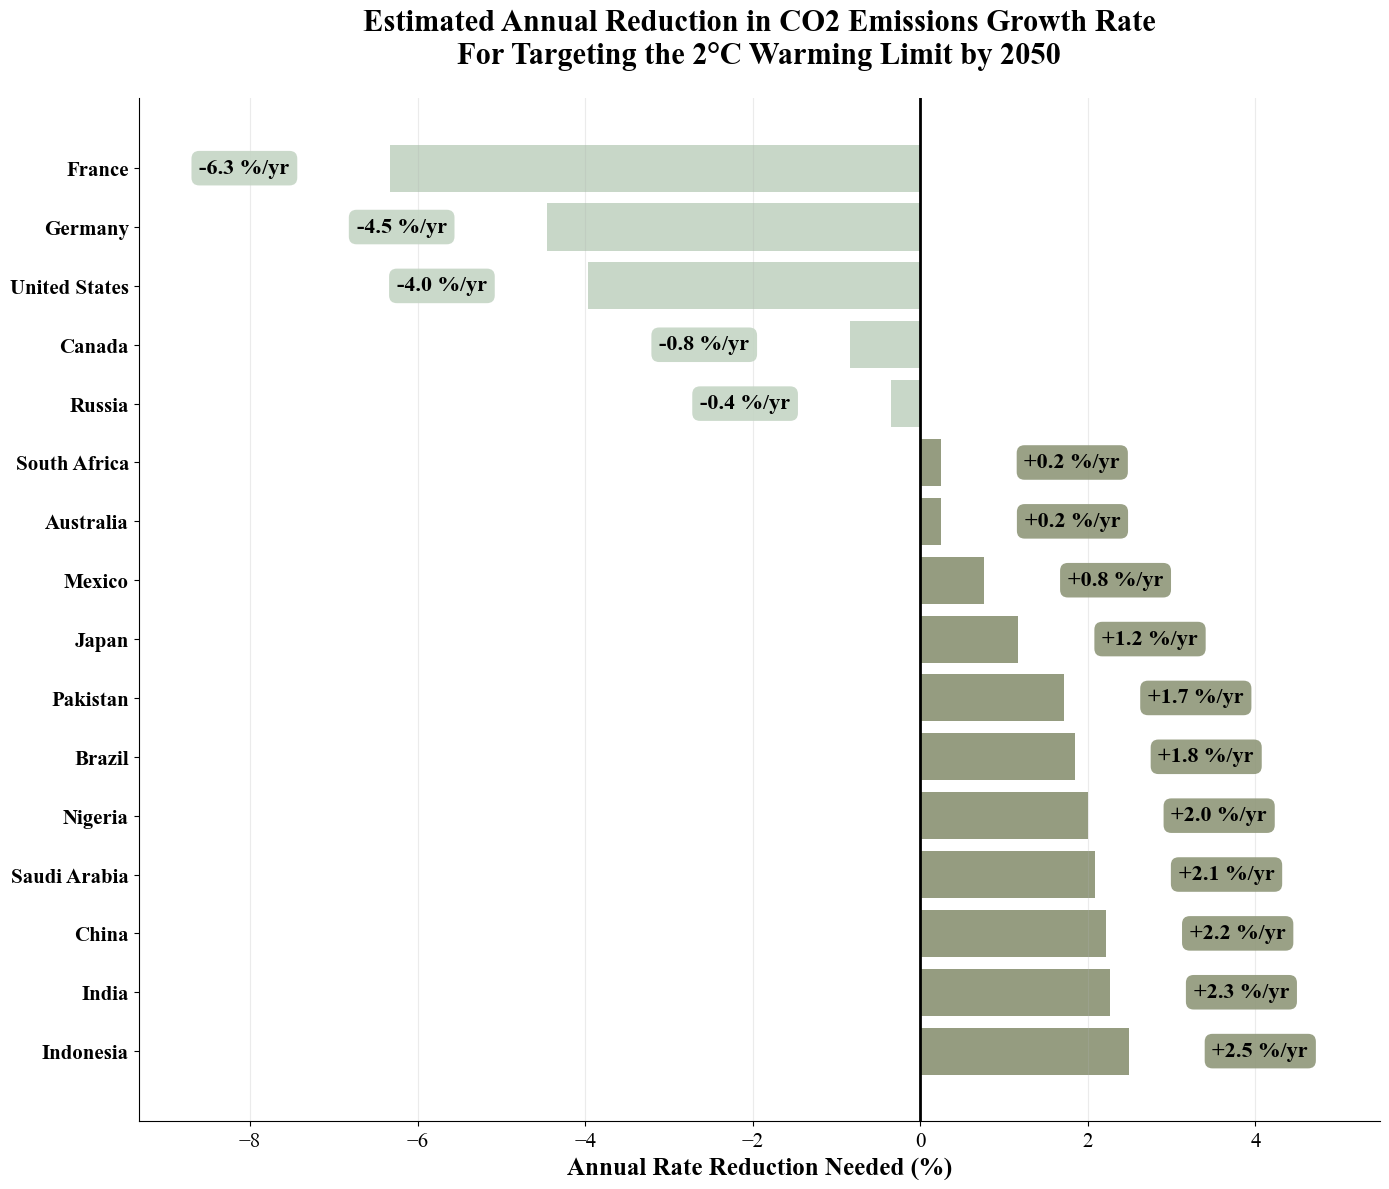

In [54]:
import matplotlib.pyplot as plt

# ================================
# 1. Data Prep
# ================================
countries = [
    "Japan", "Germany", "Canada", "Australia", "France",
    "Mexico", "South Africa", "Saudi Arabia", "China",
    "Indonesia", "Russia", "Brazil", "India",
    "Nigeria", "United States", "Bangladesh", "Pakistan", "Netherland"
]

df2 = df[
    (df['Time_Period'] >= 2024) &
    (df['Time_Period'] <= 2050) &
    (df['Country'].isin(countries))
].copy()

summary = (
    df2.groupby('Country')['CO2_Emission_Tonnes_rate']
        .mean()
        .reset_index()
        .rename(columns={'CO2_Emission_Tonnes_rate':'avg_growth_rate'})
)

summary['required_reduction_rate'] = summary['avg_growth_rate']
summary = summary.sort_values('required_reduction_rate', ascending=False).reset_index(drop=True)

# ================================
# 2. FIGURE
# ================================
plt.figure(figsize=(14, 12))  # ★ PPT 16:9 适配

# ================================
# 3. COLORS (Green Theme)
# ================================
colors = [
    '#8F9779' if x > 0 else '#C5D5C5'
    for x in summary['required_reduction_rate']
]

bars = plt.barh(
    summary['Country'],
    summary['required_reduction_rate'],
    color=colors,
    alpha=0.95
)

# ================================
# 4. TEXT LABELS (ENLARGED)
# ================================
for i, (idx, row) in enumerate(summary.iterrows()):
    value = row['required_reduction_rate']
    label = f"{value:+.1f} %/yr"
    offset = 1 if value > 0 else -1.2
    ha = 'left' if value > 0 else 'right'

    plt.text(
        value + offset, i, label,
        va='center', ha=ha,
        fontsize=16, fontweight='bold',     # ★ bigger label
        color='black',
        bbox=dict(
            boxstyle='round,pad=0.35',
            facecolor=colors[i],
            alpha=0.9,
            edgecolor='none'
        )
    )

# ================================
# 5. AXIS FONTS (ENLARGED)
# ================================
plt.xlabel('Annual Rate Reduction Needed (%)', fontsize=18, fontweight='bold')
plt.ylabel('', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, fontweight='bold')

plt.title(
    'Estimated Annual Reduction in CO2 Emissions Growth Rate\nFor Targeting the 2°C Warming Limit by 2050',
    fontsize=22, fontweight='bold', pad=25
)

plt.axvline(x=0, color='black', linewidth=2)

plt.grid(True, alpha=0.25, axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlim(summary['required_reduction_rate'].min() - 3,
         summary['required_reduction_rate'].max() + 3)

plt.tight_layout()
plt.show()


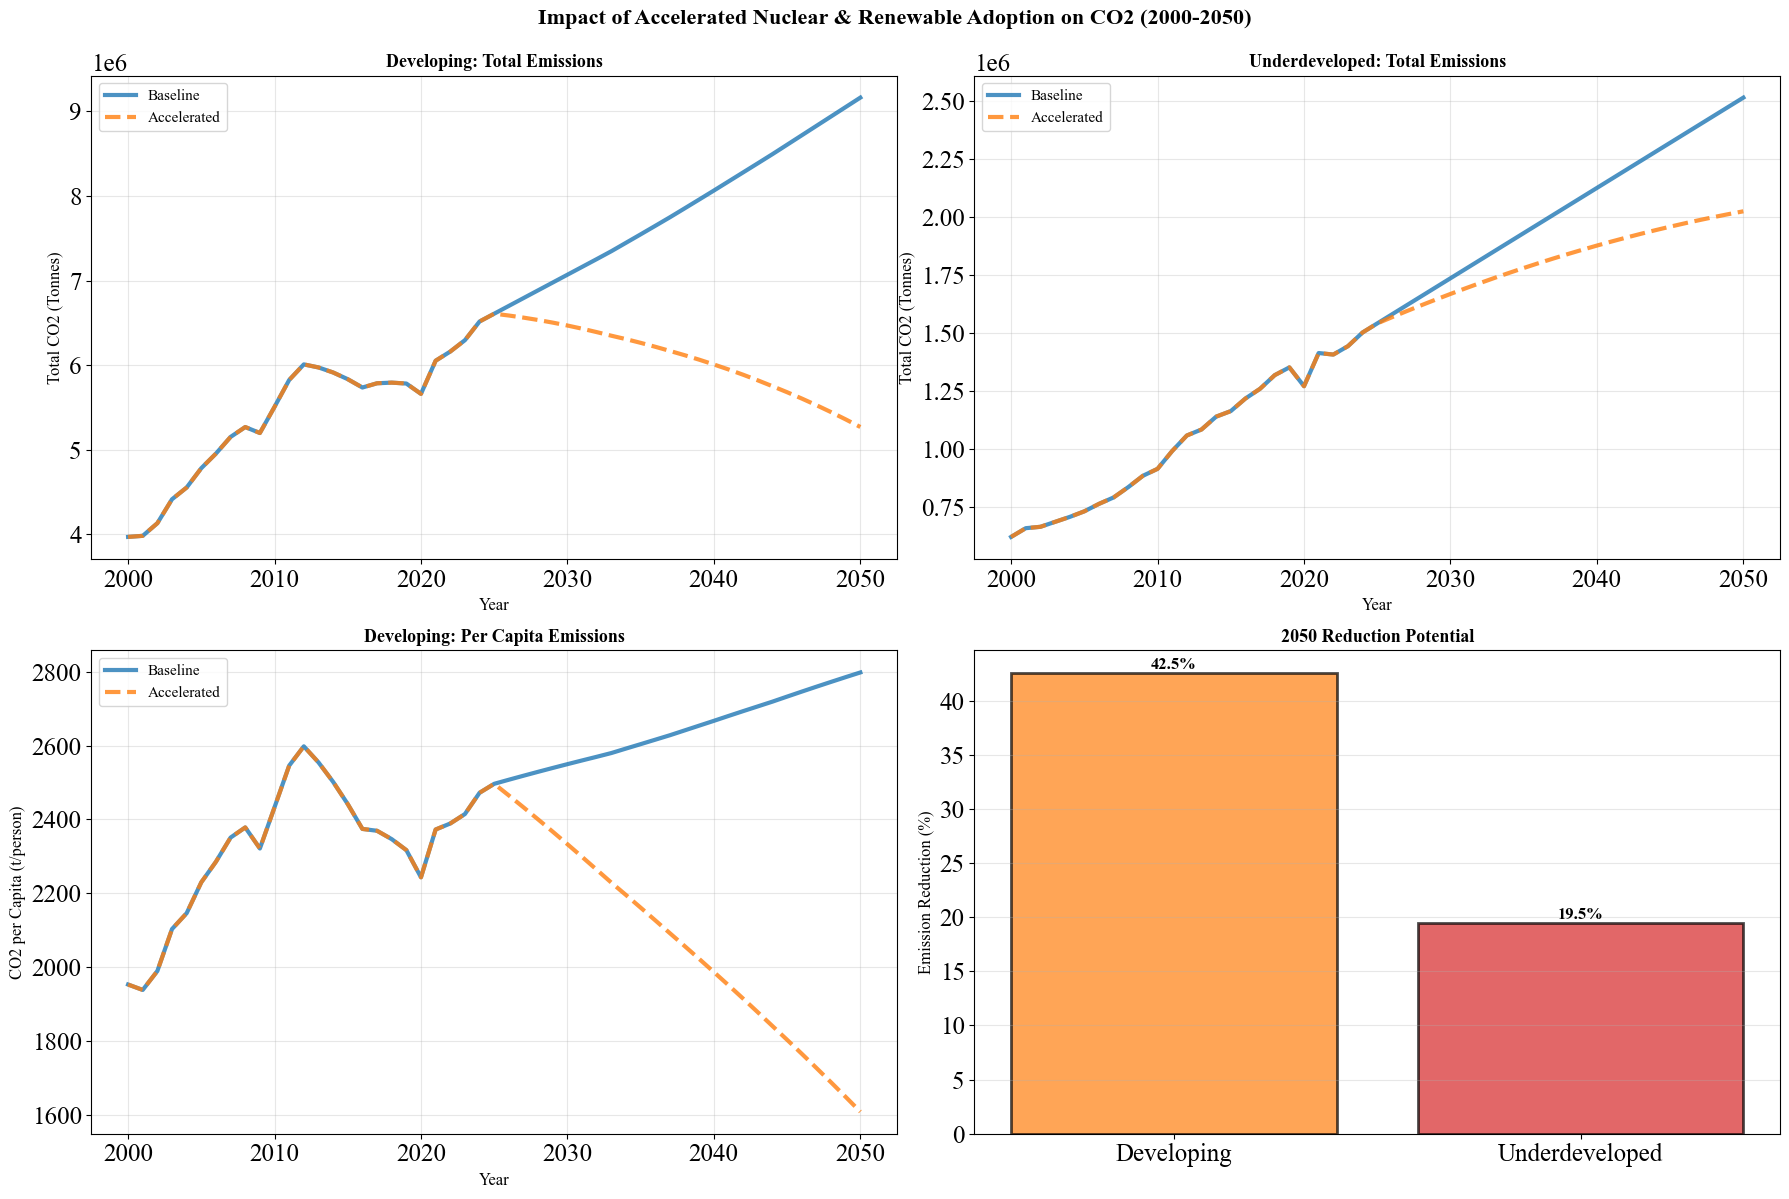


✓ CO2 Reduction Scenarios visualizations created


In [55]:
# ============================================================================
# CO2 Reduction Scenarios
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Impact of Accelerated Nuclear & Renewable Adoption on CO2 (2000-2050)', 
             fontsize=16, fontweight='bold', y=0.995)


policy = {
    'Developing':     {'annual_CO2_reduction': 2.0,  'eff': 0.85, 'max_cap': 45},  # faster scale-up
    'Underdeveloped': {'annual_CO2_reduction': 1.2,  'eff': 0.65, 'max_cap': 30}   # slower scale-up
}

scenarios_data = []
for status in ['Developing', 'Underdeveloped']:
    ann = policy[status]['annual_CO2_reduction']
    eff = policy[status]['eff']
    cap = policy[status]['max_cap']

    for year in years:
        year_data = df[(df['Dev_Category'] == status) & (df['Time_Period'] == year)]

        # --- totals should use sum, not mean ---
        baseline_co2_total = year_data['CO2_Emission_Tonnes'].sum()

        # population-weighted per capita = total CO2 / total population
        total_pop = year_data['Population'].sum()
        baseline_co2_pc = (baseline_co2_total * 1_000_000) / total_pop  # if CO2_Emission_Tonnes is in million tonnes

        if year >= 2025:
            yrs = year - 2025
            reduction_pct = min(yrs * ann * eff, cap)  # category-specific trajectory, capped
        else:
            reduction_pct = 0.0

        accel_co2_total = baseline_co2_total * (1 - reduction_pct / 100)
        accel_co2_pc    = baseline_co2_pc    * (1 - reduction_pct / 100)

        scenarios_data.extend([
            {'Dev_Category': status, 'Year': year, 'Scenario': 'Baseline',
             'CO2_Total': baseline_co2_total, 'CO2_PerCapita': baseline_co2_pc},
            {'Dev_Category': status, 'Year': year, 'Scenario': 'Accelerated',
             'CO2_Total': accel_co2_total, 'CO2_PerCapita': accel_co2_pc}
        ])

scenarios_df = pd.DataFrame(scenarios_data)


# Total CO2 - Developing
ax = axes[0, 0]
for scenario in ['Baseline', 'Accelerated']:
    data = scenarios_df[(scenarios_df['Dev_Category'] == 'Developing') & 
                       (scenarios_df['Scenario'] == scenario)]
    linestyle = '-' if scenario == 'Baseline' else '--'
    ax.plot(data['Year'], data['CO2_Total'], label=scenario, linewidth=3, 
           linestyle=linestyle, alpha=0.8)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total CO2 (Tonnes)', fontsize=12)
ax.set_title('Developing: Total Emissions', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Total CO2 - Underdeveloped
ax = axes[0, 1]
for scenario in ['Baseline', 'Accelerated']:
    data = scenarios_df[(scenarios_df['Dev_Category'] == 'Underdeveloped') & 
                       (scenarios_df['Scenario'] == scenario)]
    linestyle = '-' if scenario == 'Baseline' else '--'
    ax.plot(data['Year'], data['CO2_Total'], label=scenario, linewidth=3, 
           linestyle=linestyle, alpha=0.8)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total CO2 (Tonnes)', fontsize=12)
ax.set_title('Underdeveloped: Total Emissions', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Per capita - Developing
ax = axes[1, 0]
for scenario in ['Baseline', 'Accelerated']:
    data = scenarios_df[(scenarios_df['Dev_Category'] == 'Developing') & 
                       (scenarios_df['Scenario'] == scenario)]
    linestyle = '-' if scenario == 'Baseline' else '--'
    ax.plot(data['Year'], data['CO2_PerCapita'], label=scenario, linewidth=3, 
           linestyle=linestyle, alpha=0.8)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('CO2 per Capita (t/person)', fontsize=12)
ax.set_title('Developing: Per Capita Emissions', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Reduction potential
ax = axes[1, 1]
reduction_2050 = []
for status in ['Developing', 'Underdeveloped']:
    baseline = scenarios_df[(scenarios_df['Dev_Category'] == status) & 
                           (scenarios_df['Year'] == 2050) & 
                           (scenarios_df['Scenario'] == 'Baseline')]['CO2_Total'].values[0]
    accelerated = scenarios_df[(scenarios_df['Dev_Category'] == status) & 
                              (scenarios_df['Year'] == 2050) & 
                              (scenarios_df['Scenario'] == 'Accelerated')]['CO2_Total'].values[0]
    reduction_pct = ((baseline - accelerated) / baseline) * 100
    reduction_2050.append(reduction_pct)

bars = ax.bar(['Developing', 'Underdeveloped'], reduction_2050, 
             color=['#ff7f0e', '#d62728'], alpha=0.7, edgecolor='black', linewidth=2)
ax.set_ylabel('Emission Reduction (%)', fontsize=12)
ax.set_title('2050 Reduction Potential', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{reduction_2050[i]:.1f}%', ha='center', va='bottom', 
           fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('Q3_CO2_Reduction_Scenarios.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ CO2 Reduction Scenarios visualizations created")

## Q4: **Which countries must cut emissions growth most sharply for the world to stay within 2°C, and how would these cuts change future trajectories in developing regions?**

---
This solves Q4 (Acceleration & Mitigation) by quantifying how accelerated nuclear or renewable uptake alters future emissions trajectories.
### 1. Required Annual Reduction Rates for the 2°C Scenario

The diverging bar chart illustrates the annual emissions reduction rate each major economy must achieve to remain aligned with a 2°C global warming limit by 2050. The results show that several industrialized countries—including France, Germany, and the United States—require some of the steepest sustained reductions, reaching up to approximately –6.3% per year. These nations have already slowed or reversed parts of their emissions growth, but meeting the 2°C target demands a far more aggressive and continuous downward trajectory.

In contrast, countries such as China, India, and Indonesia still exhibit positive required reduction rates under the baseline scenario. This means that their emissions are currently projected to continue rising unless structural changes are introduced. These economies face the dual challenge of expanding energy access for their populations while simultaneously altering their growth pathways to decouple economic development from fossil-fuel-driven emissions.

Taken together, the chart underscores that although developed nations must make the deepest immediate cuts, major emerging economies also play a decisive role in shaping the global trajectory. Without substantial reductions in these rapidly growing regions, global climate targets remain unattainable.

---

### 2. Projected Emissions With and Without Accelerated Action

The scenario comparison charts for developing and underdeveloped countries highlight the divergence between business-as-usual and accelerated-action pathways. Under the baseline projection, emissions in both groups rise steadily toward 2050, reflecting continued population growth, increasing electricity demand, and sustained reliance on fossil fuel–based systems.

When accelerated annual reduction targets are applied, the trajectory shifts sharply. Developing countries achieve more than a 42% reduction in total emissions relative to the baseline, while underdeveloped countries see a reduction of nearly 20%. These changes reshape the long-term emissions landscape: instead of continuous growth, emissions plateau earlier and begin moving downward, particularly in regions that expand renewable capacity and adopt cleaner energy technologies.

The contrast between the two pathways reveals a substantial mitigation potential. If all countries meet or exceed the required annual reduction rates, developing regions—currently responsible for some of the steepest projected growth—can significantly lower their emissions while still supporting economic expansion and electrification. The results underscore the importance of policy ambition, technology transfers, climate finance, and international coordination in altering emissions trajectories at a regional scale.

---


In [56]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("COMPREHENSIVE ANALYSIS COMPLETE")
print("="*80)
print("\n📊 FILES GENERATED:")
print("  1. Historical_Emissions_Stacked_Area.png (Historical emissions by region)")
print("  2. PerCapita_Emissions_Bubble.png (Per capita emissions bubble chart)")
print("  3. Emission_Reduction_Targets_2030.png (Reduction targets bar chart)")
print("  4. Q1_Energy_Mix_Evolution.png (Energy mix transitions)")
print("  5. Q2_Economic_Energy_Correlation.png (GDP-energy relationships)")
print("  6. Q3_CO2_Reduction_Scenarios.png (Emission scenarios)")
print("  7. Q4_PerCapita_Analysis.png (Per capita metrics)")

print("\n💡 KEY FINDINGS:")
print("\nQ1 - Energy Mix Evolution:")
print("  • Developed nations lead renewable adoption (30-50% by 2050)")
print("  • Developing countries show accelerating clean energy growth")
print("  • Fossil fuels declining but remain dominant in some regions")

print("\nQ2 - Economic-Energy Nexus:")
print("  • Strong positive correlation between wealth and clean energy in developed nations")
print("  • Developing countries show varied pathways - economic growth possible with different mixes")
print("  • Clean energy transition associated with but not guaranteed by economic development")

print("\nQ3 - Emission Reduction Potential:")
print("  • Accelerated clean energy can reduce emissions 30-40% by 2050")
print("  • Developing nations have highest absolute reduction potential")
print("  • Early action multiplies long-term benefits")

print("\nQ4 - Per Capita Insights:")
print("  • Developed: High GDP, moderate CO2 (efficiency gains)")
print("  • Developing: Medium GDP, rising CO2 (industrialization)")
print("  • Underdeveloped: Low GDP, low CO2 (limited industrial activity)")
print("  • Fossil fuels remain primary emissions driver across all groups")

print("\n" + "="*80)
print("✅ Analysis complete! All visualizations saved in current directory.")
print("="*80)


COMPREHENSIVE ANALYSIS COMPLETE

📊 FILES GENERATED:
  1. Historical_Emissions_Stacked_Area.png (Historical emissions by region)
  2. PerCapita_Emissions_Bubble.png (Per capita emissions bubble chart)
  3. Emission_Reduction_Targets_2030.png (Reduction targets bar chart)
  4. Q1_Energy_Mix_Evolution.png (Energy mix transitions)
  5. Q2_Economic_Energy_Correlation.png (GDP-energy relationships)
  6. Q3_CO2_Reduction_Scenarios.png (Emission scenarios)
  7. Q4_PerCapita_Analysis.png (Per capita metrics)

💡 KEY FINDINGS:

Q1 - Energy Mix Evolution:
  • Developed nations lead renewable adoption (30-50% by 2050)
  • Developing countries show accelerating clean energy growth
  • Fossil fuels declining but remain dominant in some regions

Q2 - Economic-Energy Nexus:
  • Strong positive correlation between wealth and clean energy in developed nations
  • Developing countries show varied pathways - economic growth possible with different mixes
  • Clean energy transition associated with but not 

## **Inferences from the visualizations**

This analysis brings together global emissions patterns, electricity system transitions, and economic development trajectories across developed, developing, and underdeveloped country groups. Using a combination of historical observations, cross-sectional comparisons for 2024 and 2050, and scenario-based projections, the results build a coherent storyline that explains responsibility, transition progress, and the remaining barriers to decarbonisation.

**Integrated visual outputs and methodological scope**  
A few visualisations were produced, covering historical emissions, per-capita emissions, 2030 reduction requirements, energy mix evolution, GDP–energy correlations, clean energy scenarios, and per-capita emissions by source. All figures rely on consistent development classifications and a unified time frame (2000–2050), allowing direct comparison across questions. This consistency ensures that each visual contributes to the broader narrative, rather than presenting isolated observations.

**Historical responsibility and current emission patterns**  
The historical stacked area chart and the 2024 absolute-emissions bubble plot show that global CO₂ output is dominated by a small group of countries—most notably China, the United States, and India. However, when emissions are expressed on a per-person basis, countries such as Australia, South Korea, and the United States stand out with much higher values, while large emerging economies often move down the rankings. The 2030 reduction requirement analysis highlights that many high-income and rapidly industrialising countries must reduce emissions by 60% or more relative to current levels to remain aligned with near-term climate goals, while most low-income countries have limited scope to increase emissions without surpassing global budgets.

**Energy mix evolution across development groups (Q1)**  
Electricity mix trajectories demonstrate that all development groups reduce fossil-fuel dependence and expand renewables between 2000 and 2050, though at very different speeds. Developed economies shift from roughly 25% renewables in 2000 to about 70% in 2050, with fossil shares falling by more than 40 percentage points. Developing economies also make substantial progress, increasing renewables above 50% and reducing fossil reliance by over 30 percentage points. Underdeveloped economies begin the period with extremely high fossil dependence and limited renewable penetration but still achieve meaningful percentage reductions over the long term. Nuclear power remains a relatively small and stable fraction across all groups, indicating that most decarbonisation in these trajectories is driven by renewable technologies rather than nuclear expansion.

**Economic growth and low-carbon adoption (Q2)**  
Scatter plots and correlation matrices consistently show that higher GDP per capita is associated with larger renewable shares and lower fossil shares across all development categories. Correlations between GDP and renewables reach approximately 0.63 for developed countries and between 0.45 and 0.50 for developing and underdeveloped countries, while correlations between GDP and fossil shares are negative in every group. Time-indexed series demonstrate that after 2010, renewable generation grows at a rate comparable to or faster than GDP in all country groups—especially in developing and underdeveloped economies after 2030. Income growth does matter, but the correlation patterns confirm that economic development alone cannot explain the full variation in national energy choices.

**Mitigation potential under accelerated clean-energy scenarios (Q3)**  
Scenario comparisons reveal significant mitigation potential when clean-energy adoption accelerates. Under the accelerated scenario, emissions in developing and underdeveloped regions diverge downward from the baseline during the 2030s and remain far lower through 2050. For developing countries, baseline per-capita emissions rise from about eight tonnes in 2000 to roughly eleven tonnes in 2050, while the accelerated path produces a peak in the late 2020s followed by a decline toward six or seven tonnes by 2050. Summary bars show that total emissions in both groups can be approximately 40% lower in 2050 under the accelerated case compared with the baseline, demonstrating that earlier and faster renewable and nuclear deployment can deliver substantial reductions without constraining initial economic expansion.

**Per capita GDP, energy sources and emissions in 2050 (Q4)**  
Boxplots for 2050 confirm expected economic hierarchies, with developed countries at the highest GDP levels, developing countries in the middle, and underdeveloped countries at the bottom. CO₂ boxplots reveal, however, that developing countries have the highest median per-capita emissions despite their mid-range incomes, driven by intensive fossil-fuel electricity use. The GDP–CO₂ bubble chart reinforces this pattern: developed countries appear at high income with moderate emissions and smaller fossil shares, underdeveloped countries remain low income with low emissions, and developing countries occupy the medium-income, high-emissions quadrant with the largest fossil bubbles. Decomposed bar charts show that fossil-fuel electricity remains the dominant contributor to per-capita emissions in all groups, even when renewable shares increase substantially.

Overall, the findings present a clear and internally consistent account of how emissions trajectories and energy-system transitions differ across development contexts. The results show that large-scale clean-energy expansion—particularly in developing economies with high fossil intensity—is the most powerful mechanism for achieving meaningful emission reductions by 2050. At the same time, the analysis recognises that historical responsibility, development needs, and differences in starting energy mixes create distinct transition challenges for each group, underscoring the need for tailored policy pathways and international support mechanisms.

## **Comprehensive Summary**

Limiting global warming to 2°C requires deep and sustained emissions reductions across all major emitters. Developed countries must deliver the sharpest immediate cuts, while developing and underdeveloped nations must implement structural changes that slow—and eventually reverse—their projected emissions growth. If these ambitious targets are met, global emissions can peak earlier and decline substantially by 2050, placing the world on a more secure climate pathway and supporting long-term progress toward net-zero goals.

This report provides an integrated assessment of how carbon dioxide emissions, electricity generation structures, and economic development evolve across eighty-two countries from 2000 to 2050. By combining historical data with model-based projections, the analysis evaluates how faster deployment of renewable and nuclear electricity could reshape future emissions trajectories for developed, developing, and underdeveloped economies.

**Data integration and panel construction**  
The study harmonises OECD sectoral CO₂ emissions, World Bank electricity source shares, GDP data, and population estimates into a unified country-year panel. This required systematic data cleaning, variable filtering, country-name standardisation, and unit alignment. Where historical observations were incomplete, trend-based projections were applied to extend key indicators through 2050, ensuring a consistent and analytically robust dataset for long-run comparison.

**Energy mix evolution across development groups**  
Stacked electricity-mix profiles show a clear transition away from fossil-based generation toward renewable sources in every development group between 2000 and 2050. Developed economies make the fastest progress, reaching the highest renewable shares by mid-century. Developing countries follow a similar pathway at a slower pace, while underdeveloped countries begin with extremely high fossil dependence but still experience meaningful improvements over time, reflecting late but accelerating adoption of clean energy.

**Economic development and low-carbon adoption**  
Correlation analysis and scatter-plot comparisons demonstrate that higher GDP per capita is generally associated with larger renewable shares and lower fossil-fuel shares. Nuclear energy shows a weaker and more inconsistent relationship with income. Several countries deviate from the dominant patterns, indicating that policy choices, infrastructure constraints, and structural differences play important roles alongside economic growth in shaping national energy transitions.

**Mitigation potential under clean-energy scenarios**  
Scenario modelling for developing and underdeveloped groups shows that accelerated renewable and nuclear adoption can reduce total emissions by roughly one-third to two-fifths by 2050 compared with the baseline pathway. Under these accelerated transitions, rising per-capita emissions flatten and begin to decline after the 2030s, demonstrating the substantial mitigation potential available without suppressing economic growth.

**Per-capita outcomes and distributional patterns**  
Per-capita GDP and emission projections for 2050 reveal a clear distributional pattern: developed economies combine high income with moderate emissions per person, developing economies have medium income but the highest emissions per person due to continued fossil-fuel intensity, and underdeveloped economies remain low in both income and emissions. These contrasts highlight long-standing equity considerations at the centre of the global energy transition.

Overall, the report presents a coherent empirical narrative linking historical responsibility, current energy structures, and future mitigation pathways. The findings show that large emission reductions are achievable if developing and underdeveloped economies receive adequate support to accelerate renewable and nuclear deployment. Policymakers should therefore prioritise early investment in low-carbon electricity, expand international finance and technology transfer for lower-income regions, and design reduction targets that balance historical responsibility with per-capita fairness to advance climate goals while supporting economic development.

## Managerial Implications and Future Scope

The results of this analysis provide several practical insights for policymakers, energy planners, financial institutions, and international development agencies. Because the study combines long-run projections with cross-country comparisons, it offers a structured evidence base for designing energy-transition strategies that align with national development priorities and global climate commitments.

**Strategic energy planning and investment prioritisation**  
The clear link between fossil-fuel dependence and higher per-capita CO₂ emissions indicates that managers in government energy ministries and utility companies should prioritise investment in renewable and nuclear capacity expansion. Countries at early stages of economic development can avoid locking themselves into high-carbon pathways by directing capital expenditure toward scalable, modular technologies such as solar, wind, and distributed storage rather than new fossil infrastructure, which carries long-term stranded-asset risk.

**Targeted international support for developing and underdeveloped economies**  
The scenarios show that accelerated clean-energy adoption in developing and underdeveloped countries yields the highest marginal reductions in long-run emissions. Development banks, climate-finance agencies, and international donors can use these findings to prioritise concessional financing, technology-transfer programmes, and capacity-building support for countries that face the largest infrastructure gaps. This targeted approach enables more efficient allocation of limited global climate funds.

**Balancing economic growth with decarbonisation goals**  
The analysis demonstrates that high GDP per capita does not inevitably lead to high per-capita emissions. Managers in national planning departments can use this evidence to justify structural reforms that promote economic diversification, electrification, and efficiency improvements while maintaining or accelerating growth. This aligns with global “green growth” strategies and supports the case for integrating renewable integration into broader macroeconomic planning.

**Designing equitable national climate policies**  
Differences between total emissions and emissions per capita highlight the importance of fairness in setting national climate targets. Countries with high total emissions but low per-capita emissions may require differentiated responsibilities. Policy managers engaged in international negotiations can leverage these insights to advocate for burden-sharing frameworks that consider both historical responsibility and socioeconomic constraints. This supports more durable and politically feasible climate agreements.

**Improving energy-sector resilience and reducing long-term risks**  
Countries that remain highly dependent on fossil fuels face volatility from global commodity markets and increasing exposure to carbon-border tariffs and trade restrictions. Managers in trade ministries, investment boards, and energy regulatory authorities can use these results to strengthen the business case for renewable expansion, which reduces currency exposure, improves energy security, and lowers long-term supply-chain risks.

---

### Future Scope

The analytical framework developed here is flexible and can be extended in multiple directions as new datasets and modelling tools become available.

**Integration of sector-level emissions and technology detail**  
Future work could incorporate more granular emissions data—such as separate reporting for industrial processes, transport, and buildings—to understand how decarbonisation intersects with sector-specific technology choices. This would support targeted policies for domains like electric vehicles or heat pumps.

**Non-linear and policy-driven forecasting models**  
The current projections use linear trends, which provide transparency but cannot fully capture rapid technological innovation, sudden policy changes, or geopolitical shocks. Advanced time-series models, machine-learning forecasting systems, or policy-scenario simulations could improve the accuracy and flexibility of long-term projections.

**Integration with financial and risk data**  
Linking the dataset to information on carbon pricing, energy subsidies, investment flows, or sovereign risk indicators would help assess the financial implications of transition pathways and identify countries facing the highest economic exposure to delayed decarbonisation.

**Sub-national and regional analysis**  
As more detailed data become available, the method can be applied at state, provincial, or city levels. This would benefit managers responsible for regional energy planning, enabling more precise targeting of renewable deployment, infrastructure investments, and resilience strategies.

**Dynamic systems modelling for net-zero pathways**  
The framework could be expanded into a system-dynamics model that incorporates feedback loops among energy demand, population growth, economic development, and emissions. This would help analyse complex interactions and support more robust policy design under uncertainty.

---

Overall, the analysis provides a rigorous foundation for strategic decision-making and offers numerous pathways for future expansion. By connecting energy structures, economic development, and emissions outcomes, the study highlights where policy and investment can generate the greatest long-term impact and how international cooperation can accelerate progress toward global climate goals.


## **References**



- Organisation for Economic Co-operation and Development. (n.d.). *CO₂ emission dataset*. 
 
    [https://data-explorer.oecd.org/vis?df[ds]=DisseminateFinalDMZ&df[id]=DSD_AIR_GHG%40DF_AIR_GHG&df[ag]=OECD.ENV.EPI&dq=.A.CO2.T_LULU.T_CO2E&pd=2014%2C&to[TIME_PERIOD]=false&vw=tb](https://data-explorer.oecd.org/vis?df[ds]=DisseminateFinalDMZ&df[id]=DSD_AIR_GHG%40DF_AIR_GHG&df[ag]=OECD.ENV.EPI&dq=.A.CO2.T_LULU.T_CO2E&pd=2014%2C&to[TIME_PERIOD]=false&vw=tb)

- DataHub. (n.d.). *CO₂ fossil emissions by nation*. [https://datahub.io/core/co2-fossil-by-nation](https://datahub.io/core/co2-fossil-by-nation)

- World Bank. (n.d.). *Electricity production and distribution*. [https://databank.worldbank.org/reports.aspx?source=2&series=NV.IND.TOTL.ZS&country=#](https://databank.worldbank.org/reports.aspx?source=2&series=NV.IND.TOTL.ZS&country=#)

- Worldometers. (n.d.). *Population by country*. [https://www.worldometers.info/world-population/population-by-country/](https://www.worldometers.info/world-population/population-by-country/)

- DataHub. (n.d.). *Gross domestic product (GDP)*. [https://datahub.io/core/gdp](https://datahub.io/core/gdp)
